In [1]:
#we load the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs

quarters = ['2023_Q1', '2023_Q3', '2023_Q4',
            '2024_Q2', '2024_Q4',
            '2025_Q1', '2025_Q2']
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller


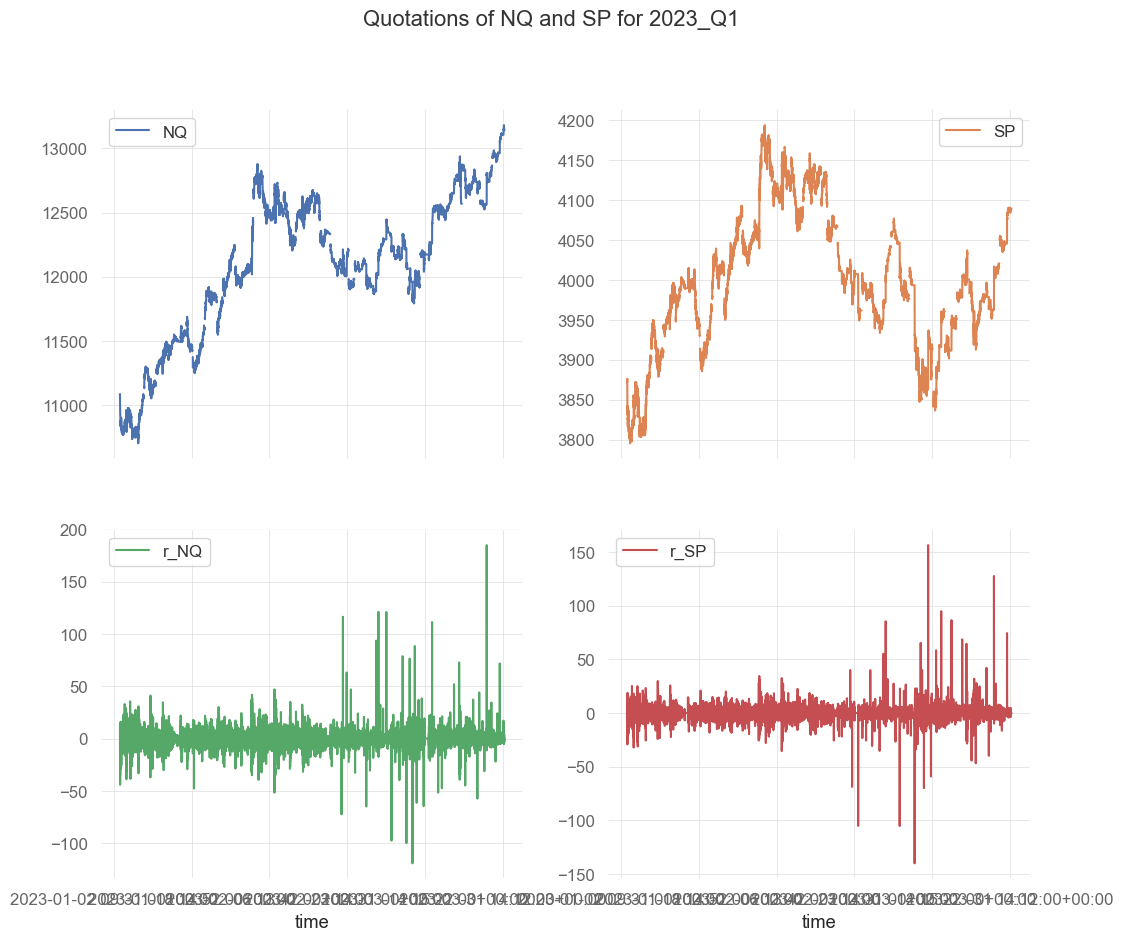

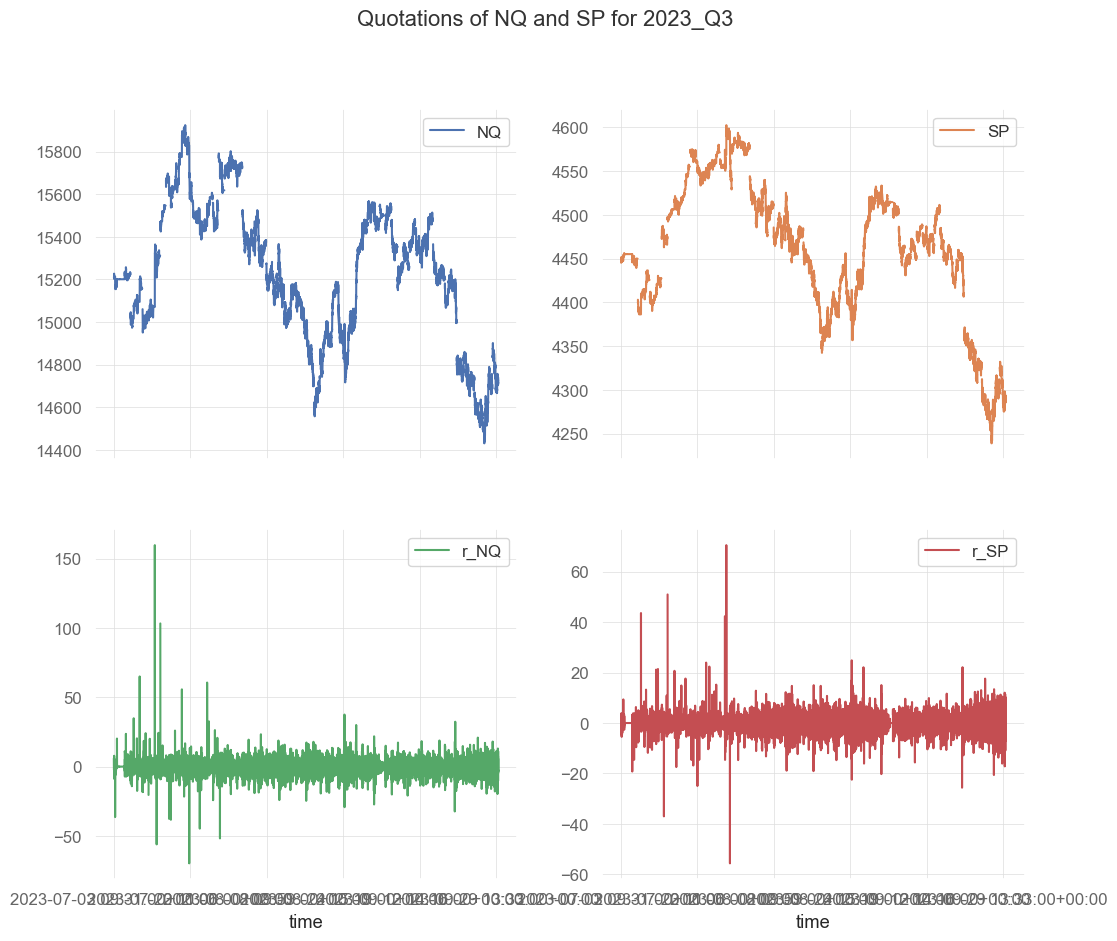

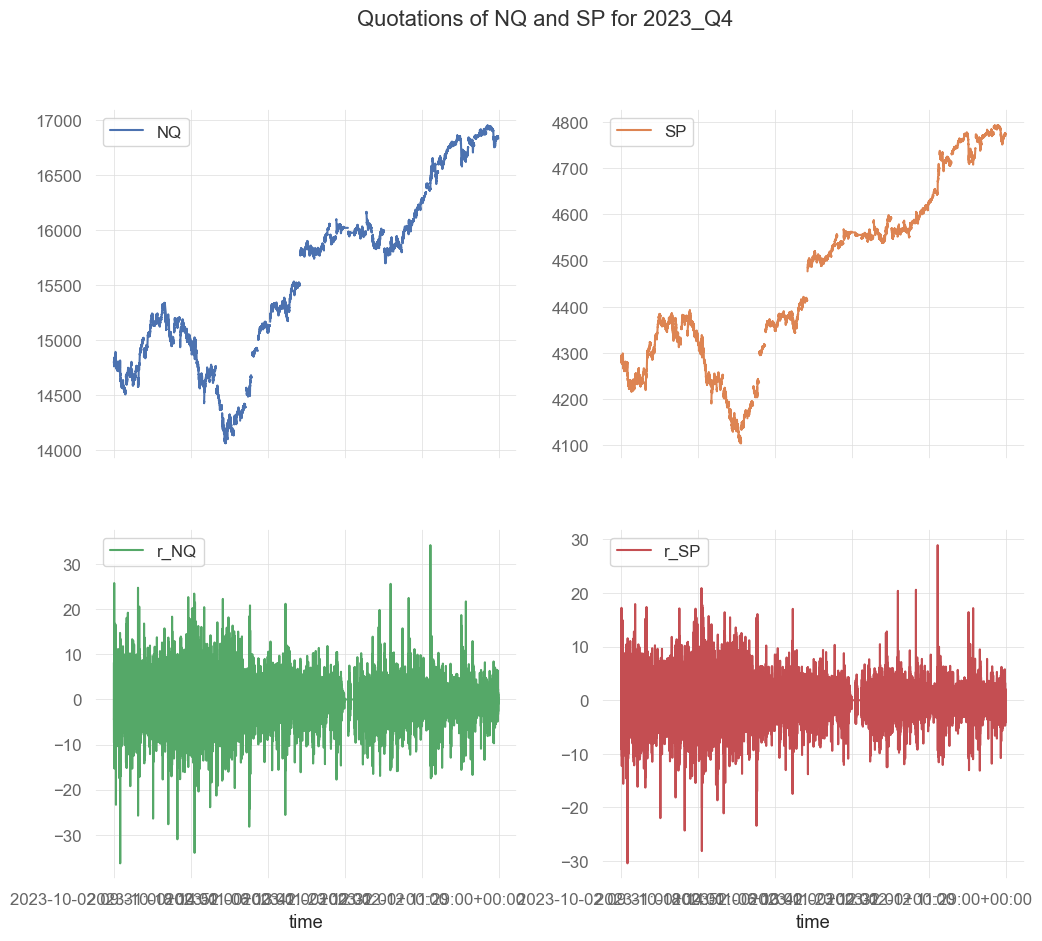

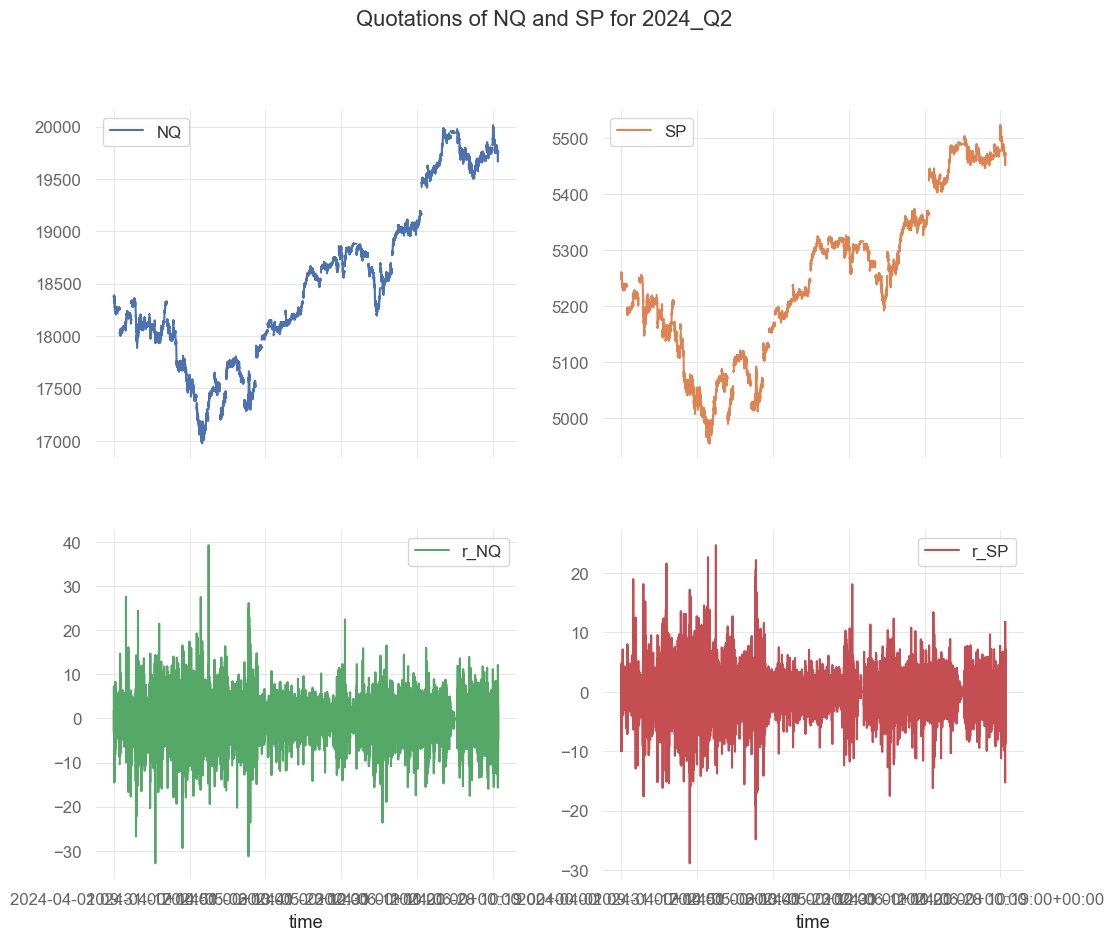

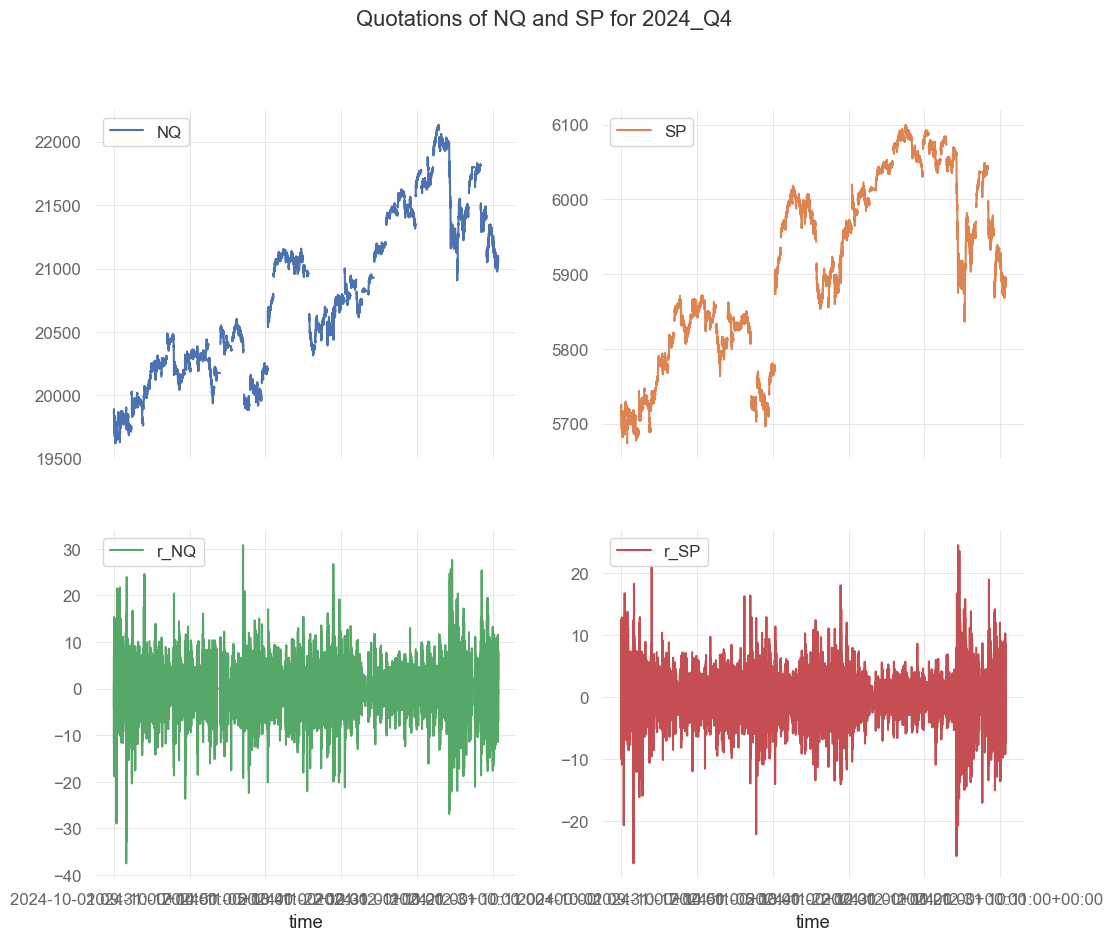

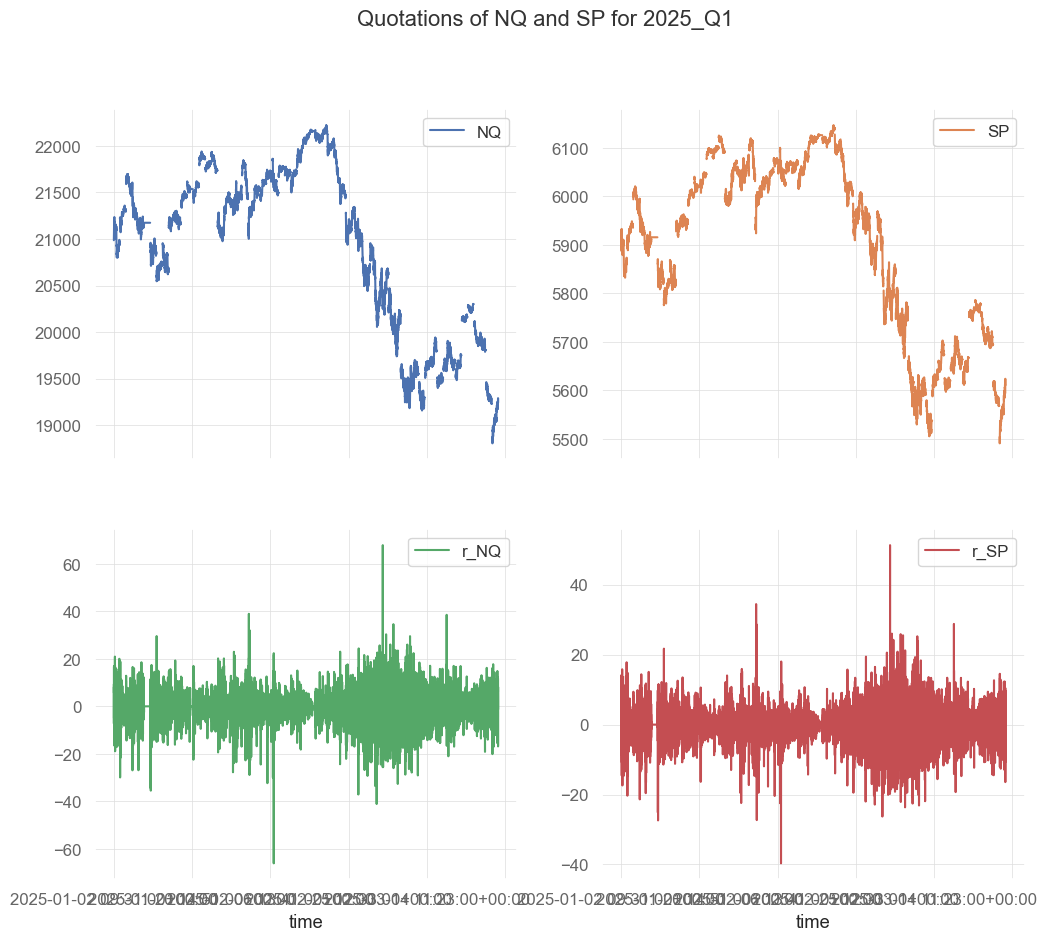

Combined data saved to 'data/all_quarters_data.parquet'
Total rows: 175812

Data summary:
quarter
2023_Q1    25109
2023_Q3    25148
2023_Q4    24952
2024_Q2    25342
2024_Q4    25350
2025_Q1    24568
2025_Q2    25343
dtype: int64

First few rows:
                           NQ  SP  r_NQ  r_SP  quarter
datetime                                              
2023-01-02 09:31:00+00:00 NaN NaN   NaN   NaN  2023_Q1
2023-01-02 09:32:00+00:00 NaN NaN   NaN   NaN  2023_Q1
2023-01-02 09:33:00+00:00 NaN NaN   NaN   NaN  2023_Q1
2023-01-02 09:34:00+00:00 NaN NaN   NaN   NaN  2023_Q1
2023-01-02 09:35:00+00:00 NaN NaN   NaN   NaN  2023_Q1

Last few rows:
                           NQ  SP  r_NQ  r_SP  quarter
datetime                                              
2025-06-30 15:56:00+00:00 NaN NaN   NaN   NaN  2025_Q2
2025-06-30 15:57:00+00:00 NaN NaN   NaN   NaN  2025_Q2
2025-06-30 15:58:00+00:00 NaN NaN   NaN   NaN  2025_Q2
2025-06-30 15:59:00+00:00 NaN NaN   NaN   NaN  2025_Q2
2025-06-30 16:00:00+00

In [2]:
# Combine all quarterly data into one file with quarter identification
all_data_list = []

for quarter in quarters:
    data1 = pd.read_parquet(f'data/data1_{quarter}.parquet')
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1.set_index('datetime', inplace=True)
    
    data_r = np.log(data1 / data1.shift(1)) * 10000
    data_r.columns = ['r_' + col for col in data_r.columns]
    
    data_NQ_SP_temp = pd.concat(
        [data1[['NQ', 'SP']],
        data_r[['r_NQ', 'r_SP']]],
        axis=1
    )
    
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("9:31", "9:40").index] = np.nan
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("15:51", "16:00").index] = np.nan
    
    data_NQ_SP_plot = data_NQ_SP_temp.copy()
    data_NQ_SP_plot['time'] = data_NQ_SP_plot.index.astype(str)

    # We reset the index to make 'time' a column
    data_NQ_SP_plot = data_NQ_SP_plot.reset_index(drop = True)

    # Let's set time as the X-axis and draw the graphs
    data_NQ_SP_plot.plot(
        x = 'time',
        subplots = True,
        layout = (2, 2),
        title = "Quotations of NQ and SP for" + f" {quarter}",
        figsize = (12, 10)
    )
    plt.show()
    
    # Add quarter column
    data_NQ_SP_temp['quarter'] = quarter
    
    all_data_list.append(data_NQ_SP_temp)

# Combine all data
all_data = pd.concat(all_data_list, axis=0)

# Save to parquet file
all_data.to_parquet('data/all_quarters_data.parquet')

print(f"Combined data saved to 'data/all_quarters_data.parquet'")
print(f"Total rows: {len(all_data)}")
print(f"\nData summary:")
print(all_data.groupby('quarter').size())
print(f"\nFirst few rows:")
print(all_data.head())
print(f"\nLast few rows:")
print(all_data.tail())
    

In [3]:
# Calculate correlations for each quarter
correlation_results = []

for quarter in quarters:
    data1 = pd.read_parquet(f'data/data1_{quarter}.parquet')
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1.set_index('datetime', inplace=True)
    
    data_r = np.log(data1 / data1.shift(1)) * 10000
    data_r.columns = ['r_' + col for col in data_r.columns]
    
    data_NQ_SP_temp = pd.concat(
        [data1[['NQ', 'SP']],
        data_r[['r_NQ', 'r_SP']]],
        axis=1
    )
    
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("9:31", "9:35").index] = np.nan
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("15:56", "16:00").index] = np.nan
    
    # Calculate correlations for this quarter
    corr_p = data_NQ_SP_temp['NQ'].corr(data_NQ_SP_temp['SP'])
    corr_r = data_NQ_SP_temp['r_NQ'].corr(data_NQ_SP_temp['r_SP'])
    
    correlation_results.append({
        'Quarter': quarter,
        'Price_Correlation': corr_p,
        'Returns_Correlation': corr_r
    })
    
    print(f"\n{quarter}:")
    print(f"NQ and SP closing price correlation: {corr_p:.4f}")
    print(f"NQ and SP returns correlation: {corr_r:.4f}")

# Create a summary dataframe
correlation_summary = pd.DataFrame(correlation_results)
print("\n" + "="*50)
print("Summary of Correlations by Quarter:")
print(correlation_summary)



2023_Q1:
NQ and SP closing price correlation: 0.6383
NQ and SP returns correlation: 0.6804

2023_Q3:
NQ and SP closing price correlation: 0.9498
NQ and SP returns correlation: 0.7654

2023_Q4:
NQ and SP closing price correlation: 0.9964
NQ and SP returns correlation: 0.9207

2024_Q2:
NQ and SP closing price correlation: 0.9879
NQ and SP returns correlation: 0.9263

2024_Q4:
NQ and SP closing price correlation: 0.9135
NQ and SP returns correlation: 0.8934

2025_Q1:
NQ and SP closing price correlation: 0.9884
NQ and SP returns correlation: 0.9537

2025_Q2:
NQ and SP closing price correlation: 0.9956
NQ and SP returns correlation: 0.9464

Summary of Correlations by Quarter:
   Quarter  Price_Correlation  Returns_Correlation
0  2023_Q1           0.638297             0.680361
1  2023_Q3           0.949790             0.765433
2  2023_Q4           0.996397             0.920750
3  2024_Q2           0.987851             0.926320
4  2024_Q4           0.913452             0.893409
5  2025_Q1   

In [4]:
# Create daily correlation charts for each quarter
fig, axes = plt.subplots(len(quarters), 2, figsize=(15, 4*len(quarters)))

for idx, quarter in enumerate(quarters):
    data1 = pd.read_parquet(f'data/data1_{quarter}.parquet')
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1.set_index('datetime', inplace=True)
    
    data_r = np.log(data1 / data1.shift(1)) * 10000
    data_r.columns = ['r_' + col for col in data_r.columns]
    
    data_NQ_SP_temp = pd.concat(
        [data1[['NQ', 'SP']],
        data_r[['r_NQ', 'r_SP']]],
        axis=1
    )
    
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("9:31", "9:40").index] = np.nan
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("15:51", "16:00").index] = np.nan
    
    # Calculate daily correlations
    correlation_p_daily_q = data_NQ_SP_temp.resample("D").apply(lambda x: x['NQ'].corr(x['SP']))
    correlation_r_daily_q = data_NQ_SP_temp.resample("D").apply(lambda x: x['r_NQ'].corr(x['r_SP']))
    
    correlation_p_daily_q = correlation_p_daily_q.dropna()
    correlation_r_daily_q = correlation_r_daily_q.dropna()
    
    # Plot price correlation
    axes[idx, 0].plot(correlation_p_daily_q.index, correlation_p_daily_q.values)
    axes[idx, 0].set_title(f"{quarter} - Daily Price Correlation (NQ vs SP)")
    axes[idx, 0].set_xlabel("Date")
    axes[idx, 0].set_ylabel("Correlation")
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].tick_params(axis='x', rotation=45)
    
    # Plot returns correlation
    axes[idx, 1].plot(correlation_r_daily_q.index, correlation_r_daily_q.values, color='orange')
    axes[idx, 1].set_title(f"{quarter} - Daily Returns Correlation (NQ vs SP)")
    axes[idx, 1].set_xlabel("Date")
    axes[idx, 1].set_ylabel("Correlation")
    axes[idx, 1].grid(True, alpha=0.3)
    axes[idx, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3023: RuntimeWarning:

### Spread based on Prices



All Average Ratios by Quarter:
                           av_ratio  quarter
2023-01-04 09:31:00+00:00  2.841128  2023_Q1
2023-01-05 09:31:00+00:00  2.832036  2023_Q1
2023-01-06 09:31:00+00:00  2.827369  2023_Q1
2023-01-09 09:31:00+00:00  2.826538  2023_Q1
2023-01-10 09:31:00+00:00  2.859933  2023_Q1
...                             ...      ...
2025-06-25 09:31:00+00:00  3.640806  2025_Q2
2025-06-26 09:31:00+00:00  3.648214  2025_Q2
2025-06-27 09:31:00+00:00  3.652207  2025_Q2
2025-06-30 09:31:00+00:00  3.652897  2025_Q2
2025-07-01 09:31:00+00:00  3.655372  2025_Q2

[451 rows x 2 columns]

Summary of NQ/SP Ratio by Quarter:
   Quarter  Mean_Ratio  Std_Ratio  Min_Ratio  Max_Ratio
0  2023_Q1    3.023116   0.110152   2.826538   3.217859
1  2023_Q3    3.414513   0.023675   3.359279   3.468643
2  2023_Q4    3.488637   0.030819   3.411605   3.535814
3  2024_Q2    3.522011   0.054493   3.430368   3.633050
4  2024_Q4    3.515682   0.049944   3.452093   3.636171
5  2025_Q1    3.543757   0.04736

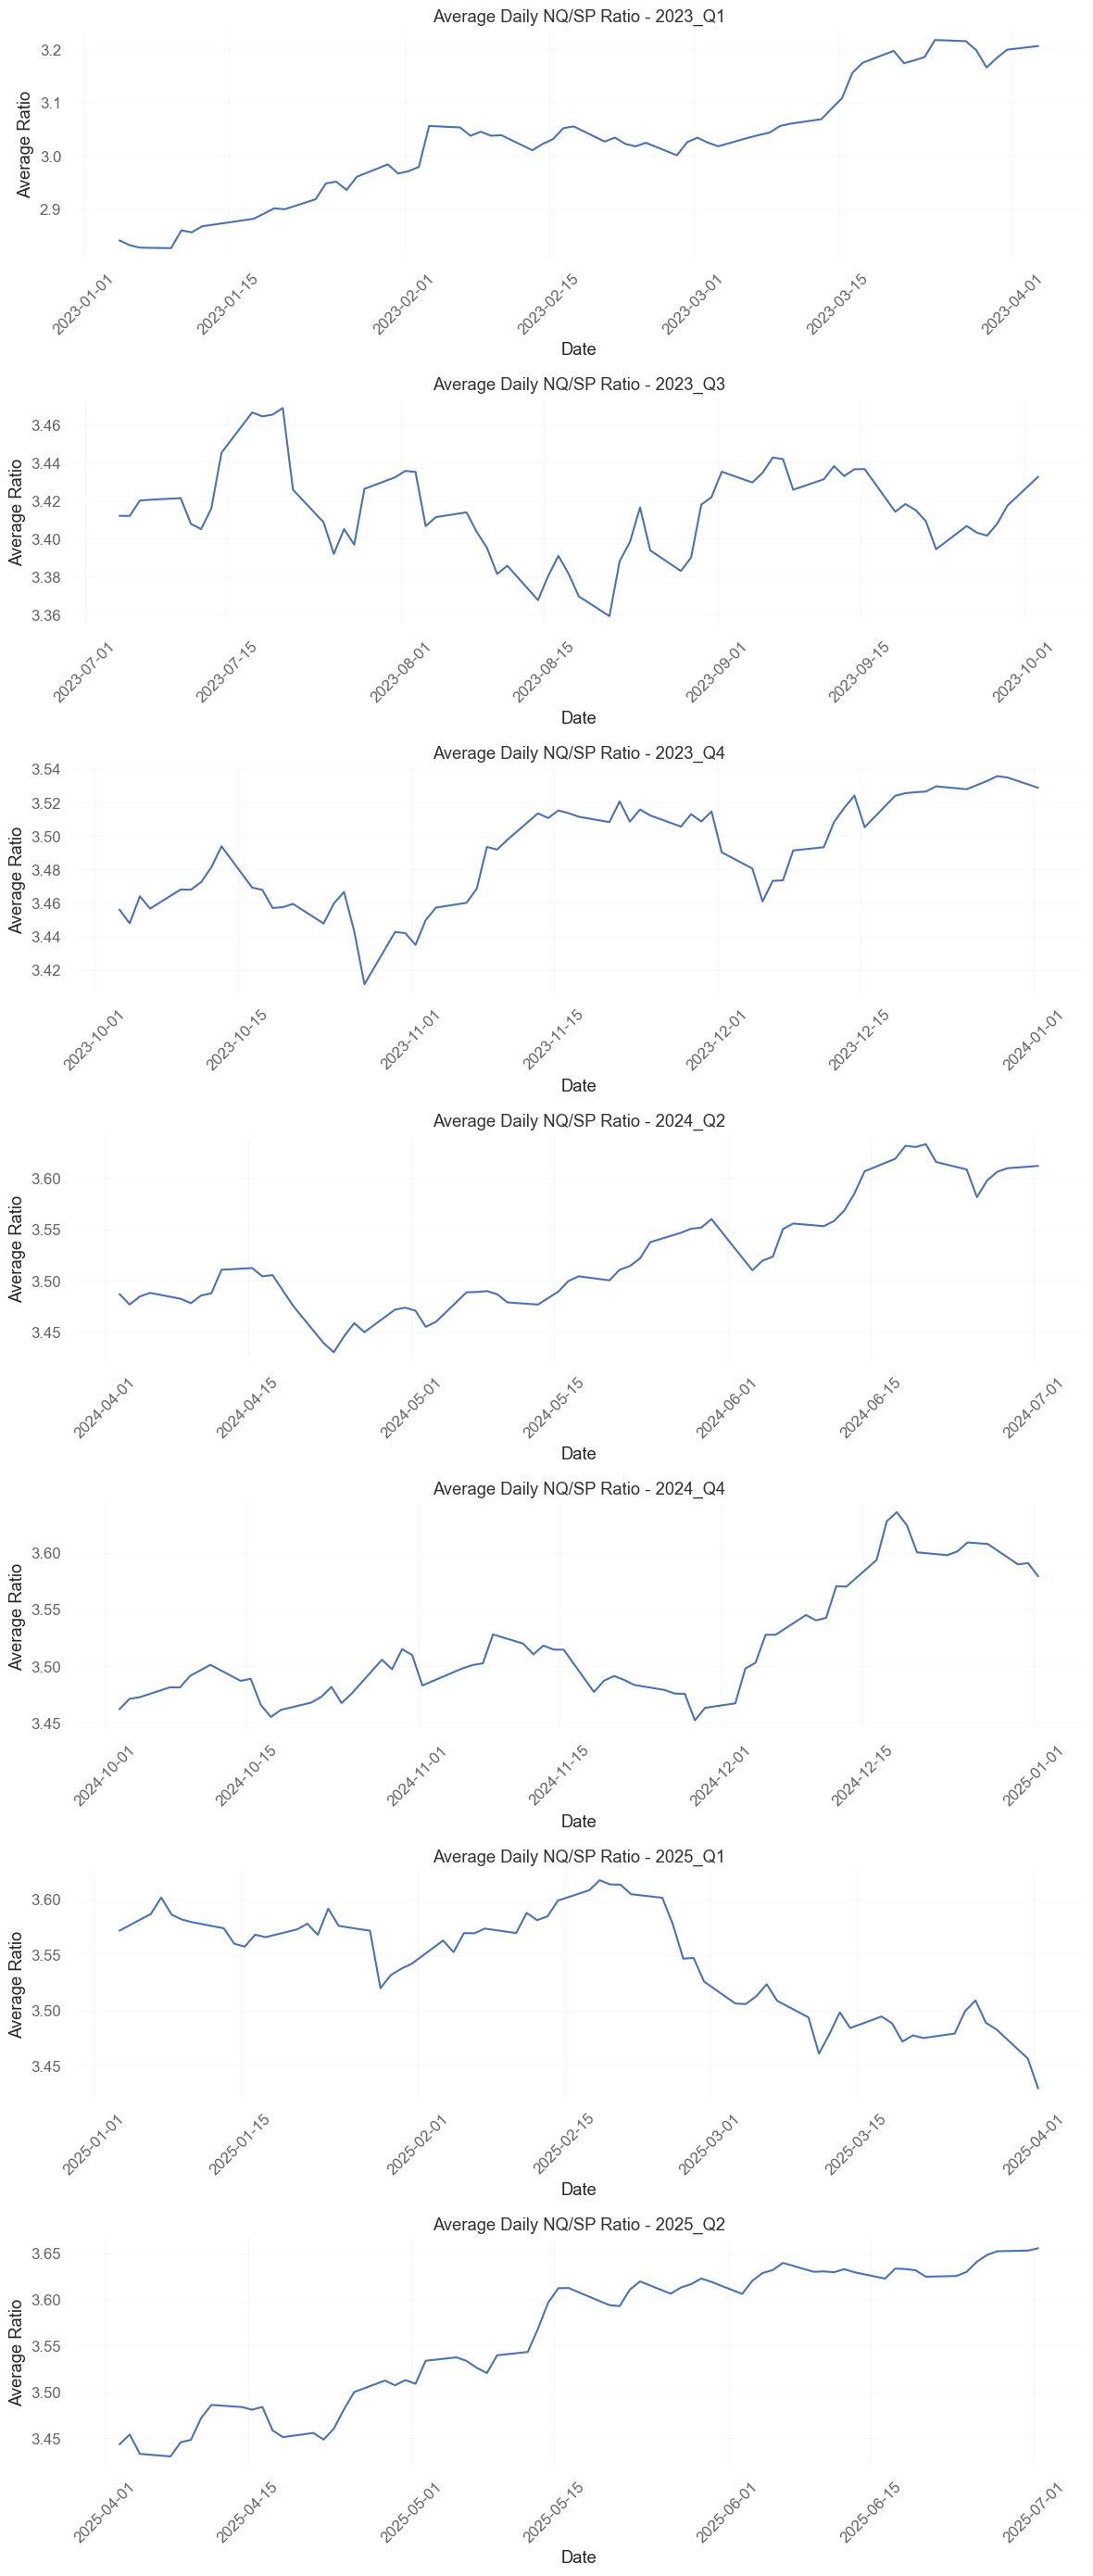

In [5]:
# Calculate the ratio for each quarter
ratio_results = []

# Initialize list to store all av_ratio data with quarter identification
all_av_ratios = []

for quarter in quarters:
    data1 = pd.read_parquet(f'data/data1_{quarter}.parquet')
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1.set_index('datetime', inplace=True)
    
    data_r = np.log(data1 / data1.shift(1)) * 10000
    data_r.columns = ['r_' + col for col in data_r.columns]
    
    data_NQ_SP_temp = pd.concat(
        [data1[['NQ', 'SP']],
        data_r[['r_NQ', 'r_SP']]],
        axis=1
    )
    
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("9:31", "9:40").index] = np.nan
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("15:51", "16:00").index] = np.nan
    
    # Compute the ratio SP / NQ
    ratio_temp = data_NQ_SP_temp["NQ"] / data_NQ_SP_temp["SP"]
    
    # Compute daily averages
    av_ratio_temp = ratio_temp.resample("D").mean().dropna()
    
    # Store results
    ratio_results.append({
        'Quarter': quarter,
        'Mean_Ratio': av_ratio_temp.mean(),
        'Std_Ratio': av_ratio_temp.std(),
        'Min_Ratio': av_ratio_temp.min(),
        'Max_Ratio': av_ratio_temp.max()
    })
    
    # Store av_ratio with quarter identification
    av_ratio_quarter = av_ratio_temp.to_frame(name='av_ratio')
    av_ratio_quarter['quarter'] = quarter
    av_ratio_quarter.index = av_ratio_quarter.index + pd.to_timedelta(np.where(av_ratio_quarter.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")
    all_av_ratios.append(av_ratio_quarter)

# Combine all av_ratios into one DataFrame
all_av_ratios_df = pd.concat(all_av_ratios, axis=0)
print("\nAll Average Ratios by Quarter:")
print(all_av_ratios_df)

# Create summary dataframe
ratio_summary = pd.DataFrame(ratio_results)
print("\nSummary of NQ/SP Ratio by Quarter:")
print(ratio_summary)

# Create charts for each quarter
fig, axes = plt.subplots(len(quarters), 1, figsize=(12, 4*len(quarters)))

for idx, quarter in enumerate(quarters):
    quarter_data = all_av_ratios_df[all_av_ratios_df['quarter'] == quarter]
    
    axes[idx].plot(quarter_data.index, quarter_data['av_ratio'].values)
    axes[idx].set_title(f"Average Daily NQ/SP Ratio - {quarter}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Average Ratio")
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Spread based on returns

/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_68317/437500235.py:25: RuntimeWarning: invalid value encountered in scalar divide
  ratio_temp = data_NQ_SP_temp.resample("D").apply(lambda x: x['r_NQ'].std() / x['r_SP'].std())
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_68317/437500235.py:25: RuntimeWarning: invalid value encountered in scalar divide
  ratio_temp = data_NQ_SP_temp.resample("D").apply(lambda x: x['r_NQ'].std() / x['r_SP'].std())
/var/folders/pk/1f2_609s7cl4sjxfyj9b_s6m0000gn/T/ipykernel_68317/437500235.py:25: RuntimeWarning: invalid value encountered in scalar divide
  ratio_temp = data_NQ_SP_temp.resample("D").apply(lambda x: x['r_NQ'].std() / x['r_SP'].std())



All Ratios by Quarter:
                           sds_ratio  quarter
2023-01-04 09:31:00+00:00   1.279531  2023_Q1
2023-01-05 09:31:00+00:00   1.342489  2023_Q1
2023-01-06 09:31:00+00:00   1.277520  2023_Q1
2023-01-09 09:31:00+00:00   1.375531  2023_Q1
2023-01-10 09:31:00+00:00   1.382066  2023_Q1
...                              ...      ...
2025-06-25 09:31:00+00:00   1.253501  2025_Q2
2025-06-26 09:31:00+00:00   1.356833  2025_Q2
2025-06-27 09:31:00+00:00   1.363997  2025_Q2
2025-06-30 09:31:00+00:00   1.235791  2025_Q2
2025-07-01 09:31:00+00:00   1.180688  2025_Q2

[448 rows x 2 columns]

Summary of NQ/SP Ratio by Quarter:
    Quarter  Mean_Ratio  Std_Ratio  Min_Ratio  Max_Ratio
0   2023_Q1    3.023116   0.110152   2.826538   3.217859
1   2023_Q3    3.414513   0.023675   3.359279   3.468643
2   2023_Q4    3.488637   0.030819   3.411605   3.535814
3   2024_Q2    3.522011   0.054493   3.430368   3.633050
4   2024_Q4    3.515682   0.049944   3.452093   3.636171
5   2025_Q1    3.54375

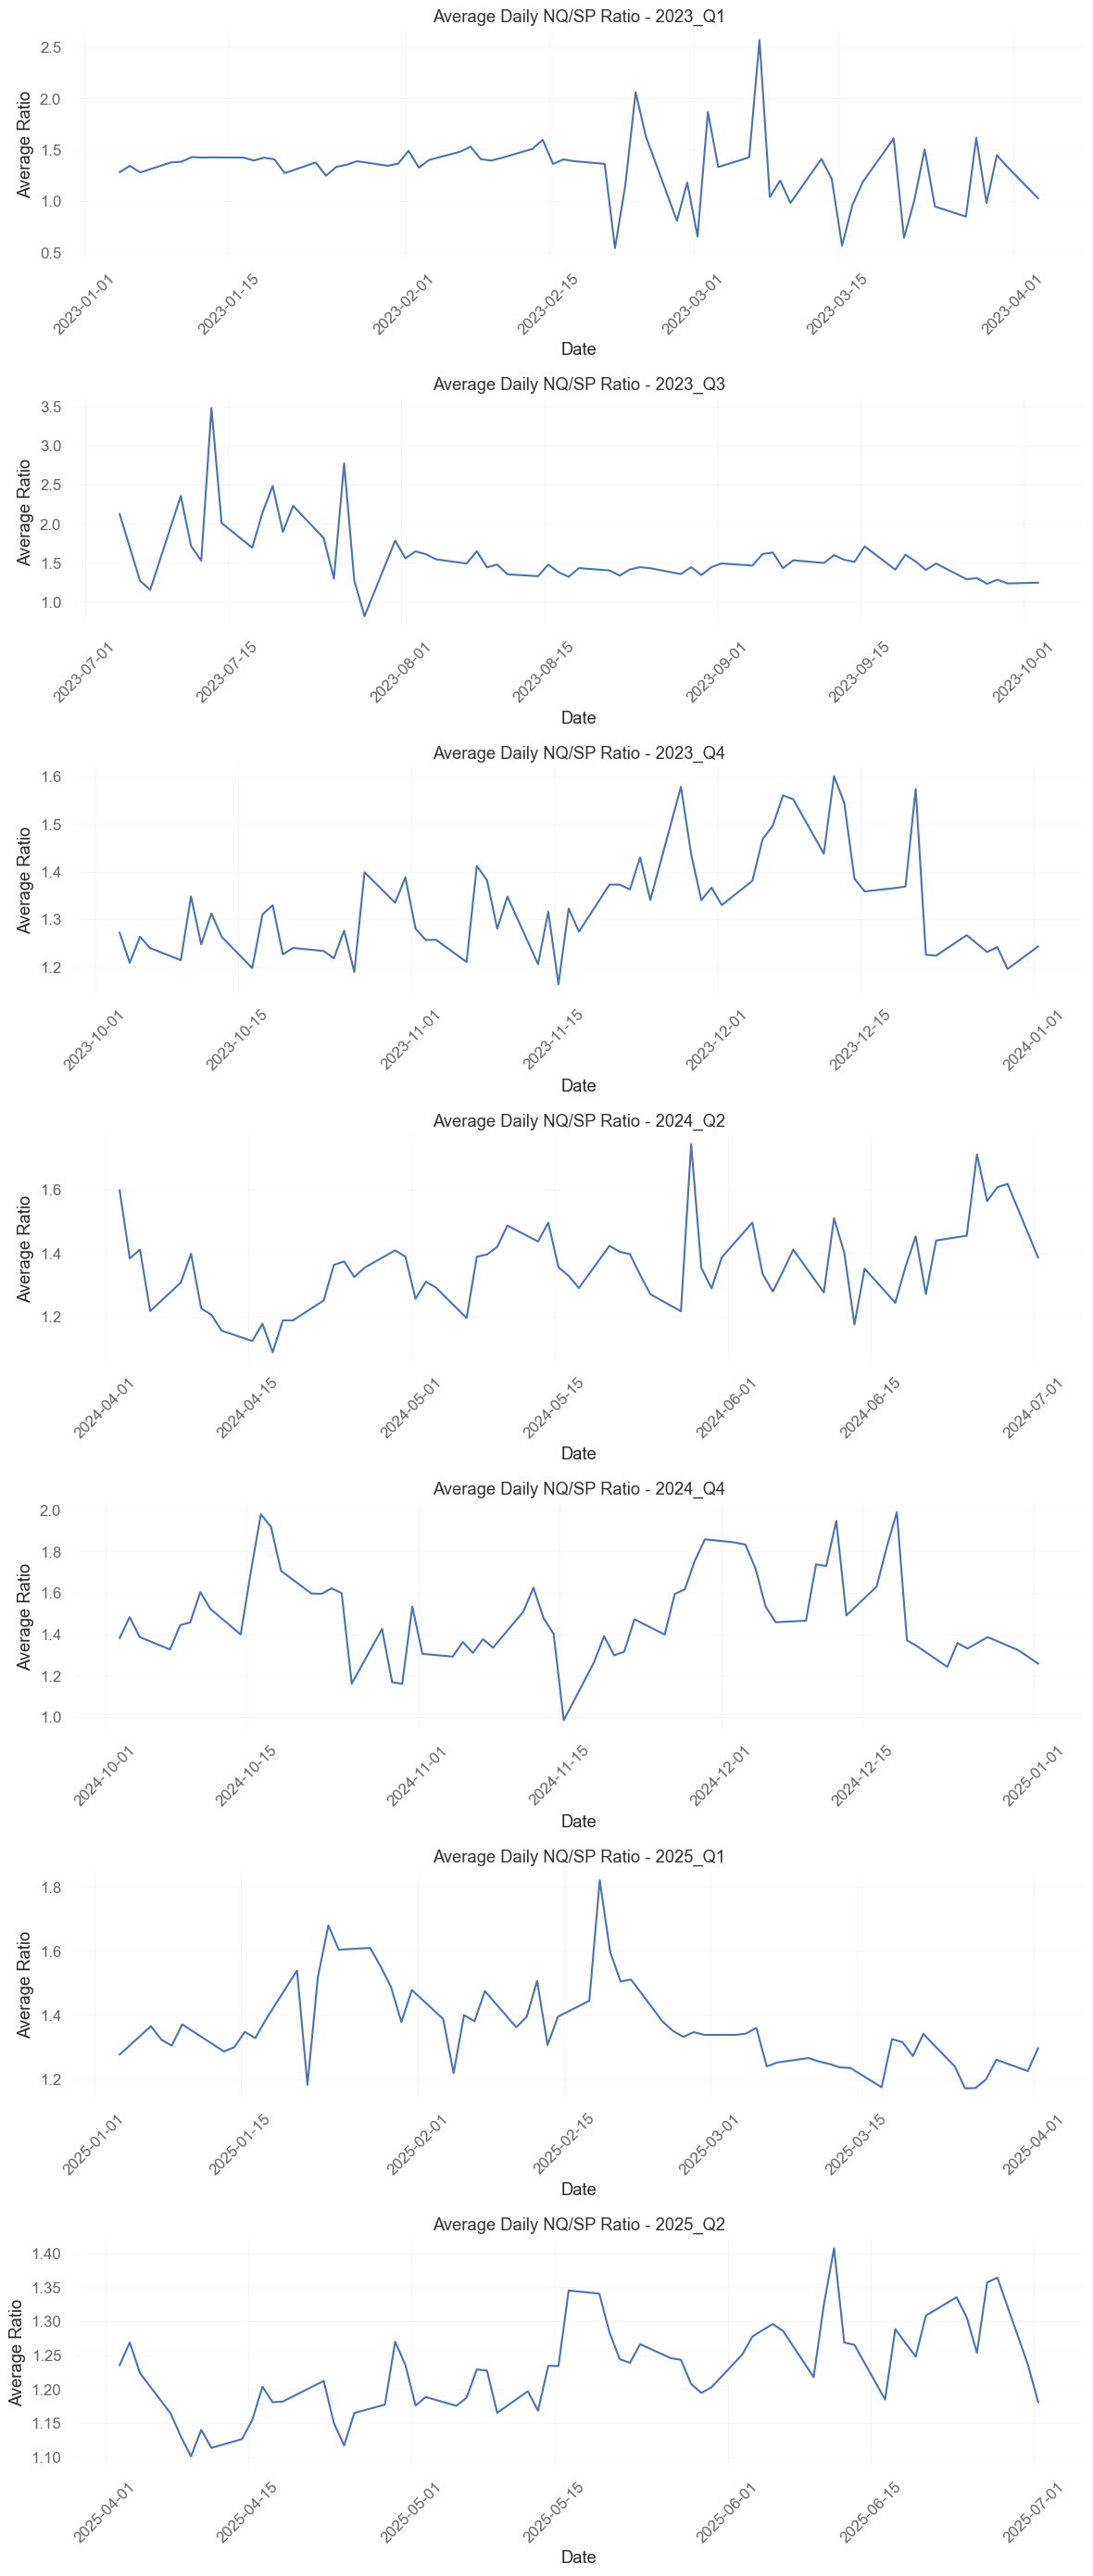

In [6]:
# Calculate the ratio for each quarter
ratio_sds_results = []

# Initialize list to store all av_ratio data with quarter identification
all_sds_ratios = []

for quarter in quarters:
    data1 = pd.read_parquet(f'data/data1_{quarter}.parquet')
    data1['datetime'] = pd.to_datetime(data1['datetime'])
    data1.set_index('datetime', inplace=True)
    
    data_r = np.log(data1 / data1.shift(1)) * 10000
    data_r.columns = ['r_' + col for col in data_r.columns]
    
    data_NQ_SP_temp = pd.concat(
        [data1[['NQ', 'SP']],
        data_r[['r_NQ', 'r_SP']]],
        axis=1
    )
    
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("9:31", "9:40").index] = np.nan
    data_NQ_SP_temp.loc[data_NQ_SP_temp.between_time("15:51", "16:00").index] = np.nan
    
    # Compute the ratio SP / NQ
    ratio_temp = data_NQ_SP_temp.resample("D").apply(lambda x: x['r_NQ'].std() / x['r_SP'].std())
    
    # Compute daily averages
    sds_ratio_temp = ratio_temp.dropna()
    
    # Store results
    ratio_results.append({
        'Quarter': quarter,
        'Mean_Ratio': sds_ratio_temp.mean(),
        'Std_Ratio': sds_ratio_temp.std(),
        'Min_Ratio': sds_ratio_temp.min(),
        'Max_Ratio': sds_ratio_temp.max()
    })
    
    # Store av_ratio with quarter identification
    sds_ratio_quarter = sds_ratio_temp.to_frame(name='sds_ratio')
    sds_ratio_quarter['quarter'] = quarter
    sds_ratio_quarter.index = sds_ratio_quarter.index + pd.to_timedelta(np.where(sds_ratio_quarter.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")
    all_sds_ratios.append(sds_ratio_quarter)

# Combine all av_ratios into one DataFrame
all_sds_ratios_df = pd.concat(all_sds_ratios, axis=0)
print("\nAll Ratios by Quarter:")
print(all_sds_ratios_df)

# Create summary dataframe
ratio_summary = pd.DataFrame(ratio_results)
print("\nSummary of NQ/SP Ratio by Quarter:")
print(ratio_summary)

# Create charts for each quarter
fig, axes = plt.subplots(len(quarters), 1, figsize=(12, 4*len(quarters)))

for idx, quarter in enumerate(quarters):
    quarter_data = all_sds_ratios_df[all_sds_ratios_df['quarter'] == quarter]
    
    axes[idx].plot(quarter_data.index, quarter_data['sds_ratio'].values)
    axes[idx].set_title(f"Average Daily NQ/SP Ratio - {quarter}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Average Ratio")
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [7]:
all_data_2 = all_data.copy()
all_data_2 = all_data_2.merge(all_sds_ratios_df[['sds_ratio']], left_index=True, right_index=True, how='left')
all_data_2 = all_data_2.merge(all_av_ratios_df[['av_ratio']], left_index=True, right_index=True, how='left')

all_data_2.between_time("9:31", "9:45").head(40)

NQ        SP       r_NQ       r_SP  quarter  \
datetime                                                                        
2023-01-02 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:41:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:42:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:43:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:44:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:45:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:41:00+00:00  11076.889  3871.616  12.222087   9.698328  2023_Q1   
2023-01-03 09:42:00+00:00  11087.009  3875.631   9.131968  10.364973  2023_Q1   
2023-01-03 09:43:00+00:00  11084.699  3876.116  -2.083737   1.251331  2023_Q1   
2023-01-03 09:44:00+00:00  11082.409  3873.866  -2.066124  -5.806465  2023_Q1   
2023-01-03 09:45:00+00:00  11051.949  3867.122 -27.522840 -17.424137  2023_Q1   
2023-01-04 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   

                           sds_ratio  av_ratio  
datetime                                        
2023-01-02 09:31:00+00:00        NaN       NaN  
2023-01-02 09:32:00+00:00        NaN       NaN  
2023-01-02 09:33:00+00:00        NaN       NaN  
2023-01-02 09:34:00+00:00        NaN       NaN  
2023-01-02 09:35:00+00:00        NaN       NaN  
2023-01-02 09:36:00+00:00        NaN       NaN  
2023-01-02 09:37:00+00:00        NaN       NaN  
2023-01-02 09:38:00+00:00        NaN       NaN  
2023-01-02 09:39:00+00:00        NaN       NaN  
2023-01-02 09:40:00+00:00        NaN       NaN  
2023-01-02 09:41:00+00:00        NaN       

In [8]:
all_data_2[['av_ratio', 'sds_ratio']] = all_data_2[['av_ratio', 'sds_ratio']].ffill()
all_data_2.between_time("9:31", "9:45").head(40)

NQ        SP       r_NQ       r_SP  quarter  \
datetime                                                                        
2023-01-02 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:41:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:42:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:43:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:44:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-02 09:45:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-03 09:41:00+00:00  11076.889  3871.616  12.222087   9.698328  2023_Q1   
2023-01-03 09:42:00+00:00  11087.009  3875.631   9.131968  10.364973  2023_Q1   
2023-01-03 09:43:00+00:00  11084.699  3876.116  -2.083737   1.251331  2023_Q1   
2023-01-03 09:44:00+00:00  11082.409  3873.866  -2.066124  -5.806465  2023_Q1   
2023-01-03 09:45:00+00:00  11051.949  3867.122 -27.522840 -17.424137  2023_Q1   
2023-01-04 09:31:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:32:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:33:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:34:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:35:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:36:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:37:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:38:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:39:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   
2023-01-04 09:40:00+00:00        NaN       NaN        NaN        NaN  2023_Q1   

                           sds_ratio  av_ratio  
datetime                                        
2023-01-02 09:31:00+00:00        NaN       NaN  
2023-01-02 09:32:00+00:00        NaN       NaN  
2023-01-02 09:33:00+00:00        NaN       NaN  
2023-01-02 09:34:00+00:00        NaN       NaN  
2023-01-02 09:35:00+00:00        NaN       NaN  
2023-01-02 09:36:00+00:00        NaN       NaN  
2023-01-02 09:37:00+00:00        NaN       NaN  
2023-01-02 09:38:00+00:00        NaN       NaN  
2023-01-02 09:39:00+00:00        NaN       NaN  
2023-01-02 09:40:00+00:00        NaN       NaN  
2023-01-02 09:41:00+00:00        NaN       

In [9]:
all_data_2[all_data_2['quarter'] == '2025_Q1'].between_time("9:31", "9:45").tail(40)

NQ        SP       r_NQ       r_SP  quarter  \
datetime                                                                        
2025-03-27 09:36:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-27 09:37:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-27 09:38:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-27 09:39:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-27 09:40:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-27 09:41:00+00:00  19957.274  5726.212   2.333256   3.521272  2025_Q1   
2025-03-27 09:42:00+00:00  19961.063  5726.219   1.898376   0.012224  2025_Q1   
2025-03-27 09:43:00+00:00  19962.731  5726.495   0.835592   0.481982  2025_Q1   
2025-03-27 09:44:00+00:00  19960.288  5726.271  -1.223855  -0.391172  2025_Q1   
2025-03-27 09:45:00+00:00  19959.775  5726.318  -0.257014   0.082078  2025_Q1   
2025-03-28 09:31:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:32:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:33:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:34:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:35:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:36:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:37:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:38:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:39:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:40:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-28 09:41:00+00:00  19446.397  5615.539  -1.405303   1.180722  2025_Q1   
2025-03-28 09:42:00+00:00  19445.209  5614.713  -0.610929  -1.471027  2025_Q1   
2025-03-28 09:43:00+00:00  19458.786  5617.623   6.979746   5.181469  2025_Q1   
2025-03-28 09:44:00+00:00  19463.731  5618.855   2.540946   2.192858  2025_Q1   
2025-03-28 09:45:00+00:00  19460.885  5617.394  -1.462314  -2.600512  2025_Q1   
2025-03-31 09:31:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:32:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:33:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:34:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:35:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:36:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:37:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:38:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:39:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:40:00+00:00        NaN       NaN        NaN        NaN  2025_Q1   
2025-03-31 09:41:00+00:00  18867.398  5504.128 -11.782175 -11.998334  2025_Q1   
2025-03-31 09:42:00+00:00  18866.819  5501.745  -0.306883  -4.330415  2025_Q1   
2025-03-31 09:43:00+00:00  18873.820  5503.369   3.710059   2.951355  2025_Q1   
2025-03-31 09:44:00+00:00  18863.541  5499.872  -5.447652  -6.356309  2025_Q1   
2025-03-31 09:45:00+00:00  18825.631  5494.622 -20.117191  -9.550236  2025_Q1   

                           sds_ratio  av_ratio  
datetime                                        
2025-03-27 09:36:00+00:00   1.198211  3.488700  
2025-03-27 09:37:00+00:00   1.198211  3.488700  
2025-03-27 09:38:00+00:00   1.198211  3.488700  
2025-03-27 09:39:00+00:00   1.198211  3.488700  
2025-03-27 09:40:00+00:00   1.198211  3.488700  
2025-03-27 09:41:00+00:00   1.198211  3.488700  
2025-03-27 09:42:00+00:00   1.198211  3.488700  
2025-03-27 09:43:00+00:00   1.198211  3.488700  
2025-03-27 09:44:00+00:00   1.198211  3.488700  
2025-03-27 09:45:00+00:00   1.198211  3.488700  
2025-03-28 09:31:00+00:00   1.259899  3.482

In [10]:
all_data_2.index.day_name().value_counts()

datetime
Friday       35484
Thursday     35439
Tuesday      35362
Monday       34838
Wednesday    34689
Name: count, dtype: int64

In [11]:
all_data_2['spread_avratio'] = all_data_2['NQ'] - all_data_2['SP'] * all_data_2['av_ratio']
all_data_2['spread_sdsratio'] = all_data_2['r_NQ'] - all_data_2['r_SP'] * all_data_2['sds_ratio']

In [12]:
all_data_2.tail(40)

NQ        SP      r_NQ      r_SP  quarter  \
datetime                                                                      
2025-06-30 15:21:00+00:00  22647.220  6197.004  3.395695  4.430541  2025_Q2   
2025-06-30 15:22:00+00:00  22659.608  6199.712  5.468492  4.368899  2025_Q2   
2025-06-30 15:23:00+00:00  22657.020  6199.216 -1.142186 -0.800069  2025_Q2   
2025-06-30 15:24:00+00:00  22659.021  6199.241  0.883131  0.040328  2025_Q2   
2025-06-30 15:25:00+00:00  22660.264  6200.049  0.548552  1.303300  2025_Q2   
2025-06-30 15:26:00+00:00  22665.875  6201.504  2.475834  2.346480  2025_Q2   
2025-06-30 15:27:00+00:00  22671.064  6203.713  2.289083  3.561405  2025_Q2   
2025-06-30 15:28:00+00:00  22667.310  6203.251 -1.655992 -0.744743  2025_Q2   
2025-06-30 15:29:00+00:00  22665.119  6203.742 -0.966637  0.791489  2025_Q2   
2025-06-30 15:30:00+00:00  22658.809  6201.548 -2.784401 -3.537201  2025_Q2   
2025-06-30 15:31:00+00:00  22650.608  6198.865 -3.619998 -4.327275  2025_Q2   
2025-06-30 15:32:00+00:00  22657.731  6200.864  3.144234  3.224264  2025_Q2   
2025-06-30 15:33:00+00:00  22656.131  6200.138 -0.706186 -1.170873  2025_Q2   
2025-06-30 15:34:00+00:00  22663.297  6201.629  3.162441  2.404496  2025_Q2   
2025-06-30 15:35:00+00:00  22662.576  6201.905 -0.318141  0.445034  2025_Q2   
2025-06-30 15:36:00+00:00  22661.032  6201.185 -0.681323 -1.161001  2025_Q2   
2025-06-30 15:37:00+00:00  22657.810  6199.494 -1.421925 -2.727270  2025_Q2   
2025-06-30 15:38:00+00:00  22652.619  6197.311 -2.291305 -3.521875  2025_Q2   
2025-06-30 15:39:00+00:00  22654.253  6197.338  0.721303  0.043567  2025_Q2   
2025-06-30 15:40:00+00:00  22655.499  6197.919  0.549992  0.937455  2025_Q2   
2025-06-30 15:41:00+00:00  22670.075  6201.595  6.431689  5.929265  2025_Q2   
2025-06-30 15:42:00+00:00  22670.389  6201.419  0.138508 -0.283802  2025_Q2   
2025-06-30 15:43:00+00:00  22674.564  6202.353  1.841440  1.505994  2025_Q2   
2025-06-30 15:44:00+00:00  22677.586  6203.375  1.332682  1.647626  2025_Q2   
2025-06-30 15:45:00+00:00  22666.053  6200.426 -5.086932 -4.754994  2025_Q2   
2025-06-30 15:46:00+00:00  22668.721  6201.941  1.177021  2.443082  2025_Q2   
2025-06-30 15:47:00+00:00  22669.743  6202.694  0.450831  1.214062  2025_Q2   
2025-06-30 15:48:00+00:00  22677.831  6204.918  3.567115  3.584896  2025_Q2   
2025-06-30 15:49:00+00:00  22679.210  6206.386  0.608064  2.365585  2025_Q2   
2025-06-30 15:50:00+00:00  22678.865  6205.469 -0.152123 -1.477620  2025_Q2   
2025-06-30 15:51:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:52:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:53:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:54:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:55:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:56:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:57:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:58:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 15:59:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   
2025-06-30 16:00:00+00:00        NaN       NaN       NaN       NaN  2025_Q2   

                           sds_ratio  av_ratio  spread_avratio  \
datetime                                                         
2025-06-30 15:21:00+00:00   1.235791  3.652897       10.201896   
2025-06-30 15:22:00+00:00   1.235791  3.652897       12.697851   
2025-06-30 15:23:00+00:00   1.235791  3.652897       11.921688   
2025-06-30 15:24:00+00:00   1.235791  3.652897       13.831365   
2025-06-30 15:25:00+00:00   1.235791  3.652897       12.122824   
2025-06-30 15:26:00+00:00   1.235791  3.652897       12.418859   
2025-06-30 15:27:00+00:00   1.235791  3.652897        9.538609   
2025-06-30 15:28:00+00:00   1.235791  3.652897        7.472248   
2025-06-30 15:29:00+00:00   1.235791  3.652897        3

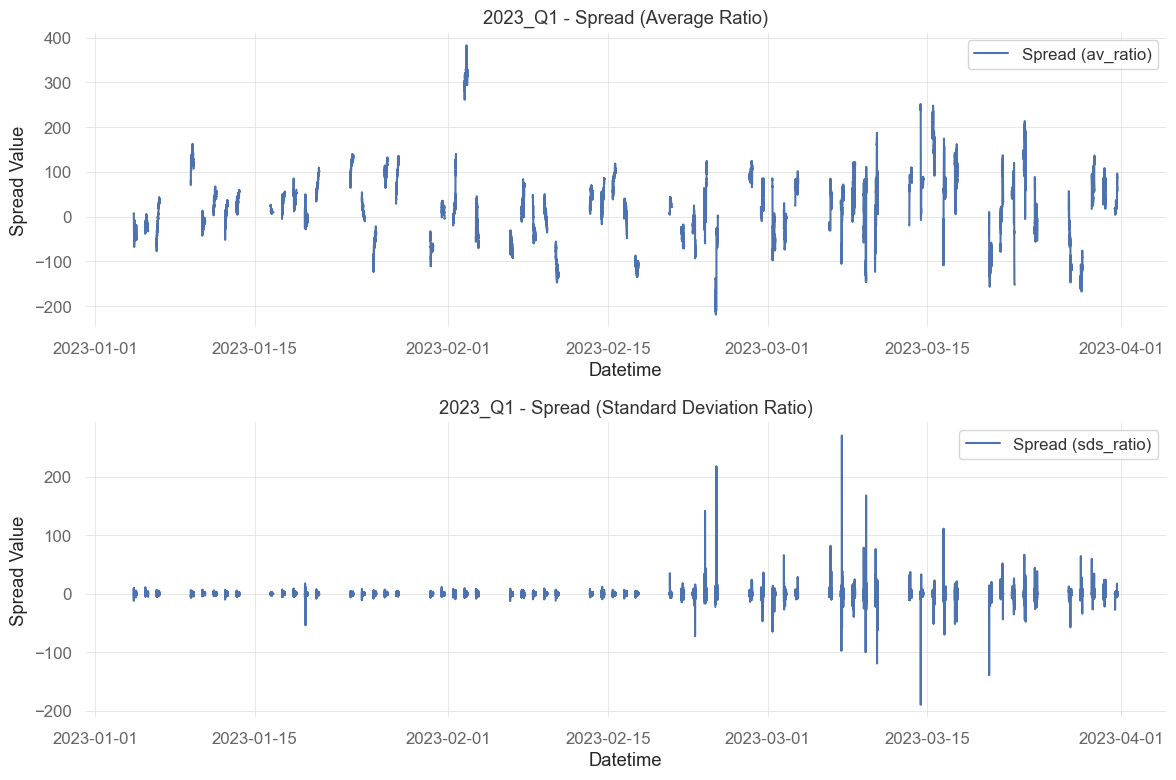

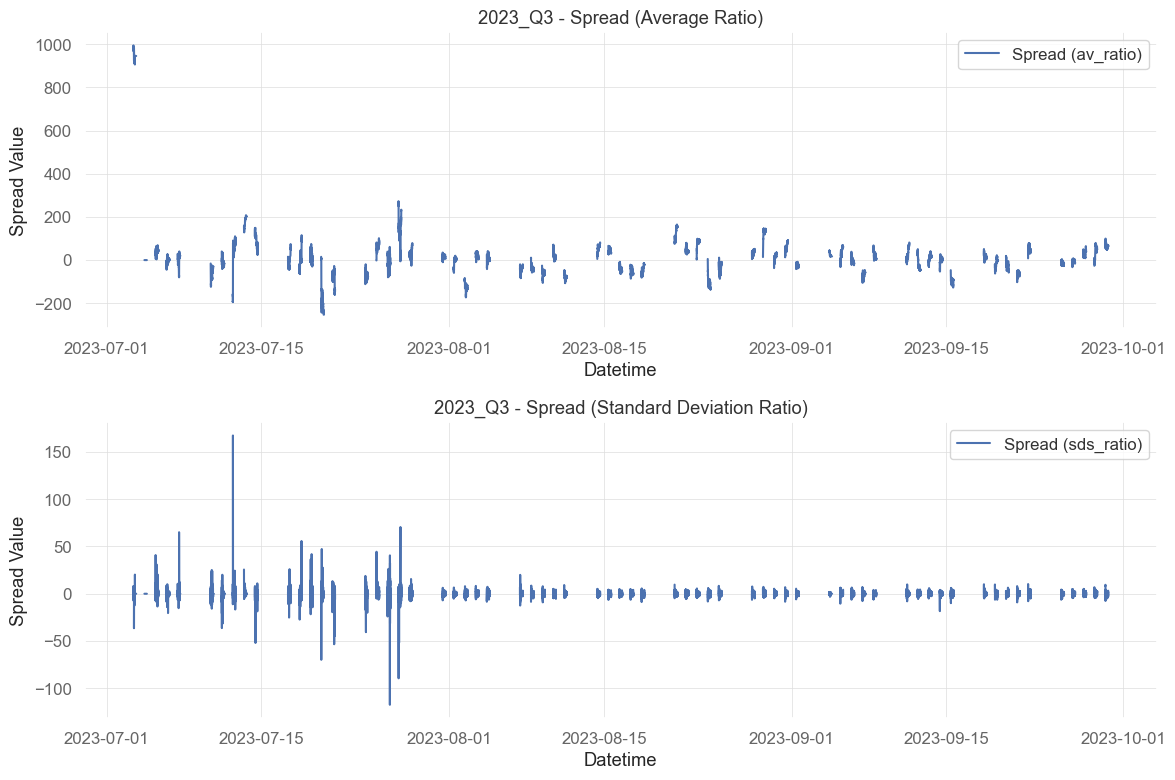

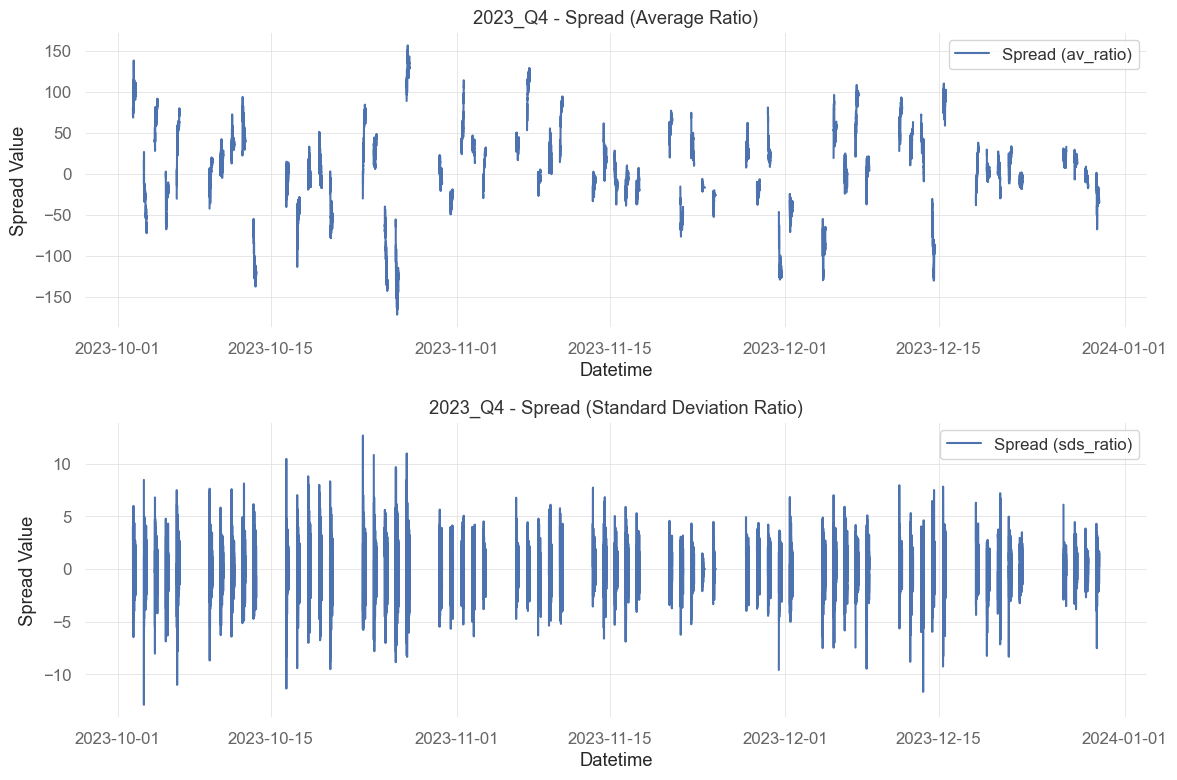

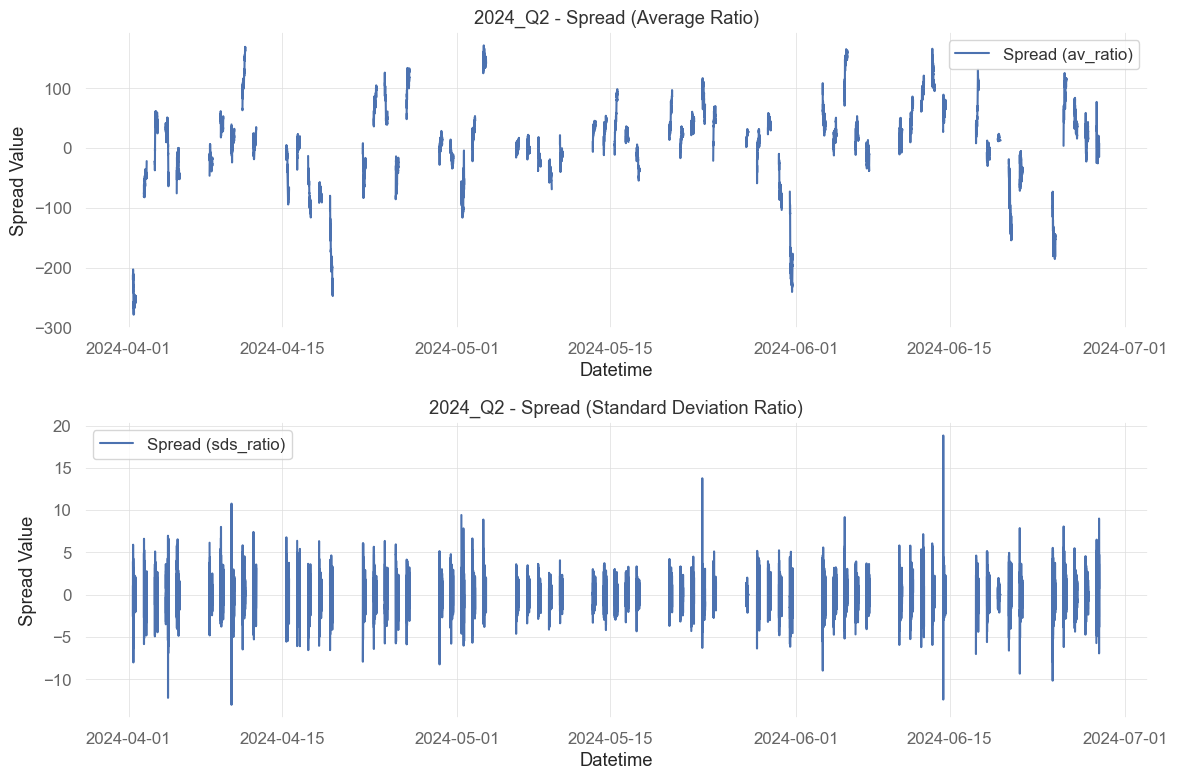

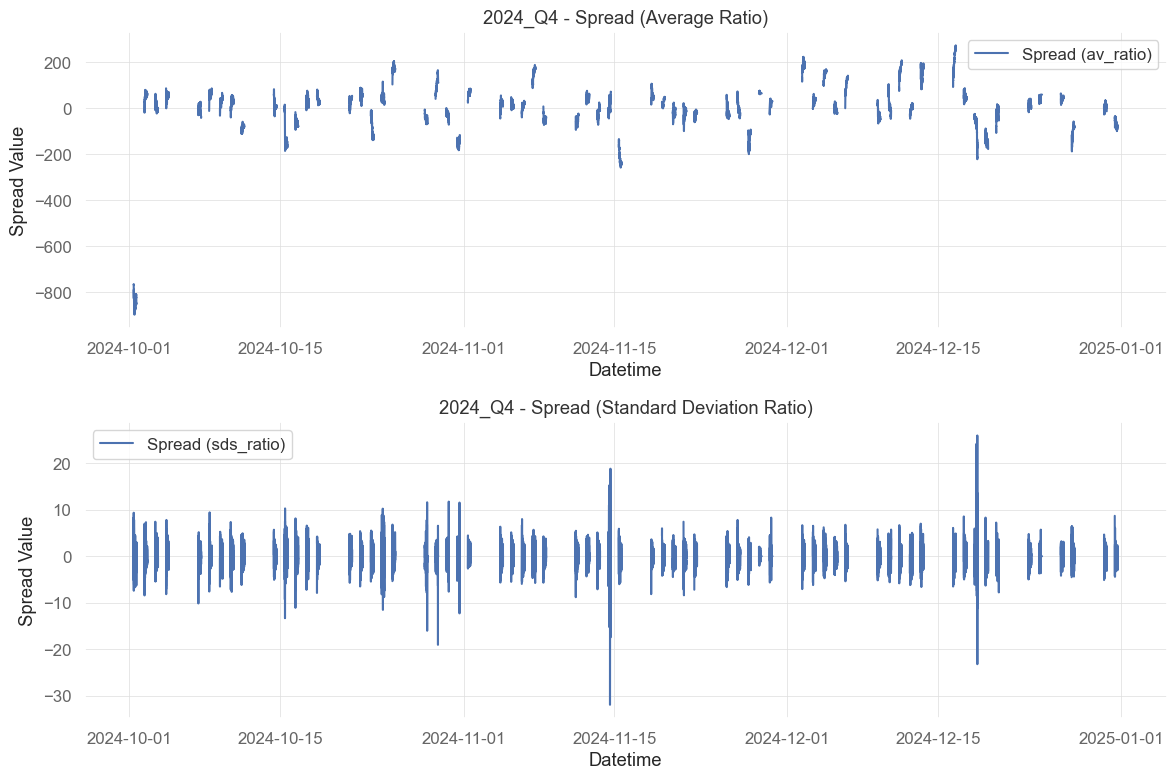

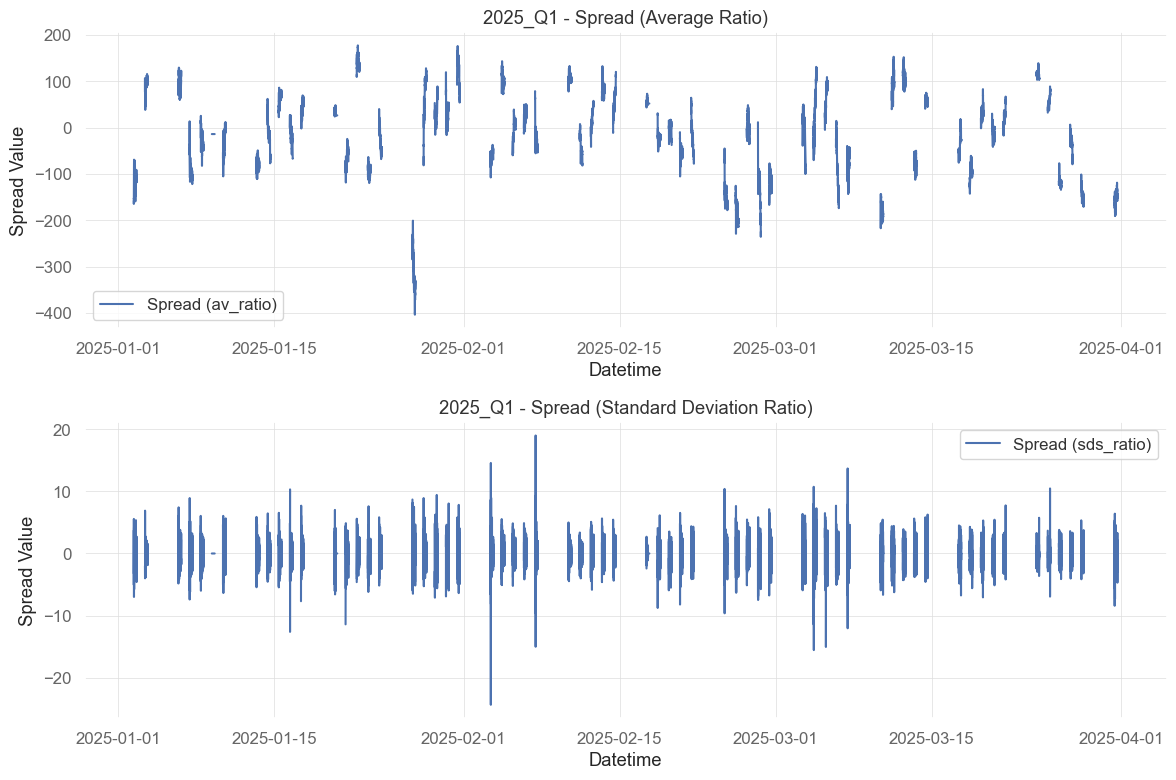

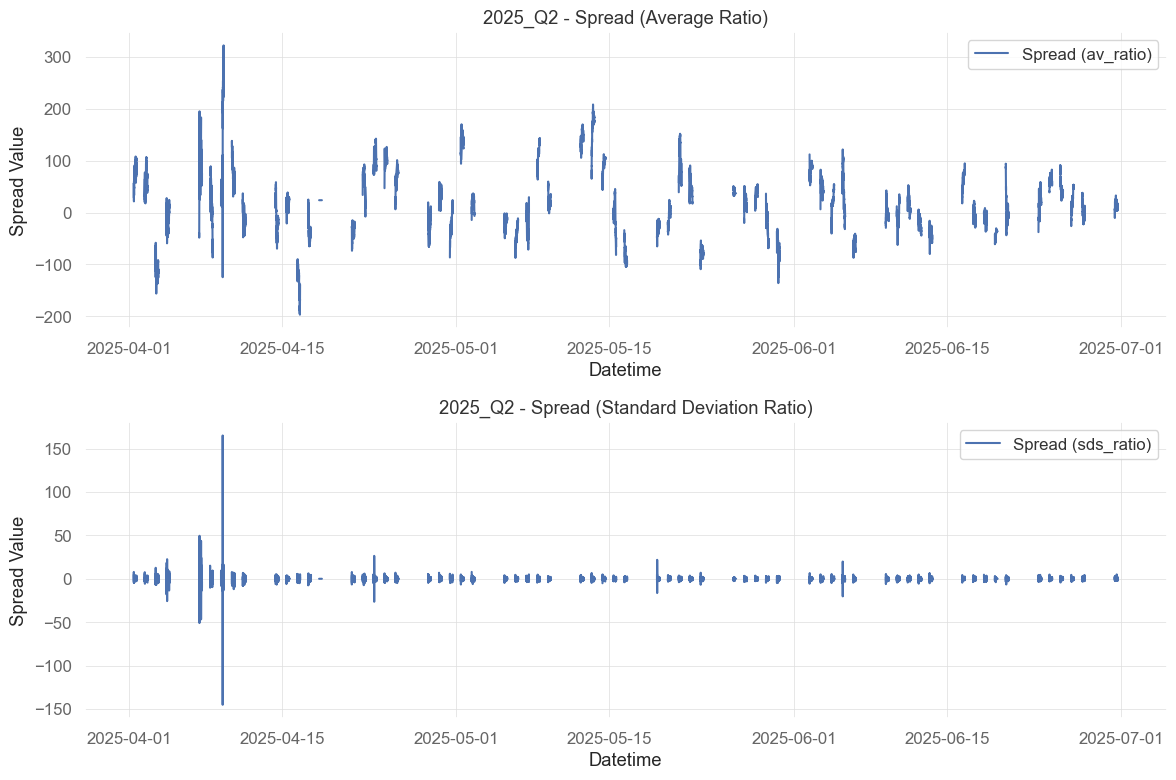

In [13]:
# Create separate charts for each quarter showing both spreads
for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter]
    
    # Create subplots for this quarter
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    
    # Plot spread based on average ratio
    axes[0].plot(quarter_data.index,
                 quarter_data["spread_avratio"],
                 label="Spread (av_ratio)")
    axes[0].set_title(f"{quarter} - Spread (Average Ratio)")
    axes[0].set_xlabel("Datetime")
    axes[0].set_ylabel("Spread Value")
    axes[0].legend()
    
    # Plot spread based on standard deviation ratio
    axes[1].plot(quarter_data.index,
                 quarter_data["spread_sdsratio"],
                 label="Spread (sds_ratio)")
    axes[1].set_title(f"{quarter} - Spread (Standard Deviation Ratio)")
    axes[1].set_xlabel("Datetime")
    axes[1].set_ylabel("Spread Value")
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

In [14]:
# we assume that spread mean reverts to 0

# lets apply the volatility breakout model

# first we need to calculate the standard deviation of the spreads
# let's use rolling window of 120 minutes (2 hours)

all_data_2["std_spread_avratio"] = all_data_2["spread_avratio"].rolling(window=120).std()
all_data_2["std_spread_sdsratio"] = all_data_2["spread_sdsratio"].rolling(window=120).std()

# lets put missings whenever KO price is missing
# (PEP price should be missing in the same moments)

all_data_2.loc[all_data_2["NQ"].isna(), ["std_spread_avratio", "std_spread_sdsratio"]] = np.nan

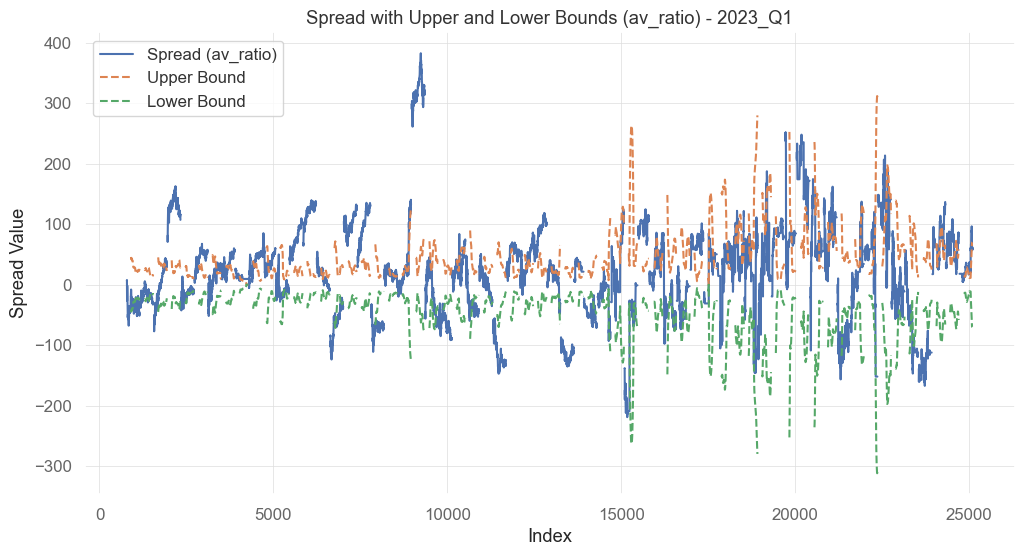

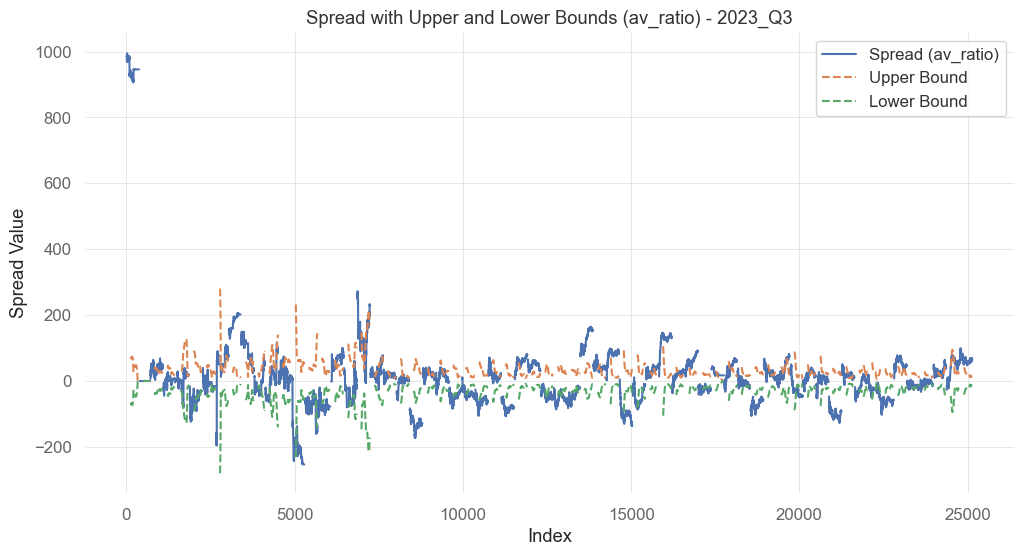

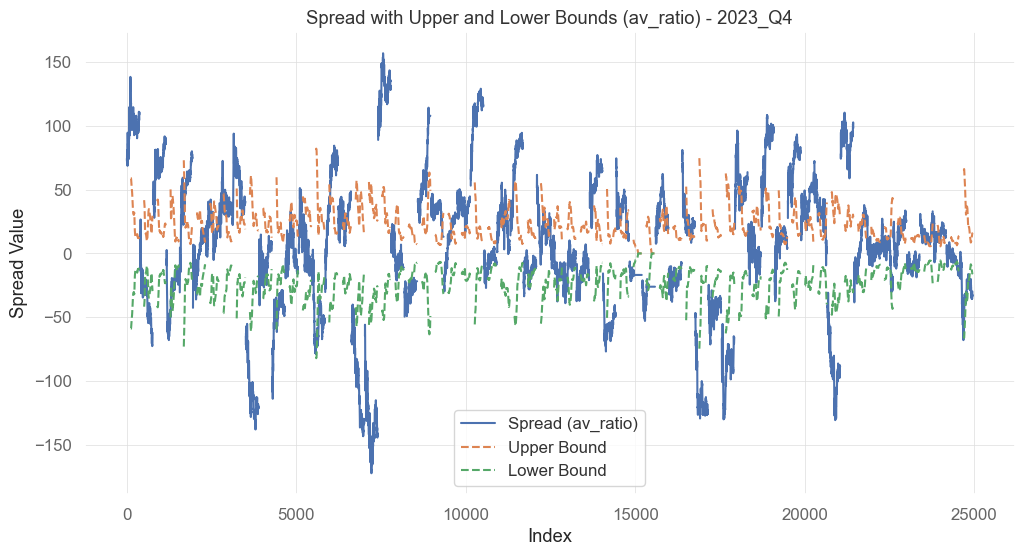

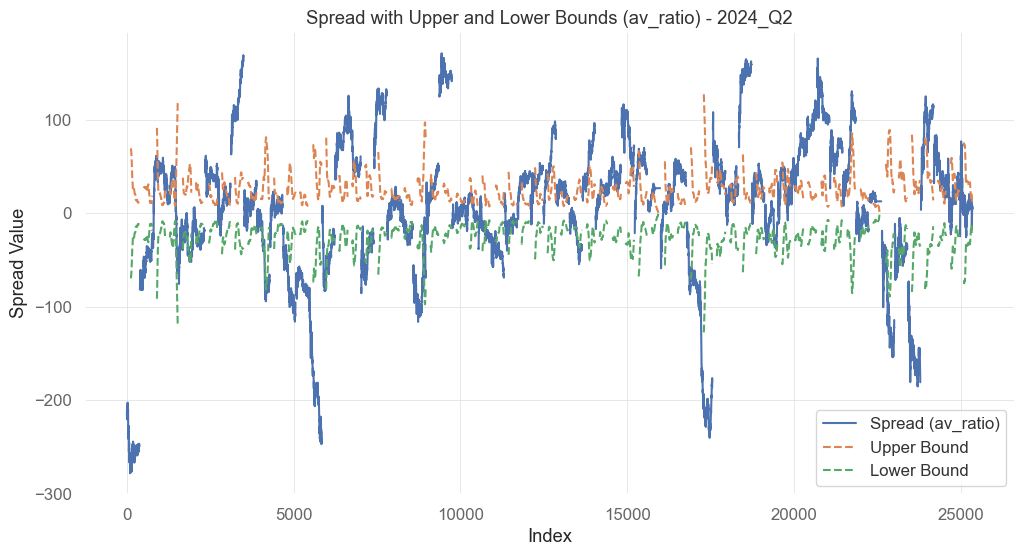

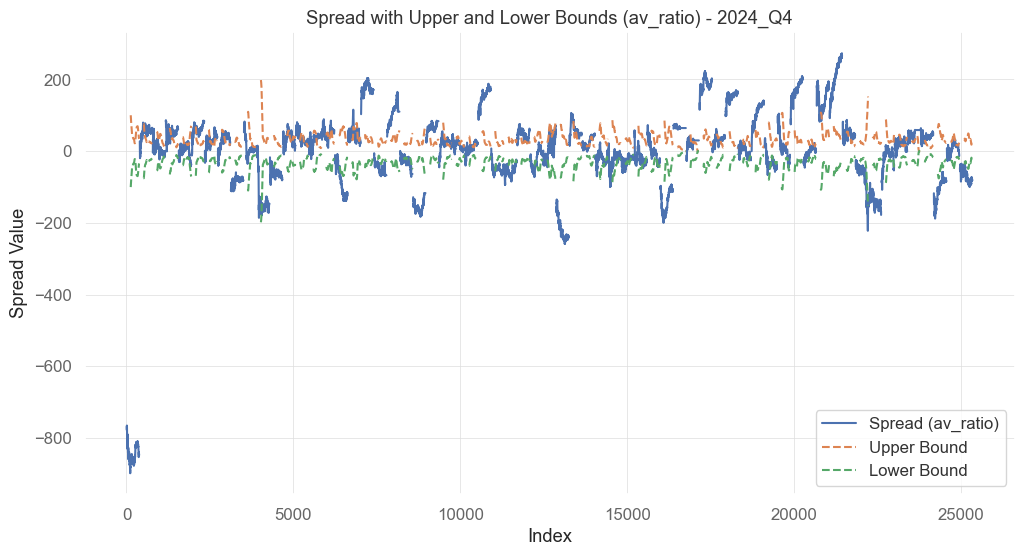

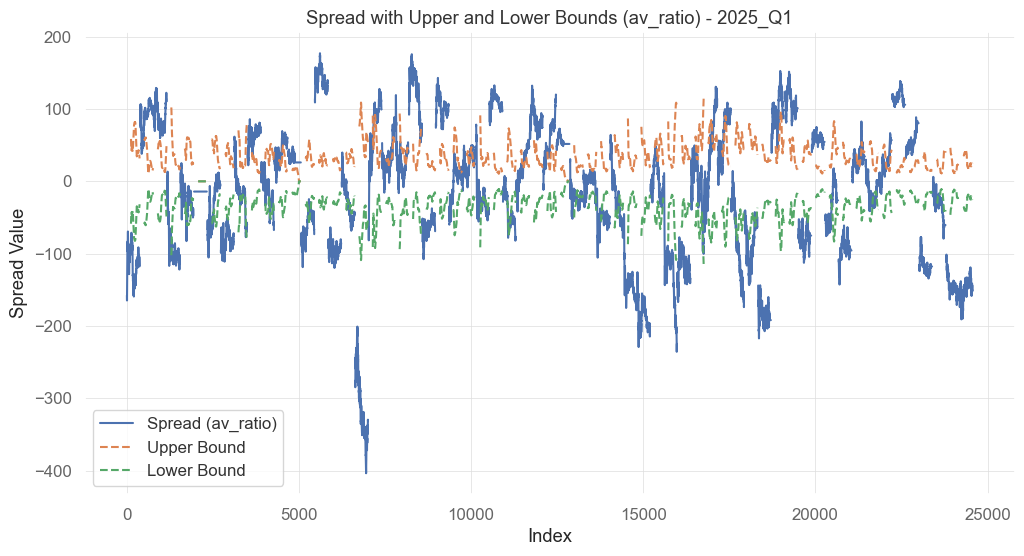

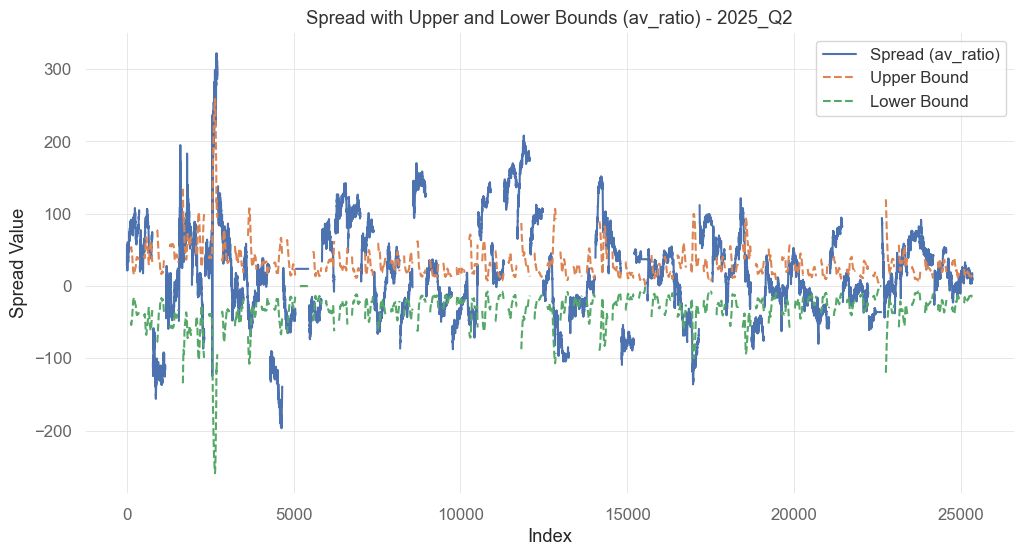

In [15]:
# applying a volatility breakout model
# sample upper and lower bounds for spreads
# for a volatility multiplier of 3
# (here we put the upper and lower band along zero)

all_data_2["upper_bound_avratio"] = 3 * all_data_2["std_spread_avratio"]
all_data_2["lower_bound_avratio"] = -3 * all_data_2["std_spread_avratio"]

# lets see how it looks like for each quarter separately
# Create separate charts for each quarter
for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter]
    
    # Reset index for plotting
    quarter_data_plot = quarter_data.reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["spread_avratio"],
             label="Spread (av_ratio)")
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["upper_bound_avratio"],
             label="Upper Bound", linestyle='--')
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["lower_bound_avratio"],
             label="Lower Bound", linestyle='--')
    plt.title(f"Spread with Upper and Lower Bounds (av_ratio) - {quarter}")
    plt.xlabel("Index")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.show()

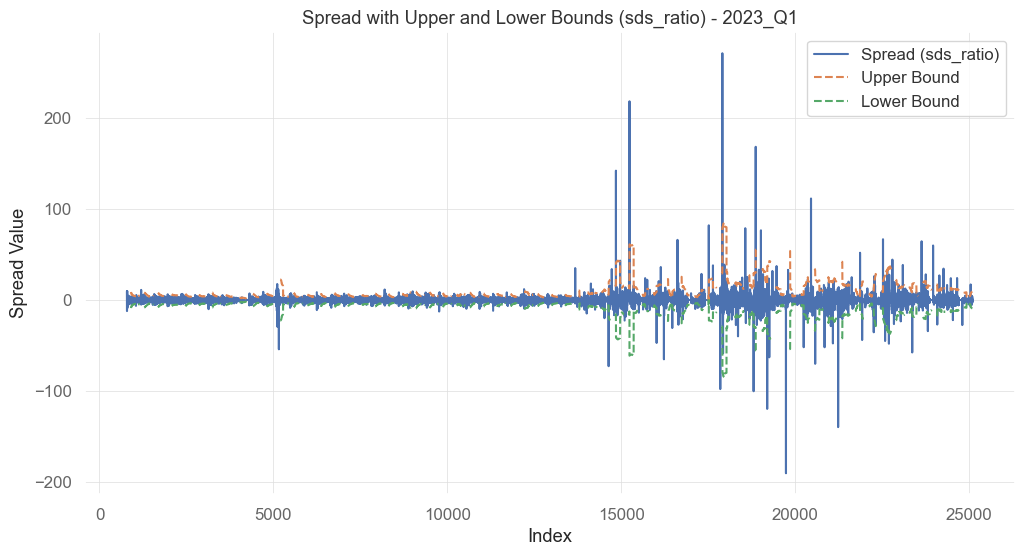

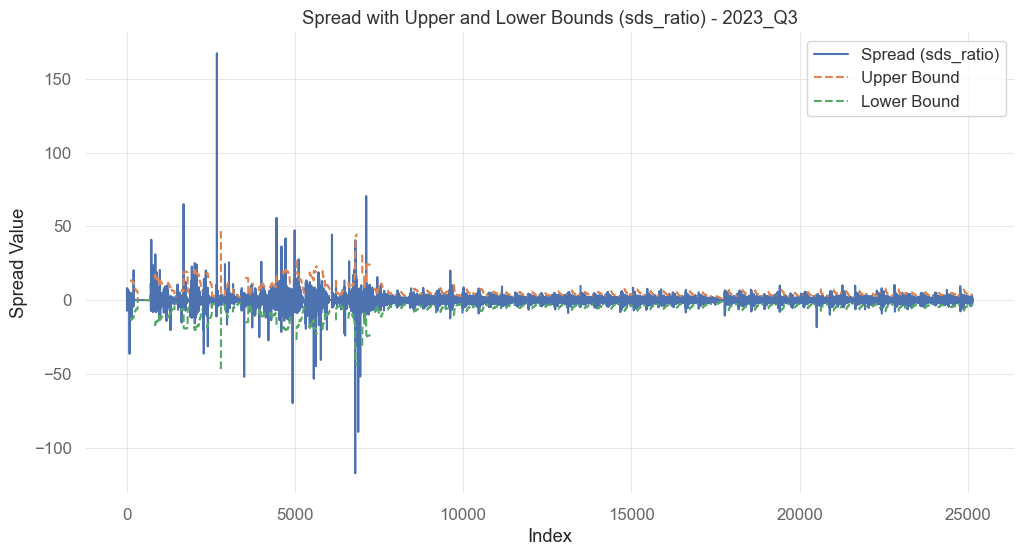

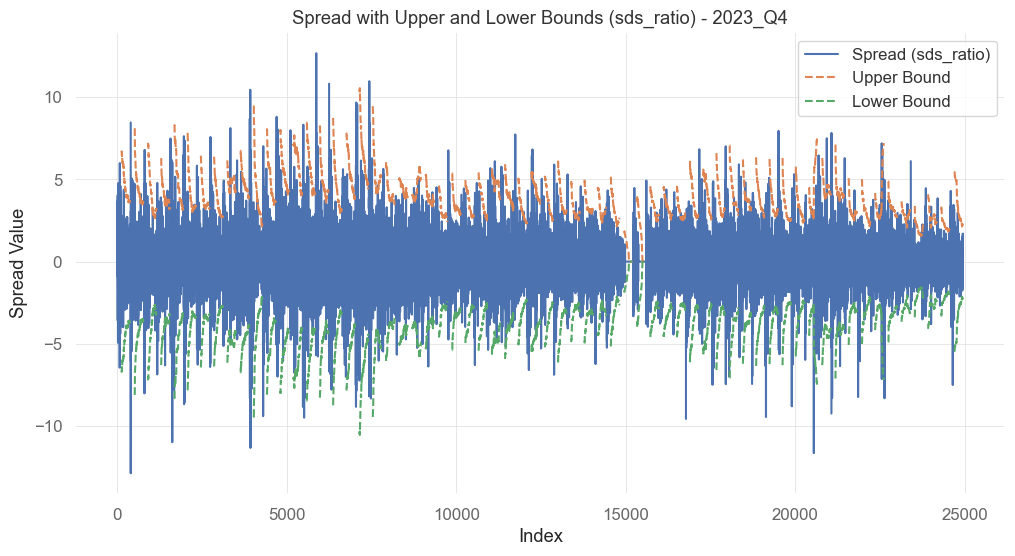

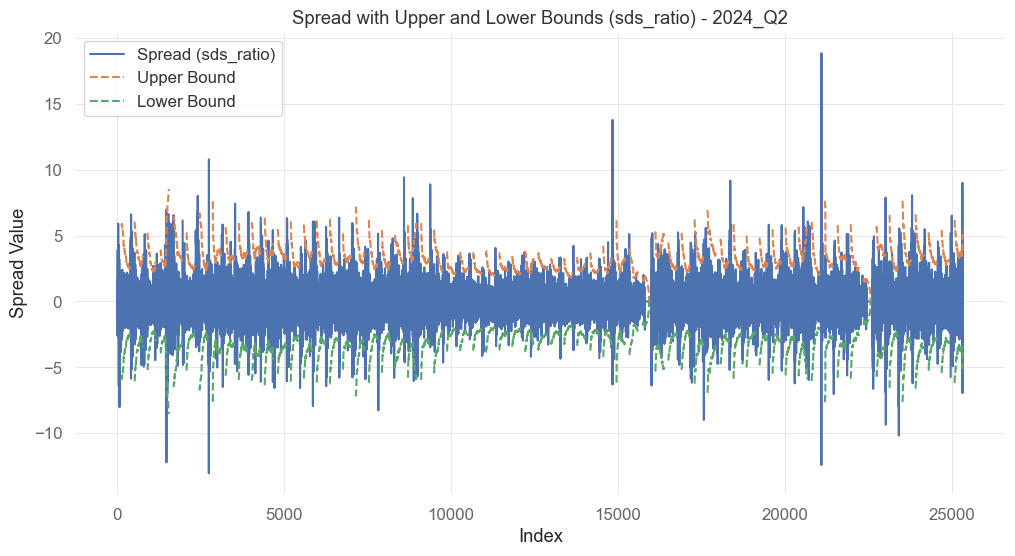

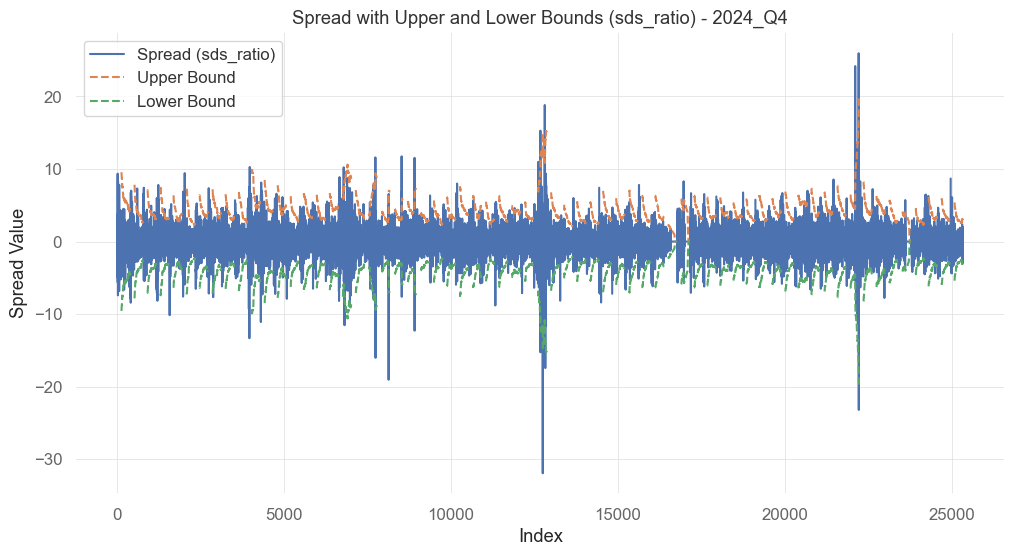

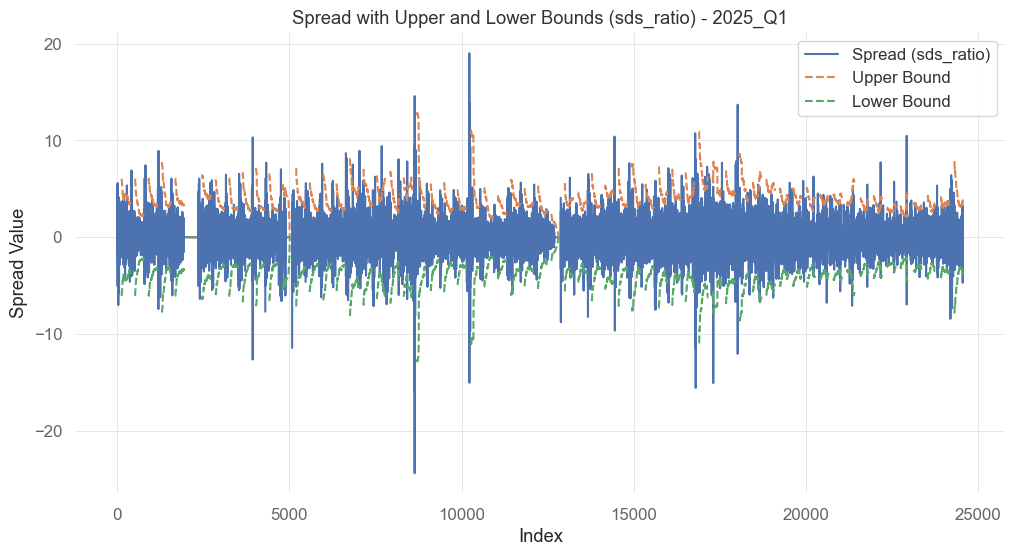

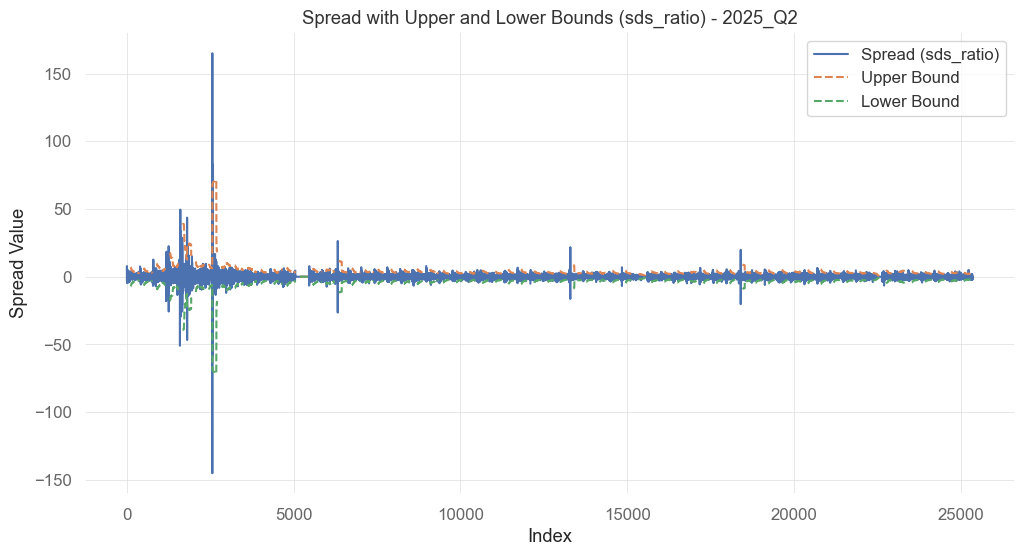

In [16]:
# applying a volatility breakout model
# sample upper and lower bounds for spreads
# for a volatility multiplier of 3
# (here we put the upper and lower band along zero)

all_data_2["upper_bound_sdsratio"] = 3 * all_data_2["std_spread_sdsratio"]
all_data_2["lower_bound_sdsratio"] = -3 * all_data_2["std_spread_sdsratio"]

# lets see how it looks like for each quarter separately
# Create separate charts for each quarter
for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter]
    
    # Reset index for plotting
    quarter_data_plot = quarter_data.reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["spread_sdsratio"],
             label="Spread (sds_ratio)")
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["upper_bound_sdsratio"],
             label="Upper Bound", linestyle='--')
    plt.plot(quarter_data_plot.index,
             quarter_data_plot["lower_bound_sdsratio"],
             label="Lower Bound", linestyle='--')
    plt.title(f"Spread with Upper and Lower Bounds (sds_ratio) - {quarter}")
    plt.xlabel("Index")
    plt.ylabel("Spread Value")
    plt.legend()
    plt.show()

In [17]:
### position will be based on relation of the spread to volatility bands

# lets assume we do not trade within the first 15-mins of the day
# and exit all positions 15 minutes before the end of quotations

# lets create a pos_flat vector and fill it with 0s

pos_flat = np.zeros(len(all_data_2))

In [18]:
# we do not trade within the first quarter (9:31-9:45)
# but also before that time since midnight

pos_flat[all_data_2.index.time <= pd.to_datetime("9:55").time()] = 1

# and last quarter of the session (15:46-16:00)
# but also after this time until midnight

pos_flat[all_data_2.index.time >= pd.to_datetime("15:40").time()] = 1

# !!! there are no weekends in our data, so we do not need
# to control for that in pos_flat

pd.Series(pos_flat).value_counts()

0.0    155097
1.0     20715
Name: count, dtype: int64

### Two Intersecting Moving Averages

av_ratio

In [ ]:
# we check various parameter combinations in a loop

def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

fastEMA_parameters = [15, 20, 30, 45, 60, 75, 90]
slowEMA_parameters = [90, 120, 150, 180, 240, 300, 360, 420]

# create a dataframe to store results
summary_all_2MAs = pd.DataFrame()

# Loop over each quarter
for quarter in quarters:
    print(f"\nProcessing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_mask = all_data_2['quarter'] == quarter
    quarter_data = all_data_2[quarter_mask].copy()
    
    # Loop over different parameter combinations
    for fastEMA in fastEMA_parameters:
        for slowEMA in slowEMA_parameters:
                    
                    # ensure that fastEMA is less than slowEMA
                    if fastEMA >= slowEMA:
                        continue

                    print(f"  fastEMA = {fastEMA}, slowEMA = {slowEMA}")

                    # We calculate the appropriate EMA
                    fastEMA_values = quarter_data['spread_avratio'].ewm(span = fastEMA).mean()
                    slowEMA_values = quarter_data['spread_avratio'].ewm(span = slowEMA).mean()

                    # Insert NaNs wherever the original price is missing
                    fastEMA_values[quarter_data['spread_avratio'].isna()] = np.nan
                    slowEMA_values[quarter_data['spread_avratio'].isna()] = np.nan 

                    # Calculate position for momentum strategy
                    cond2b_mom_long = fastEMA_values.shift(1) > slowEMA_values.shift(1)
                    
                    # let's add filters that check for the presence of NaN values
                    fastEMA_nonmiss = fastEMA_values.shift(1).notna()
                    slowEMA_nonmiss = slowEMA_values.shift(1).notna()

                    # Now we can add these conditions to our strategies
                    # if any of the values is missing,
                    # we cannot make a position decision

                    pos_mom = np.where(fastEMA_nonmiss & slowEMA_nonmiss,
                                       np.where(cond2b_mom_long, 1, -1),
                                       np.nan)
                    pos_mr = -pos_mom 

                    # Set position to 0 where pos_flat is 1
                    pos_flat_quarter = pos_flat[quarter_mask]
                    pos_mom[pos_flat_quarter == 1] = 0
                    pos_mr[pos_flat_quarter == 1] = 0
                    
                    # Calculate gross pnl
                    pnl_gross_mom = pos_mom * (quarter_data['NQ'].diff() - quarter_data['SP'].diff() * quarter_data['av_ratio'])
                    pnl_gross_mr = pos_mr * (quarter_data['NQ'].diff() - quarter_data['SP'].diff() * quarter_data['av_ratio'])
                    # point value for E6

                    # Calculate number of transactions
                    ntrans = np.abs(np.diff(pos_mom, prepend = 0))

                    # Calculate net pnl
                    pnl_net_mom = pnl_gross_mom - ntrans * (12 + quarter_data['av_ratio']*12)  # cost $10 per transaction on E6
                    pnl_net_mr = pnl_gross_mr - ntrans * (12 + quarter_data['av_ratio']*12)   # cost $10 per transaction on E6
                      
                    # Aggregate to daily data
                    pnl_gross_mom = pd.Series(pnl_gross_mom)
                    pnl_gross_mom.index = quarter_data['spread_avratio'].index.time
                    pnl_gross_mom_d = pnl_gross_mom.groupby(quarter_data['spread_avratio'].index.date).sum()
                    pnl_gross_mr = pd.Series(pnl_gross_mr)
                    pnl_gross_mr.index = quarter_data['spread_avratio'].index.time
                    pnl_gross_mr_d = pnl_gross_mr.groupby(quarter_data['spread_avratio'].index.date).sum()

                    pnl_net_mom = pd.Series(pnl_net_mom)
                    pnl_net_mom.index = quarter_data['spread_avratio'].index.time
                    pnl_net_mom_d = pnl_net_mom.groupby(quarter_data['spread_avratio'].index.date).sum()
                    pnl_net_mr = pd.Series(pnl_net_mr)
                    pnl_net_mr.index = quarter_data['spread_avratio'].index.time
                    pnl_net_mr_d = pnl_net_mr.groupby(quarter_data['spread_avratio'].index.date).sum()

                    ntrans = pd.Series(ntrans)
                    ntrans.index = quarter_data['spread_avratio'].index.time
                    ntrans_d = ntrans.groupby(quarter_data['spread_avratio'].index.date).sum()

                    # Calculate Sharpe Ratio and PnL
                    gross_SR_mom = mySR(pnl_gross_mom_d, scale=252)
                    net_SR_mom = mySR(pnl_net_mom_d, scale=252)
                    gross_PnL_mom = pnl_gross_mom_d.sum()
                    net_PnL_mom = pnl_net_mom_d.sum()
                    gross_SR_mr = mySR(pnl_gross_mr_d, scale=252)
                    net_SR_mr = mySR(pnl_net_mr_d, scale=252)
                    gross_PnL_mr = pnl_gross_mr_d.sum()
                    net_PnL_mr = pnl_net_mr_d.sum()

                    av_daily_ntrans = ntrans_d.mean()

                    # Collect necessary results into one object
                    summary = pd.DataFrame({
                        'fastEMA': fastEMA,
                        'slowEMA': slowEMA,
                        'quarter': quarter,
                        'gross_SR_mom': gross_SR_mom,
                        'net_SR_mom': net_SR_mom,
                        'gross_PnL_mom': gross_PnL_mom,
                        'net_PnL_mom': net_PnL_mom,
                        'gross_SR_mr': gross_SR_mr,
                        'net_SR_mr': net_SR_mr,
                        'gross_PnL_mr': gross_PnL_mr,
                        'net_PnL_mr': net_PnL_mr,
                        'av_daily_ntrans': av_daily_ntrans
                    }, index=[0])

                    # Append results to the summary
                    summary_all_2MAs = pd.concat([summary_all_2MAs, summary], ignore_index=True)


Processing quarter: 2023_Q1
  fastEMA = 15, slowEMA = 90
  fastEMA = 15, slowEMA = 120
  fastEMA = 15, slowEMA = 150
  fastEMA = 15, slowEMA = 180
  fastEMA = 15, slowEMA = 240
  fastEMA = 15, slowEMA = 300
  fastEMA = 15, slowEMA = 360
  fastEMA = 15, slowEMA = 420
  fastEMA = 20, slowEMA = 90
  fastEMA = 20, slowEMA = 120
  fastEMA = 20, slowEMA = 150
  fastEMA = 20, slowEMA = 180
  fastEMA = 20, slowEMA = 240
  fastEMA = 20, slowEMA = 300
  fastEMA = 20, slowEMA = 360
  fastEMA = 20, slowEMA = 420
  fastEMA = 30, slowEMA = 90
  fastEMA = 30, slowEMA = 120
  fastEMA = 30, slowEMA = 150
  fastEMA = 30, slowEMA = 180
  fastEMA = 30, slowEMA = 240
  fastEMA = 30, slowEMA = 300
  fastEMA = 30, slowEMA = 360
  fastEMA = 30, slowEMA = 420
  fastEMA = 45, slowEMA = 90
  fastEMA = 45, slowEMA = 120
  fastEMA = 45, slowEMA = 150
  fastEMA = 45, slowEMA = 180
  fastEMA = 45, slowEMA = 240
  fastEMA = 45, slowEMA = 300
  fastEMA = 45, slowEMA = 360
  fastEMA = 45, slowEMA = 420
  fastEMA = 60,

In [20]:
# lets see top 5 stategies with respect to net_SR_mr
summary_all_2MAs.sort_values(by = 'net_SR_mr',
                            ascending = False).head(5)

fastEMA  slowEMA  quarter  gross_SR_mom  net_SR_mom  gross_PnL_mom  \
116       15      360  2023_Q4     -0.370036  -15.048778     -67.303456   
117       15      420  2023_Q4     -0.135989  -14.903805     -24.296342   
125       20      420  2023_Q4      0.341610  -14.797613      59.681700   
62        15      420  2023_Q3     -4.632394  -16.697866   -1403.228475   
172       15      420  2024_Q2      2.465656  -14.386763     475.726280   

      net_PnL_mom  gross_SR_mr  net_SR_mr  gross_PnL_mr    net_PnL_mr  \
116 -22599.856536     0.370036 -18.115932     67.303456 -22465.249623   
117 -20403.514069     0.135989 -18.137036     24.296342 -20354.921385   
125 -18490.220921    -0.341610 -18.270520    -59.681700 -18609.584322   
62  -23527.093305     4.632394 -18.545288   1403.228475 -20725.175710   
172 -17017.929858    -2.465656 -18.931845   -475.726280 -17969.382418   

     av_daily_ntrans  
116         6.531250  
117         5.906250  
125         5.375000  
62          6.446154  
172         4.953846

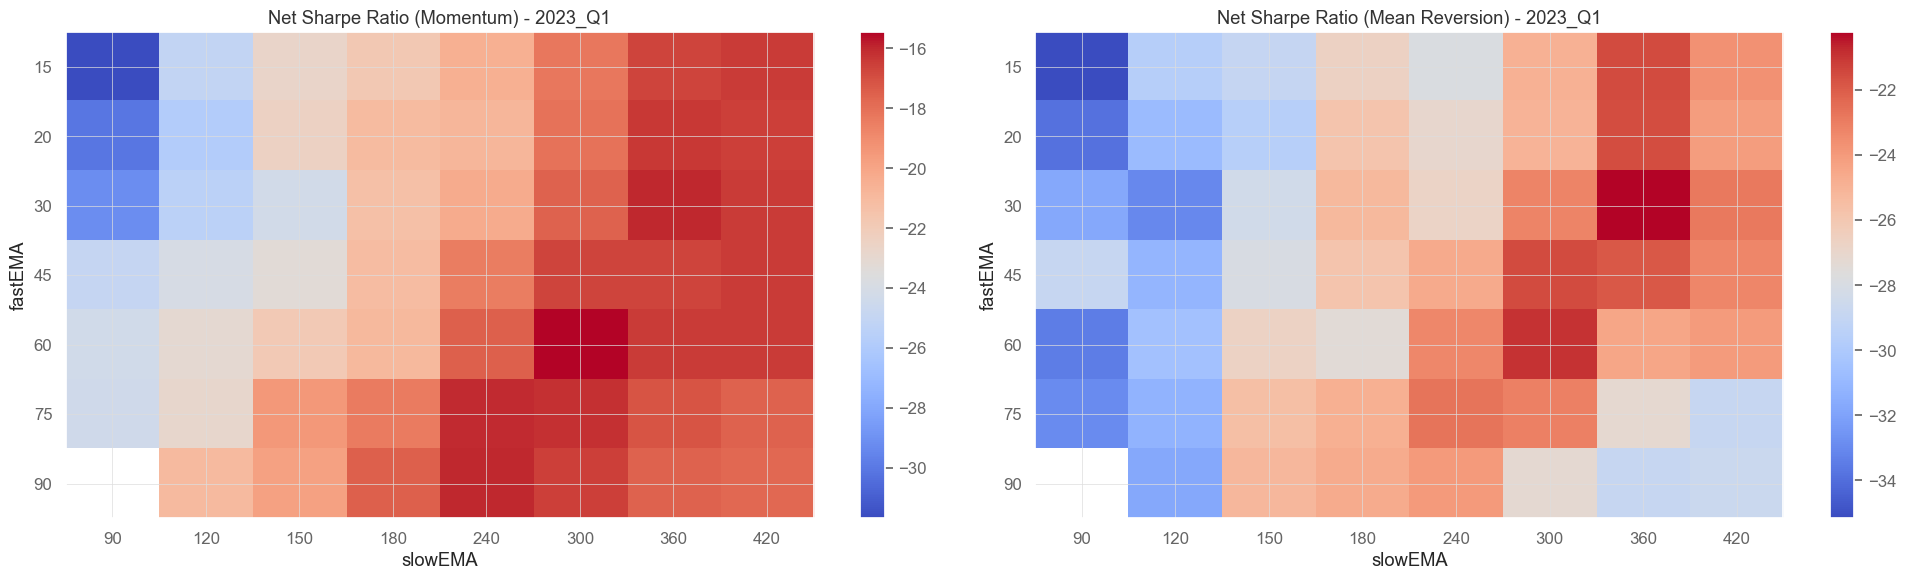

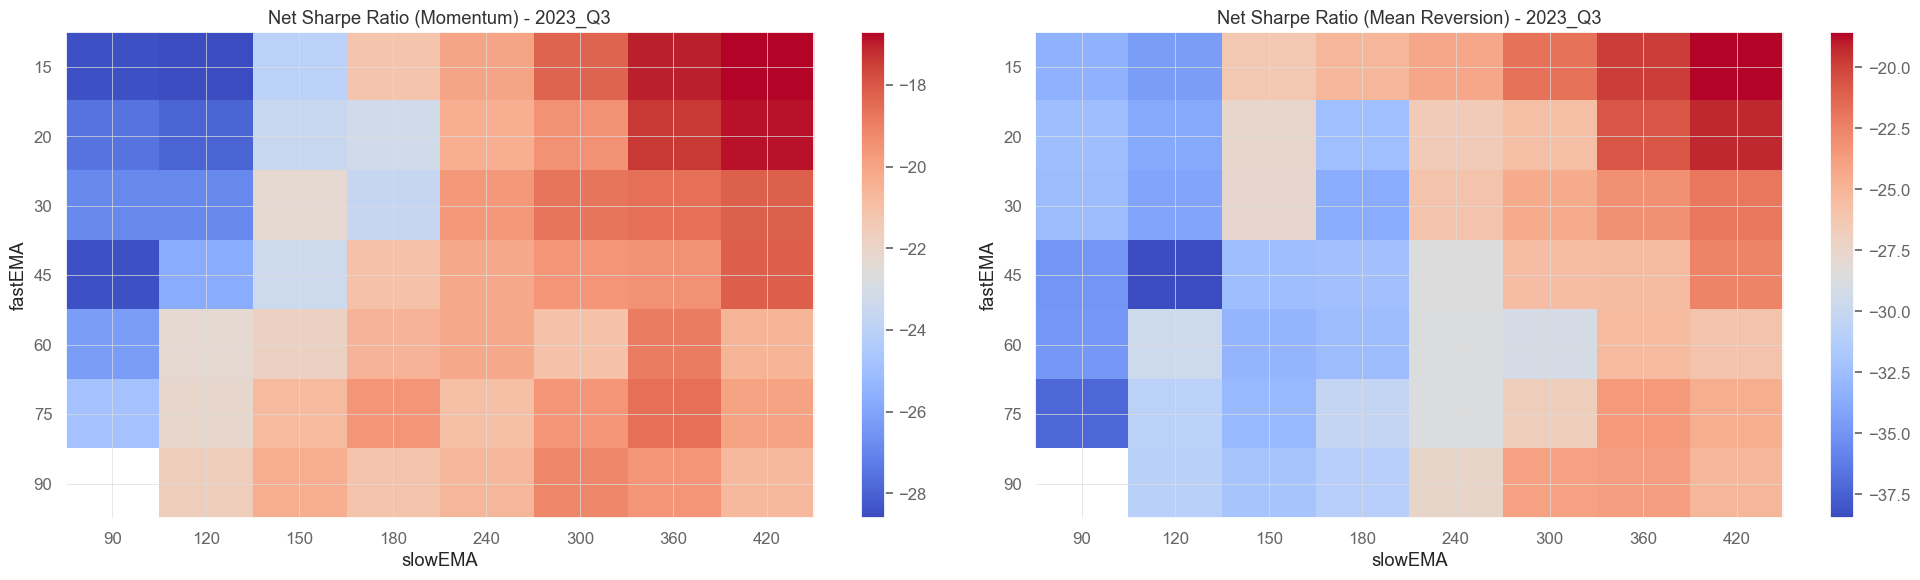

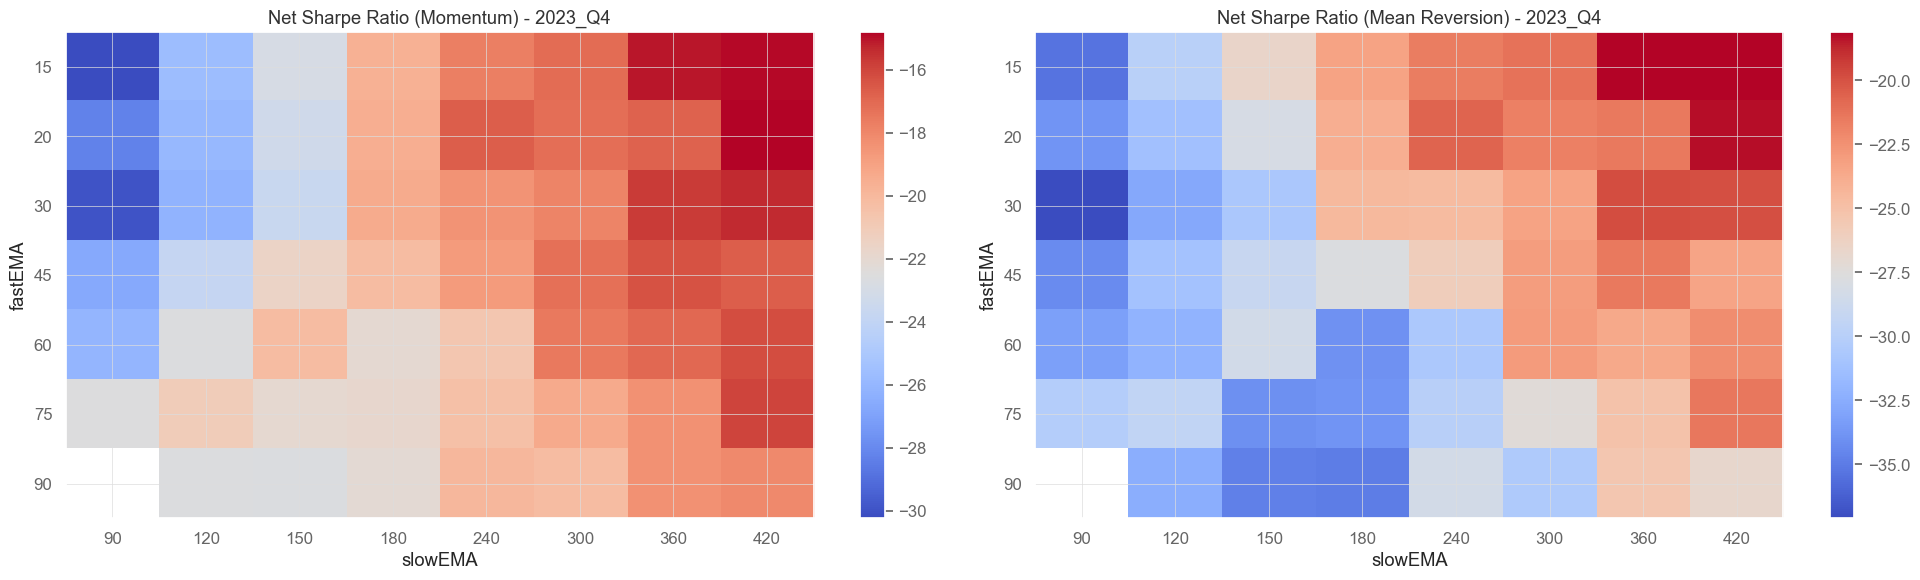

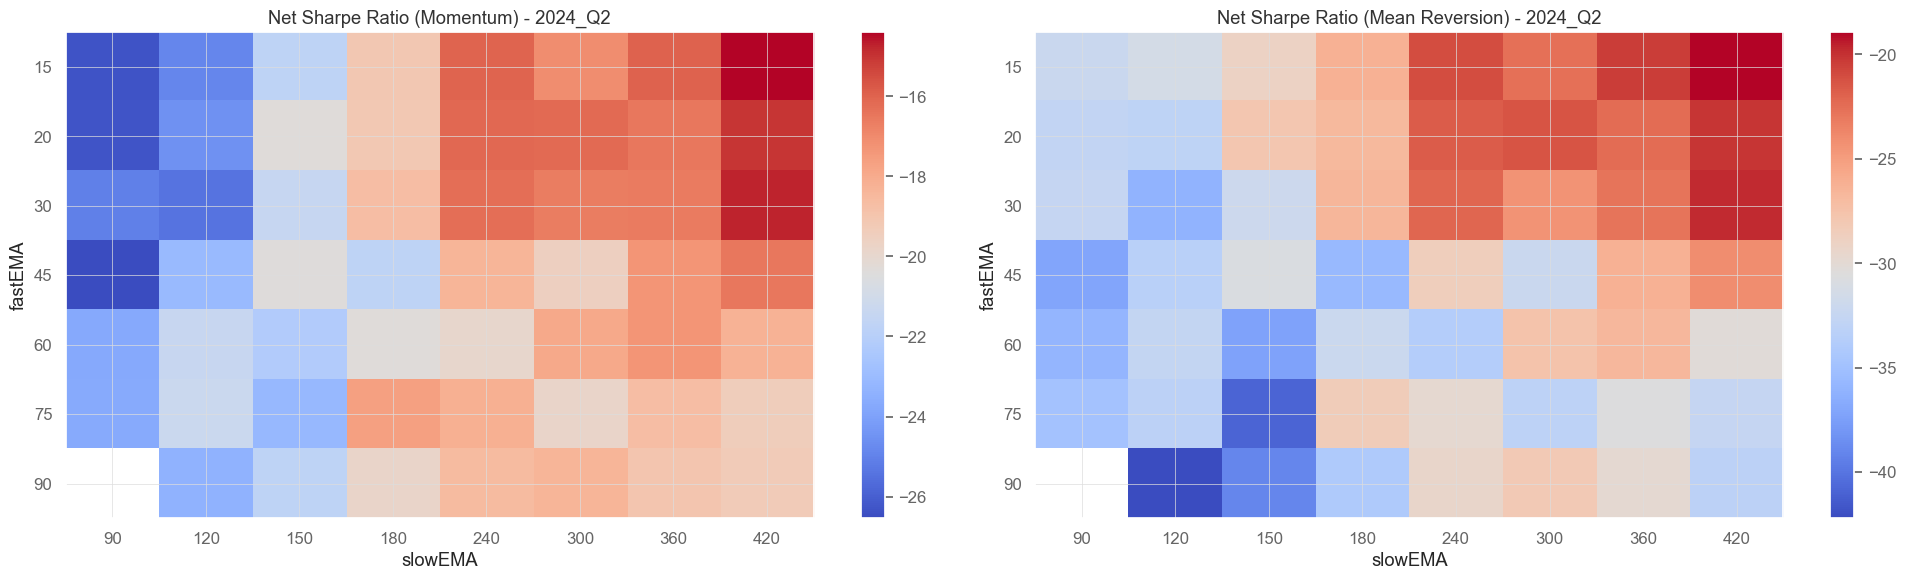

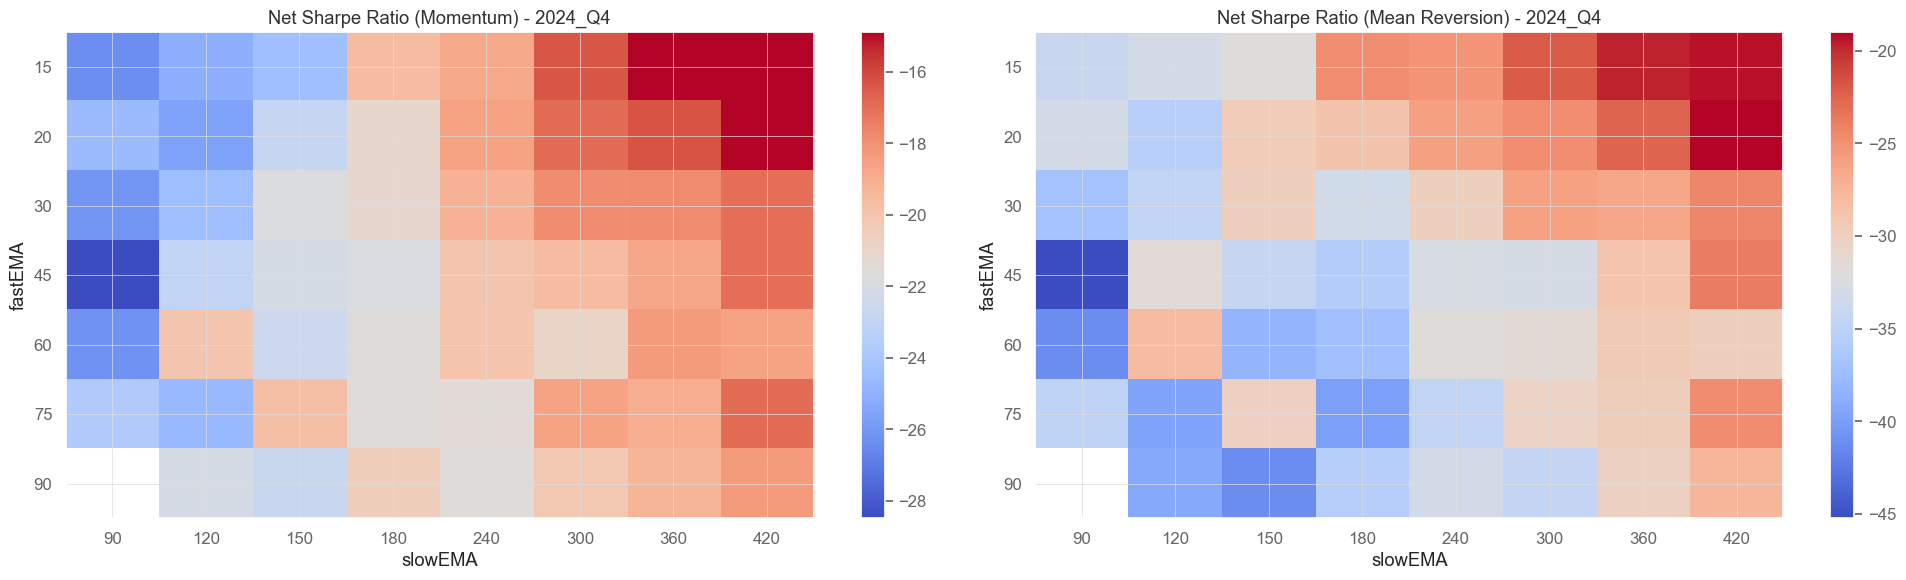

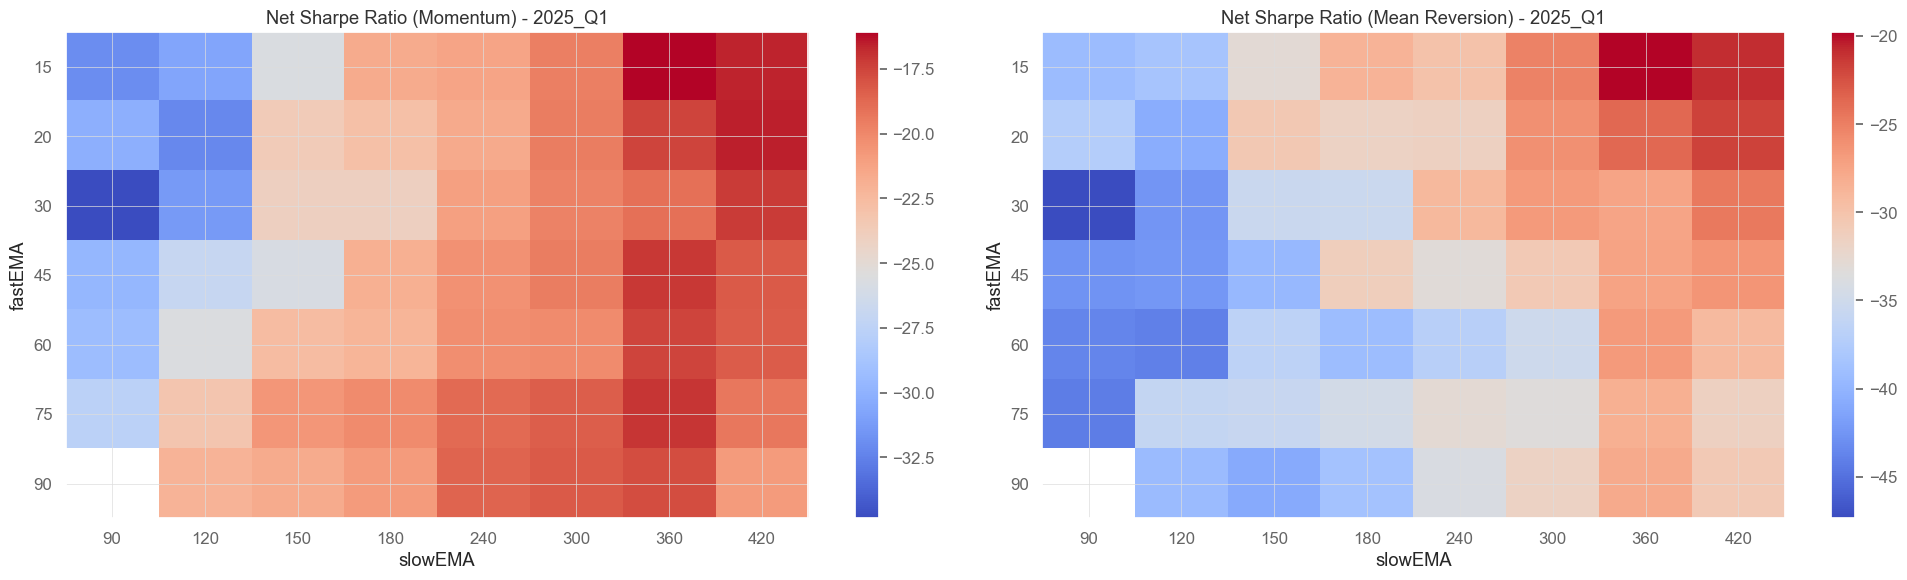

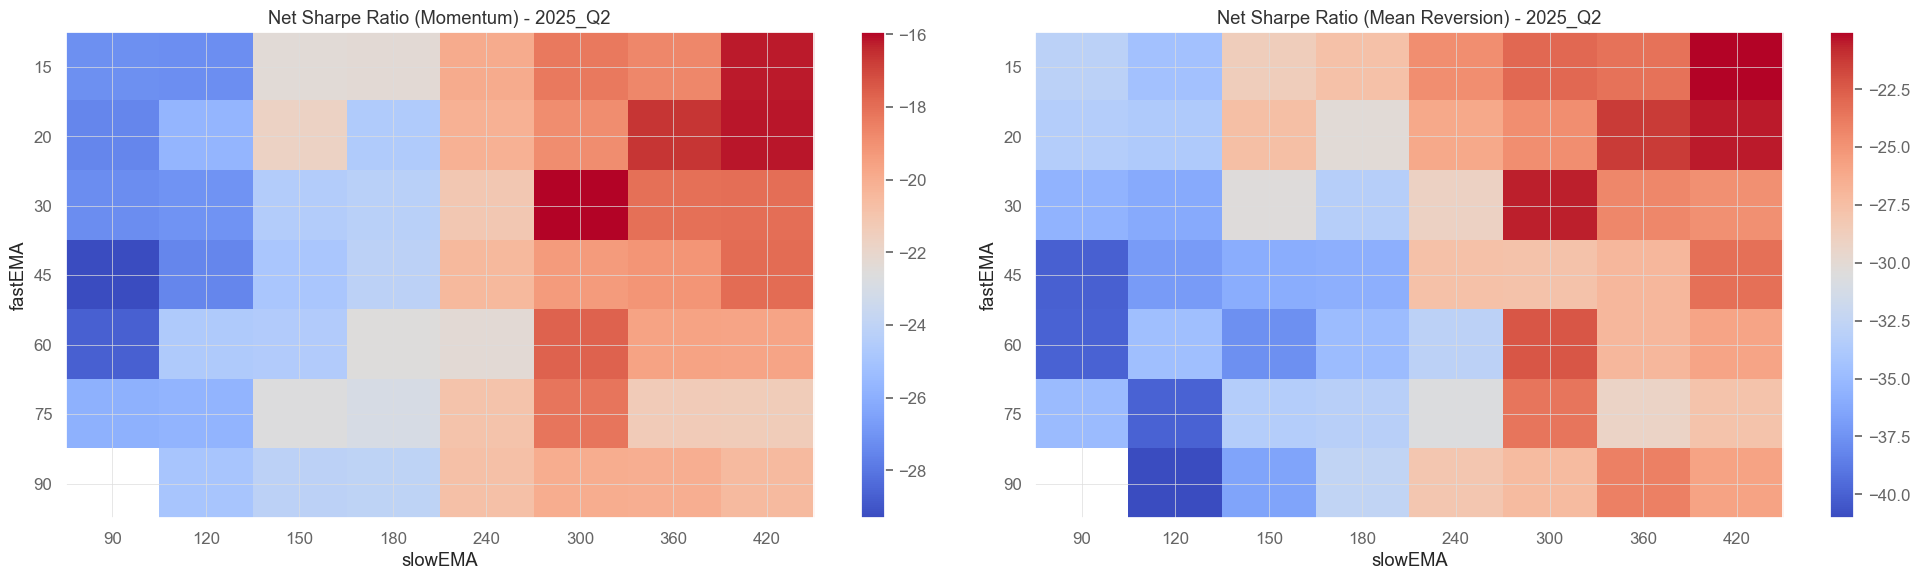

In [21]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_2MAs[summary_all_2MAs['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_SR_mom')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('slowEMA')
    axes[0].set_ylabel('fastEMA')
    axes[0].set_title(f'Net Sharpe Ratio (Momentum) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_SR_mr')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[1].set_xlabel('slowEMA')
    axes[1].set_ylabel('fastEMA')
    axes[1].set_title(f'Net Sharpe Ratio (Mean Reversion) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

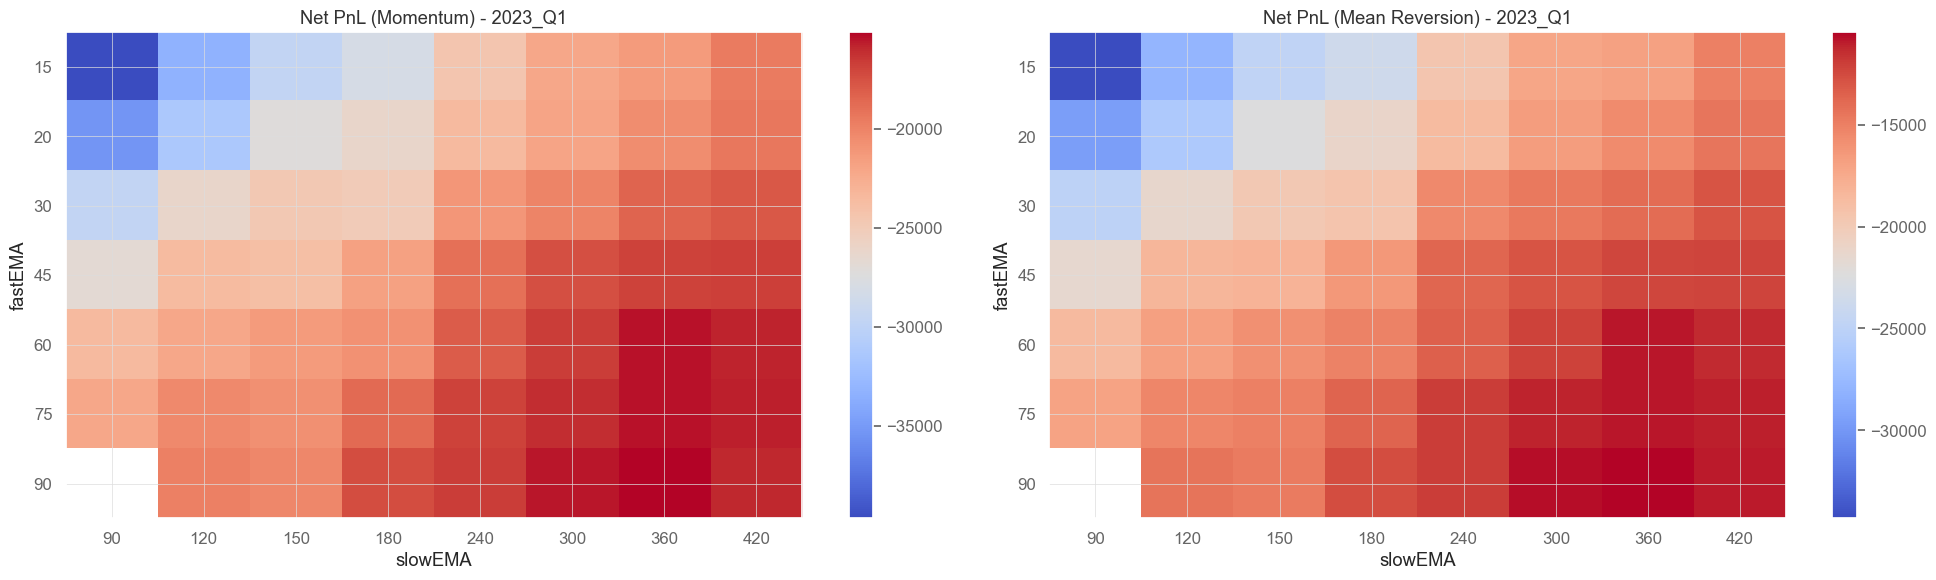

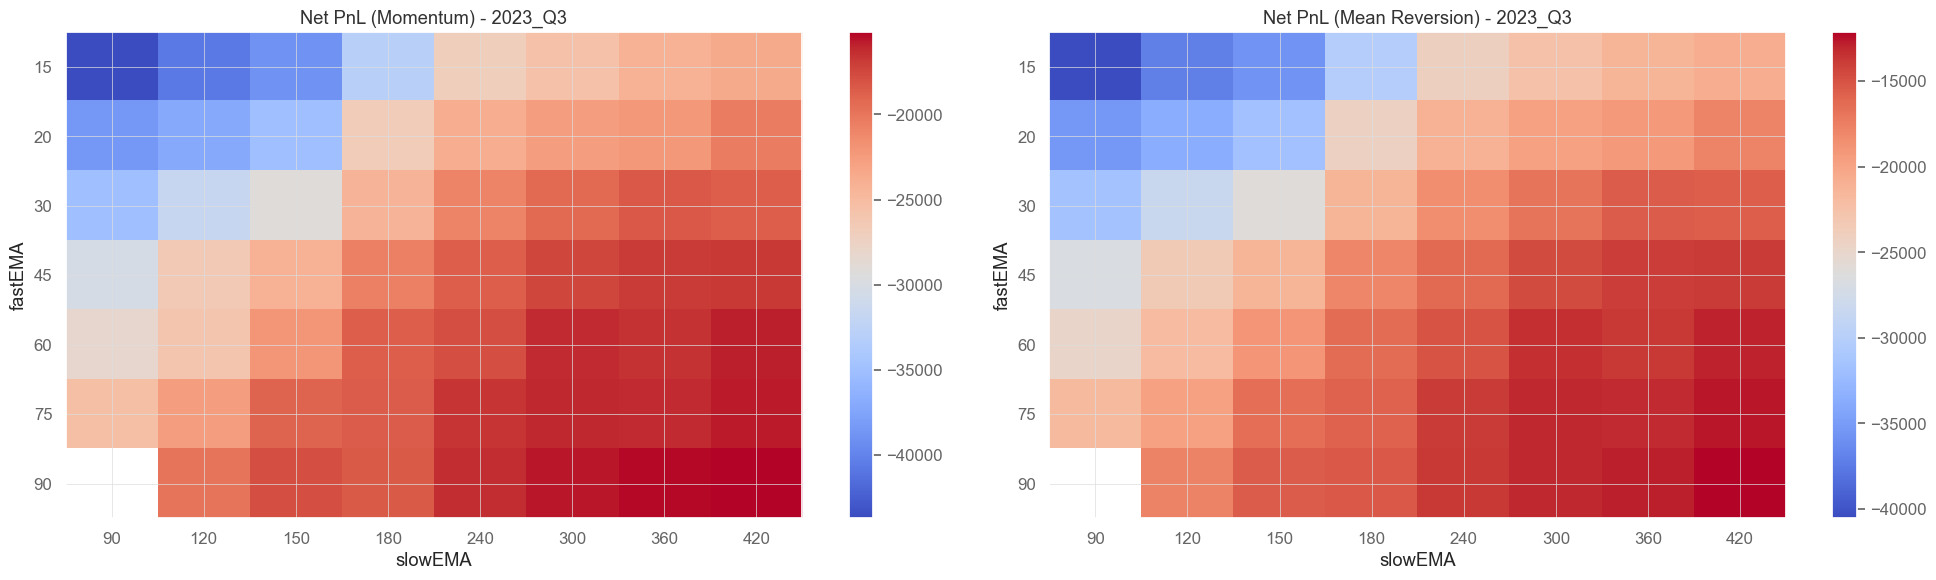

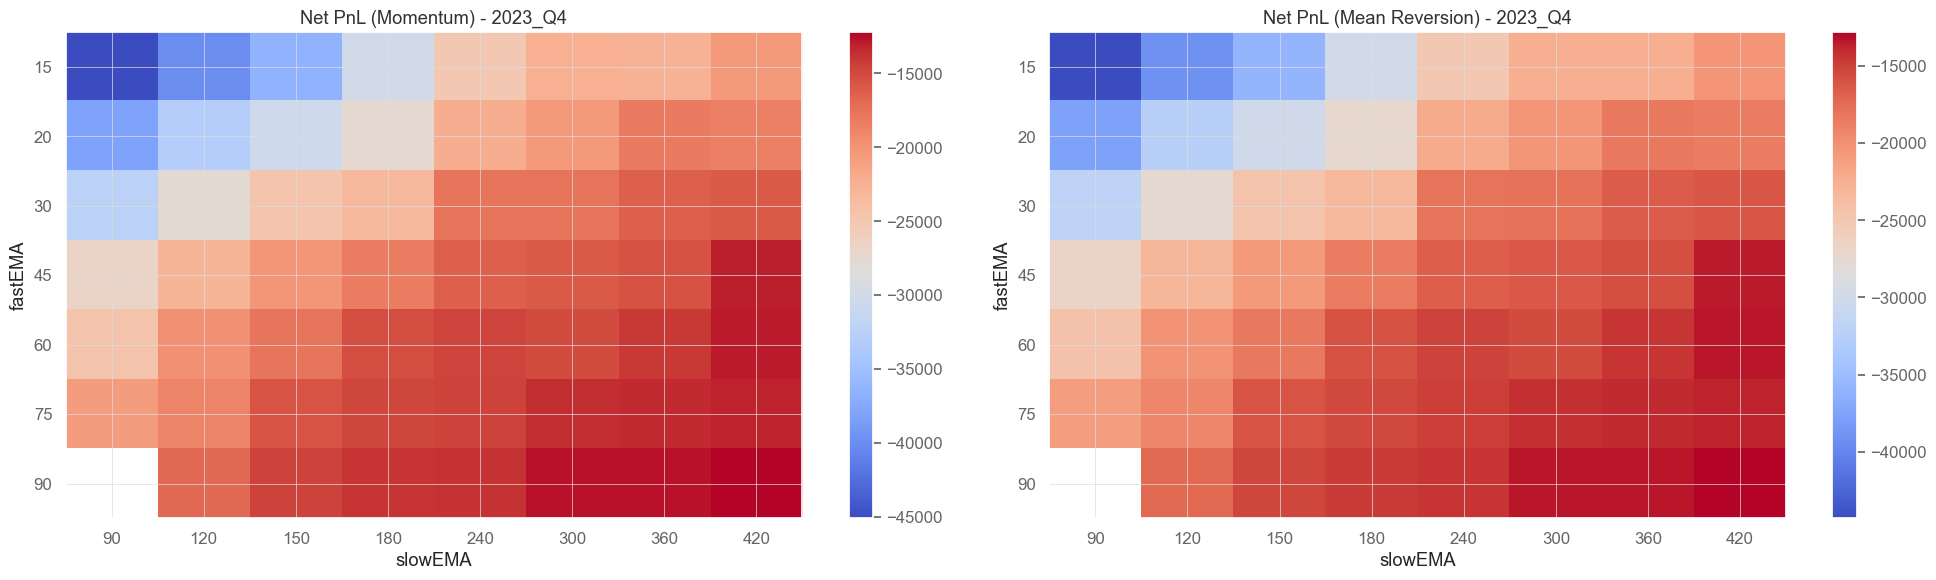

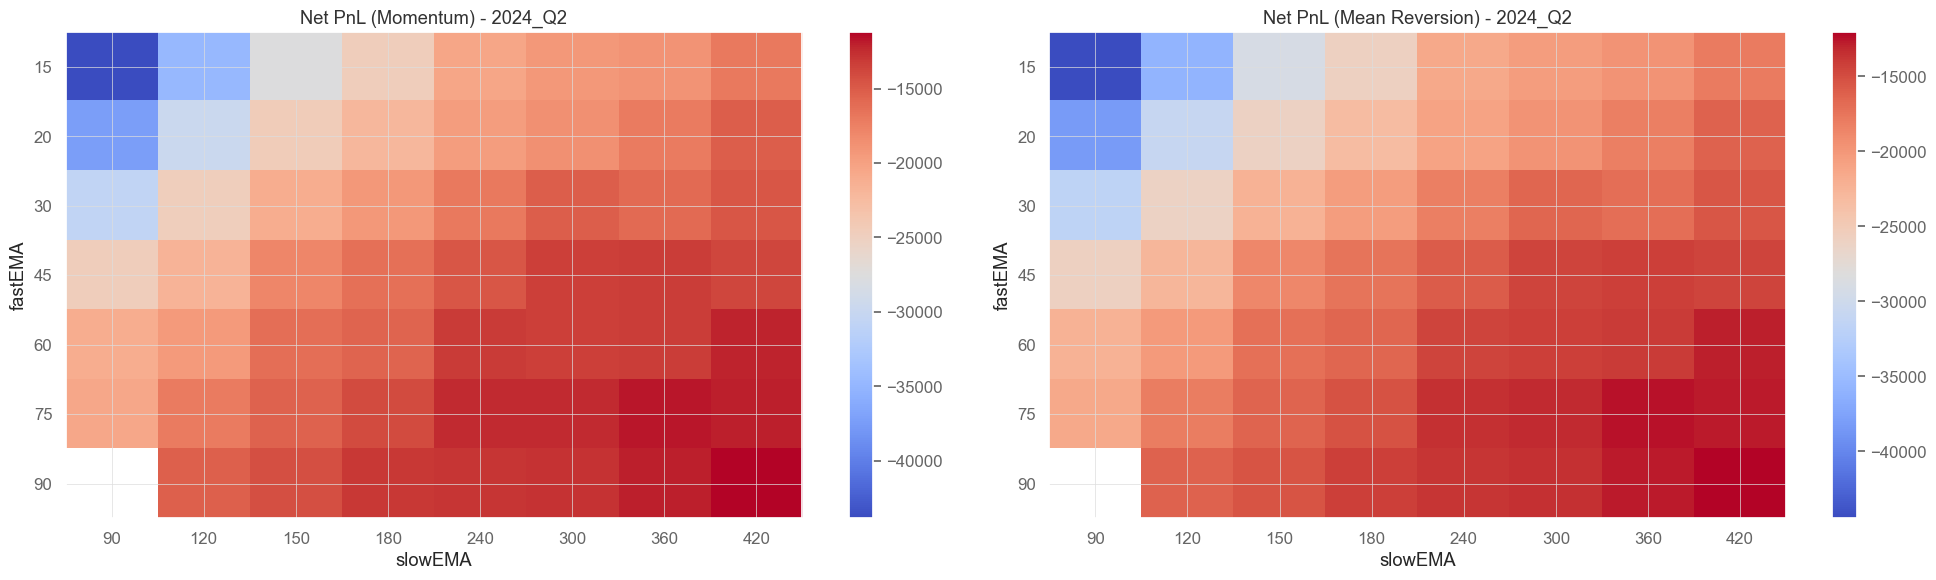

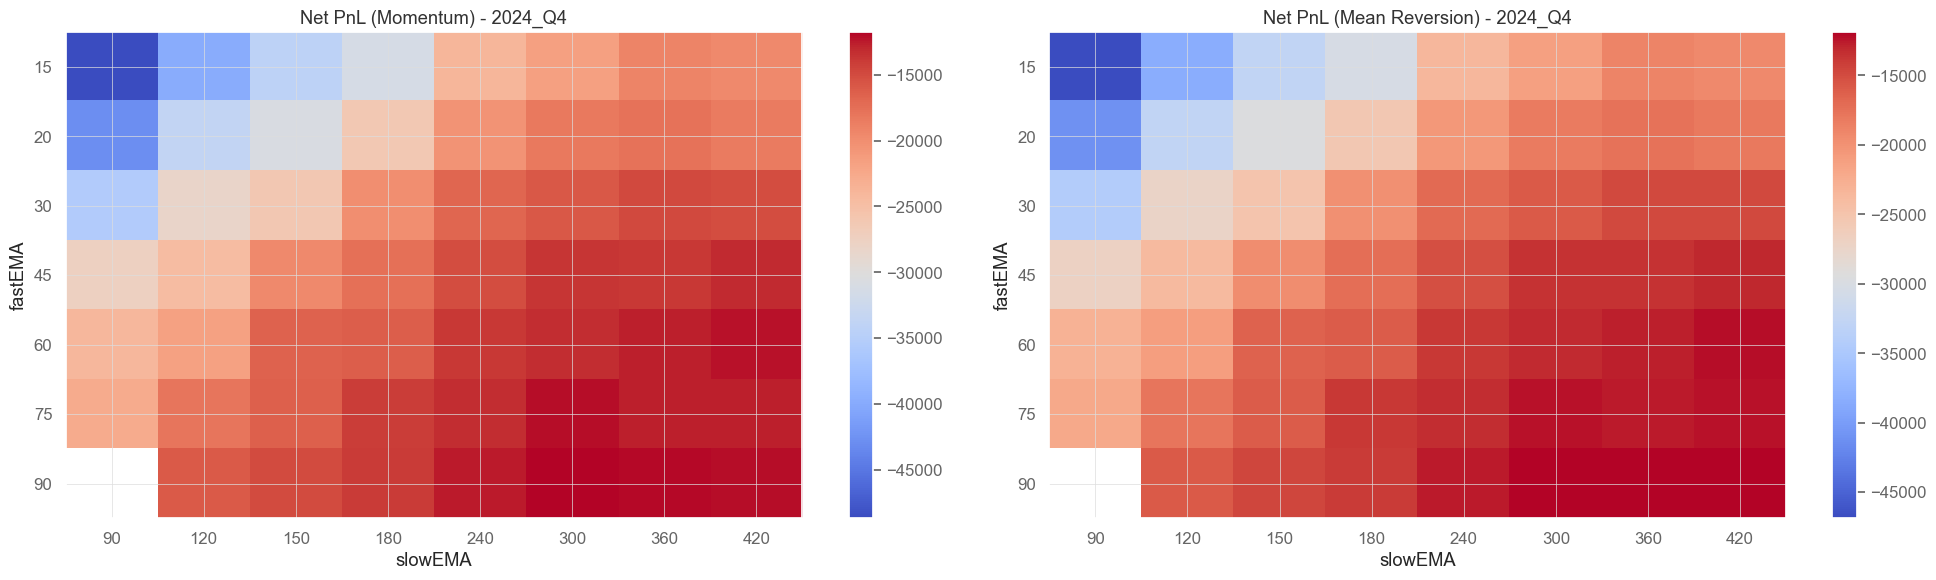

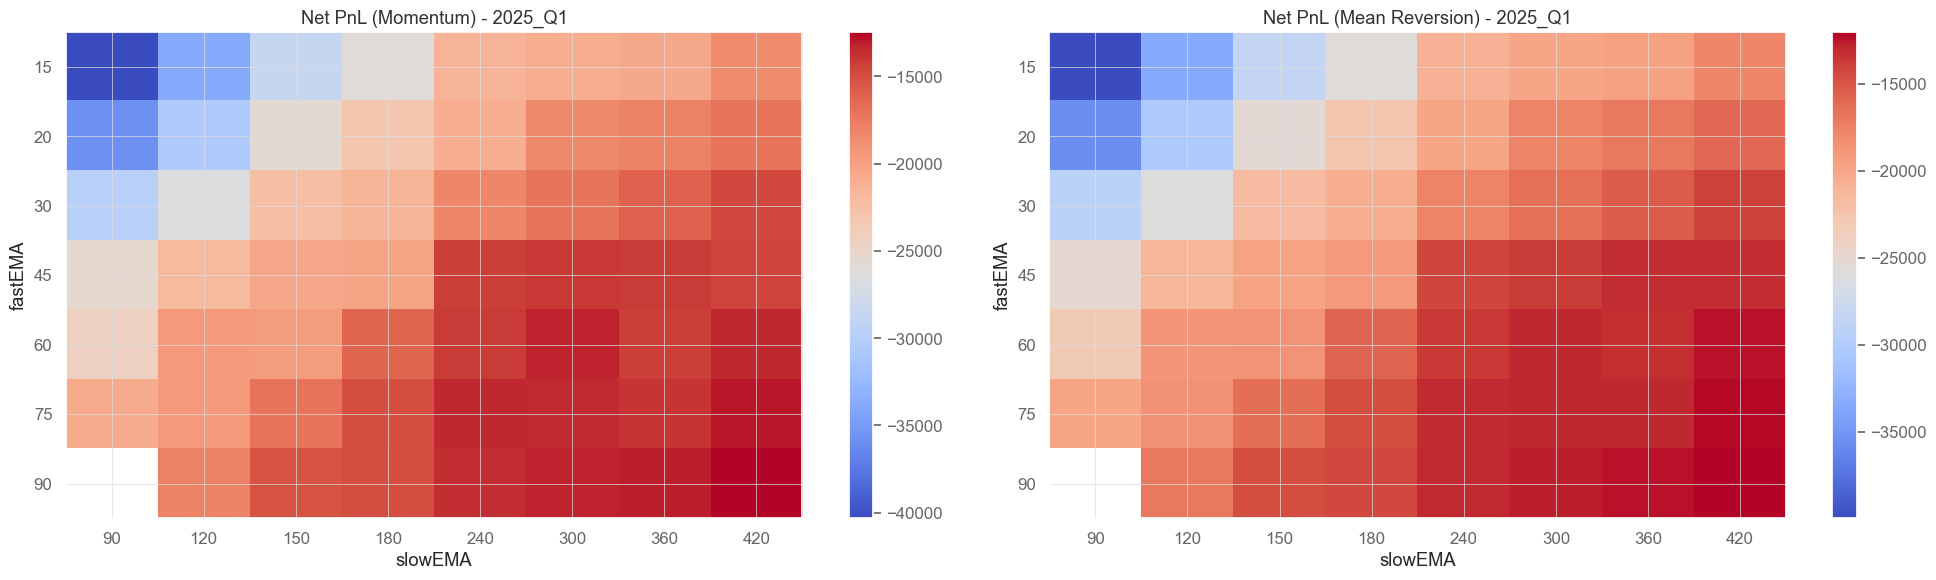

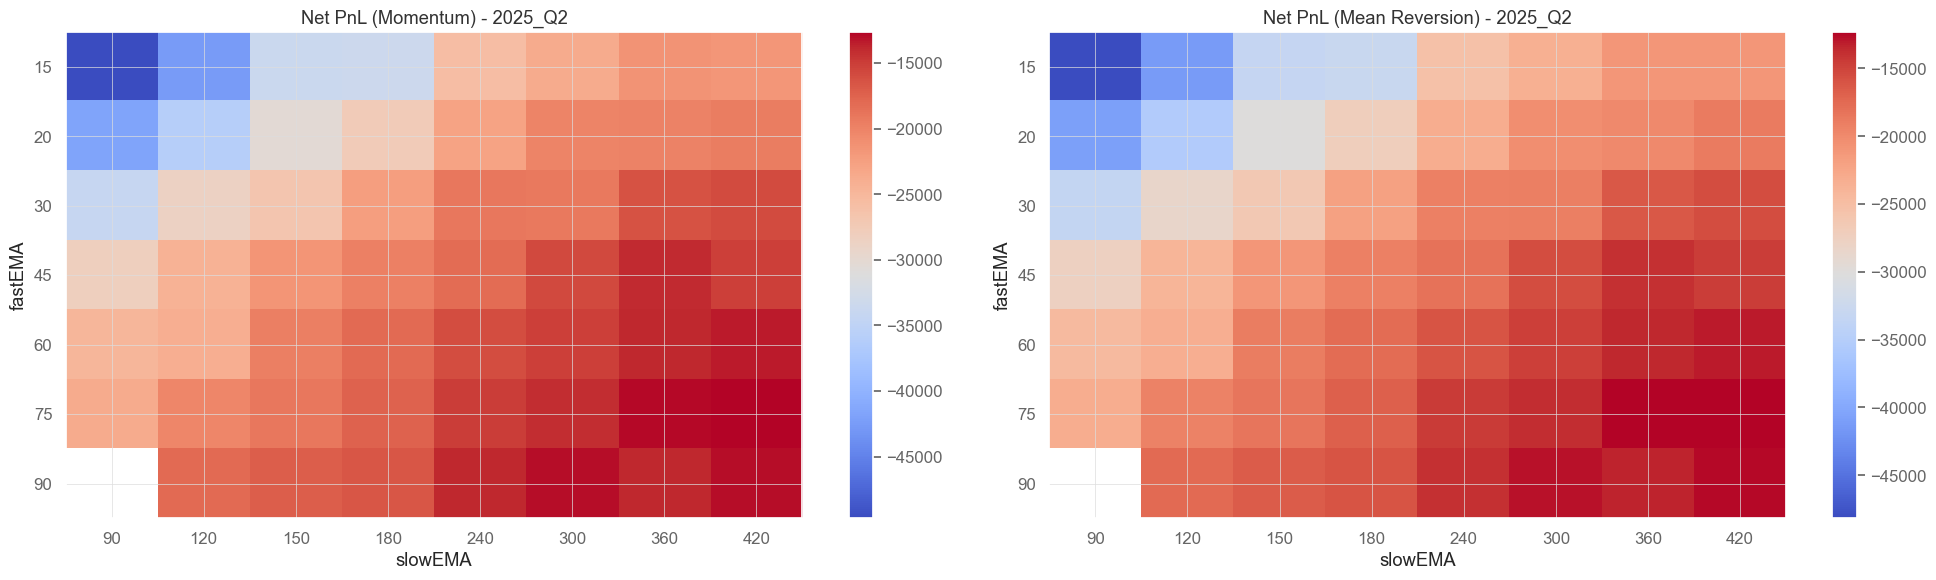

In [22]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_2MAs[summary_all_2MAs['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_PnL_mom')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('slowEMA')
    axes[0].set_ylabel('fastEMA')
    axes[0].set_title(f'Net PnL (Momentum) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_PnL_mr')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[1].set_xlabel('slowEMA')
    axes[1].set_ylabel('fastEMA')
    axes[1].set_title(f'Net PnL (Mean Reversion) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

sds_ratio

In [23]:
# we check various parameter combinations in a loop

def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

fastEMA_parameters = [15, 20, 30, 45, 60, 75, 90]
slowEMA_parameters = [90, 120, 150, 180, 240, 300, 360, 420]

# create a dataframe to store results
summary_all_2MAs = pd.DataFrame()

# Loop over each quarter
for quarter in quarters:
    print(f"\nProcessing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_mask = all_data_2['quarter'] == quarter
    quarter_data = all_data_2[quarter_mask].copy()
    
    # Loop over different parameter combinations
    for fastEMA in fastEMA_parameters:
        for slowEMA in slowEMA_parameters:
                    
                    # ensure that fastEMA is less than slowEMA
                    if fastEMA >= slowEMA:
                        continue

                    print(f"  fastEMA = {fastEMA}, slowEMA = {slowEMA}")

                    # We calculate the appropriate EMA
                    fastEMA_values = quarter_data['spread_sdsratio'].ewm(span = fastEMA).mean()
                    slowEMA_values = quarter_data['spread_sdsratio'].ewm(span = slowEMA).mean()

                    # Insert NaNs wherever the original price is missing
                    fastEMA_values[quarter_data['spread_sdsratio'].isna()] = np.nan
                    slowEMA_values[quarter_data['spread_sdsratio'].isna()] = np.nan 

                    # Calculate position for momentum strategy
                    cond2b_mom_long = fastEMA_values.shift(1) > slowEMA_values.shift(1)
                    
                    # let's add filters that check for the presence of NaN values
                    fastEMA_nonmiss = fastEMA_values.shift(1).notna()
                    slowEMA_nonmiss = slowEMA_values.shift(1).notna()

                    # Now we can add these conditions to our strategies
                    # if any of the values is missing,
                    # we cannot make a position decision

                    pos_mom = np.where(fastEMA_nonmiss & slowEMA_nonmiss,
                                       np.where(cond2b_mom_long, 1, -1),
                                       np.nan)
                    pos_mr = -pos_mom 

                    # Set position to 0 where pos_flat is 1
                    pos_flat_quarter = pos_flat[quarter_mask]
                    pos_mom[pos_flat_quarter == 1] = 0
                    pos_mr[pos_flat_quarter == 1] = 0
                    
                    # Calculate gross pnl
                    pnl_gross_mom = pos_mom * (quarter_data['NQ'].diff() - quarter_data['SP'].diff() * quarter_data['sds_ratio'])
                    pnl_gross_mr = pos_mr * (quarter_data['NQ'].diff() - quarter_data['SP'].diff() * quarter_data['sds_ratio'])
                    # point value for E6

                    # Calculate number of transactions
                    ntrans = np.abs(np.diff(pos_mom, prepend = 0))

                    # Calculate net pnl
                    pnl_net_mom = pnl_gross_mom - ntrans * (12 + quarter_data['sds_ratio']*12)  # cost $10 per transaction on E6
                    pnl_net_mr = pnl_gross_mr - ntrans * (12 + quarter_data['sds_ratio']*12)   # cost $10 per transaction on E6
                      
                    # Aggregate to daily data
                    pnl_gross_mom = pd.Series(pnl_gross_mom)
                    pnl_gross_mom.index = quarter_data['spread_sdsratio'].index.time
                    pnl_gross_mom_d = pnl_gross_mom.groupby(quarter_data['spread_sdsratio'].index.date).sum()
                    pnl_gross_mr = pd.Series(pnl_gross_mr)
                    pnl_gross_mr.index = quarter_data['spread_sdsratio'].index.time
                    pnl_gross_mr_d = pnl_gross_mr.groupby(quarter_data['spread_sdsratio'].index.date).sum()

                    pnl_net_mom = pd.Series(pnl_net_mom)
                    pnl_net_mom.index = quarter_data['spread_sdsratio'].index.time
                    pnl_net_mom_d = pnl_net_mom.groupby(quarter_data['spread_sdsratio'].index.date).sum()
                    pnl_net_mr = pd.Series(pnl_net_mr)
                    pnl_net_mr.index = quarter_data['spread_sdsratio'].index.time
                    pnl_net_mr_d = pnl_net_mr.groupby(quarter_data['spread_sdsratio'].index.date).sum()

                    ntrans = pd.Series(ntrans)
                    ntrans.index = quarter_data['spread_sdsratio'].index.time
                    ntrans_d = ntrans.groupby(quarter_data['spread_sdsratio'].index.date).sum()

                    # Calculate Sharpe Ratio and PnL
                    gross_SR_mom = mySR(pnl_gross_mom_d, scale=252)
                    net_SR_mom = mySR(pnl_net_mom_d, scale=252)
                    gross_PnL_mom = pnl_gross_mom_d.sum()
                    net_PnL_mom = pnl_net_mom_d.sum()
                    gross_SR_mr = mySR(pnl_gross_mr_d, scale=252)
                    net_SR_mr = mySR(pnl_net_mr_d, scale=252)
                    gross_PnL_mr = pnl_gross_mr_d.sum()
                    net_PnL_mr = pnl_net_mr_d.sum()

                    av_daily_ntrans = ntrans_d.mean()

                    # Collect necessary results into one object
                    summary = pd.DataFrame({
                        'fastEMA': fastEMA,
                        'slowEMA': slowEMA,
                        'quarter': quarter,
                        'gross_SR_mom': gross_SR_mom,
                        'net_SR_mom': net_SR_mom,
                        'gross_PnL_mom': gross_PnL_mom,
                        'net_PnL_mom': net_PnL_mom,
                        'gross_SR_mr': gross_SR_mr,
                        'net_SR_mr': net_SR_mr,
                        'gross_PnL_mr': gross_PnL_mr,
                        'net_PnL_mr': net_PnL_mr,
                        'av_daily_ntrans': av_daily_ntrans
                    }, index=[0])

                    # Append results to the summary
                    summary_all_2MAs = pd.concat([summary_all_2MAs, summary], ignore_index=True)


Processing quarter: 2023_Q1
  fastEMA = 15, slowEMA = 90
  fastEMA = 15, slowEMA = 120
  fastEMA = 15, slowEMA = 150
  fastEMA = 15, slowEMA = 180
  fastEMA = 15, slowEMA = 240
  fastEMA = 15, slowEMA = 300
  fastEMA = 15, slowEMA = 360
  fastEMA = 15, slowEMA = 420
  fastEMA = 20, slowEMA = 90
  fastEMA = 20, slowEMA = 120
  fastEMA = 20, slowEMA = 150
  fastEMA = 20, slowEMA = 180
  fastEMA = 20, slowEMA = 240
  fastEMA = 20, slowEMA = 300
  fastEMA = 20, slowEMA = 360
  fastEMA = 20, slowEMA = 420
  fastEMA = 30, slowEMA = 90
  fastEMA = 30, slowEMA = 120
  fastEMA = 30, slowEMA = 150
  fastEMA = 30, slowEMA = 180
  fastEMA = 30, slowEMA = 240
  fastEMA = 30, slowEMA = 300
  fastEMA = 30, slowEMA = 360
  fastEMA = 30, slowEMA = 420
  fastEMA = 45, slowEMA = 90
  fastEMA = 45, slowEMA = 120
  fastEMA = 45, slowEMA = 150
  fastEMA = 45, slowEMA = 180
  fastEMA = 45, slowEMA = 240
  fastEMA = 45, slowEMA = 300
  fastEMA = 45, slowEMA = 360
  fastEMA = 45, slowEMA = 420
  fastEMA = 60,

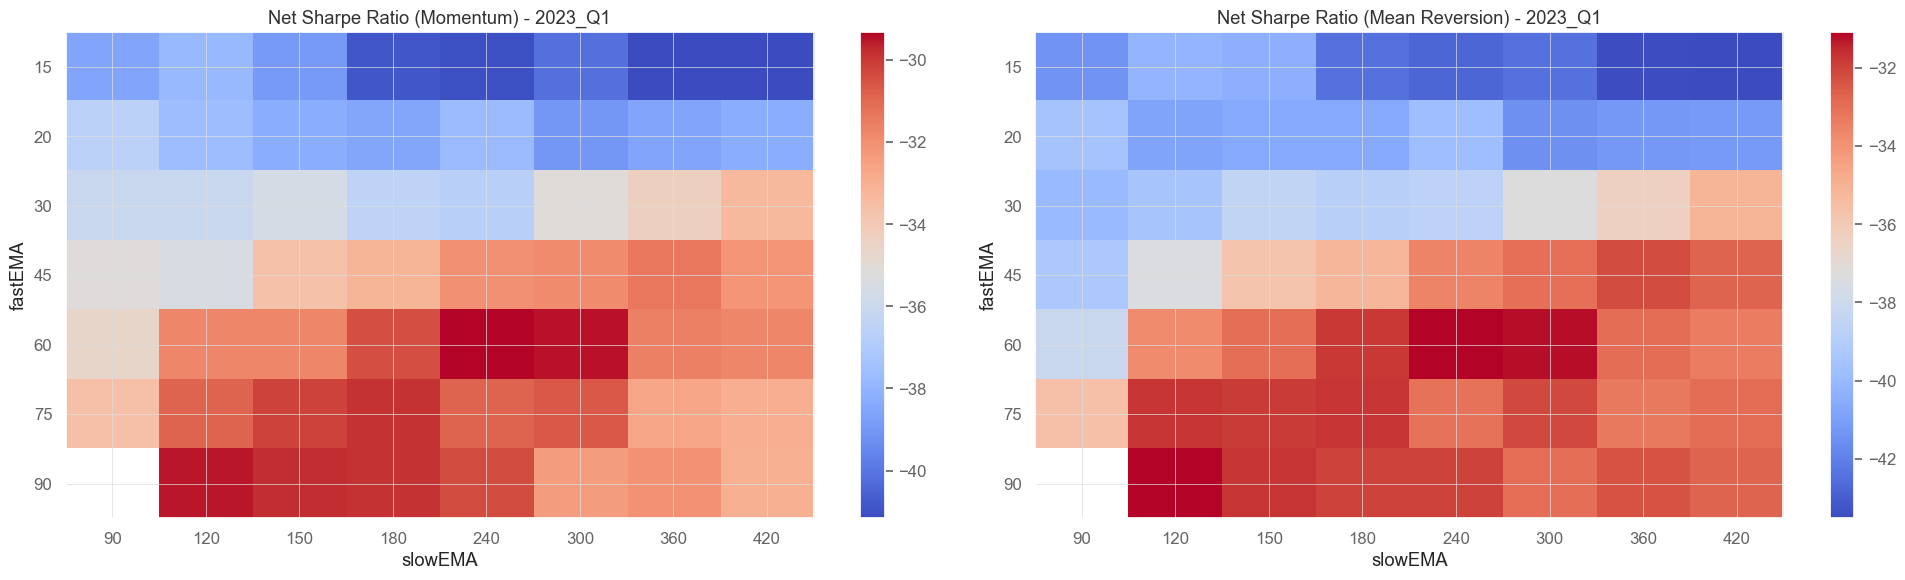

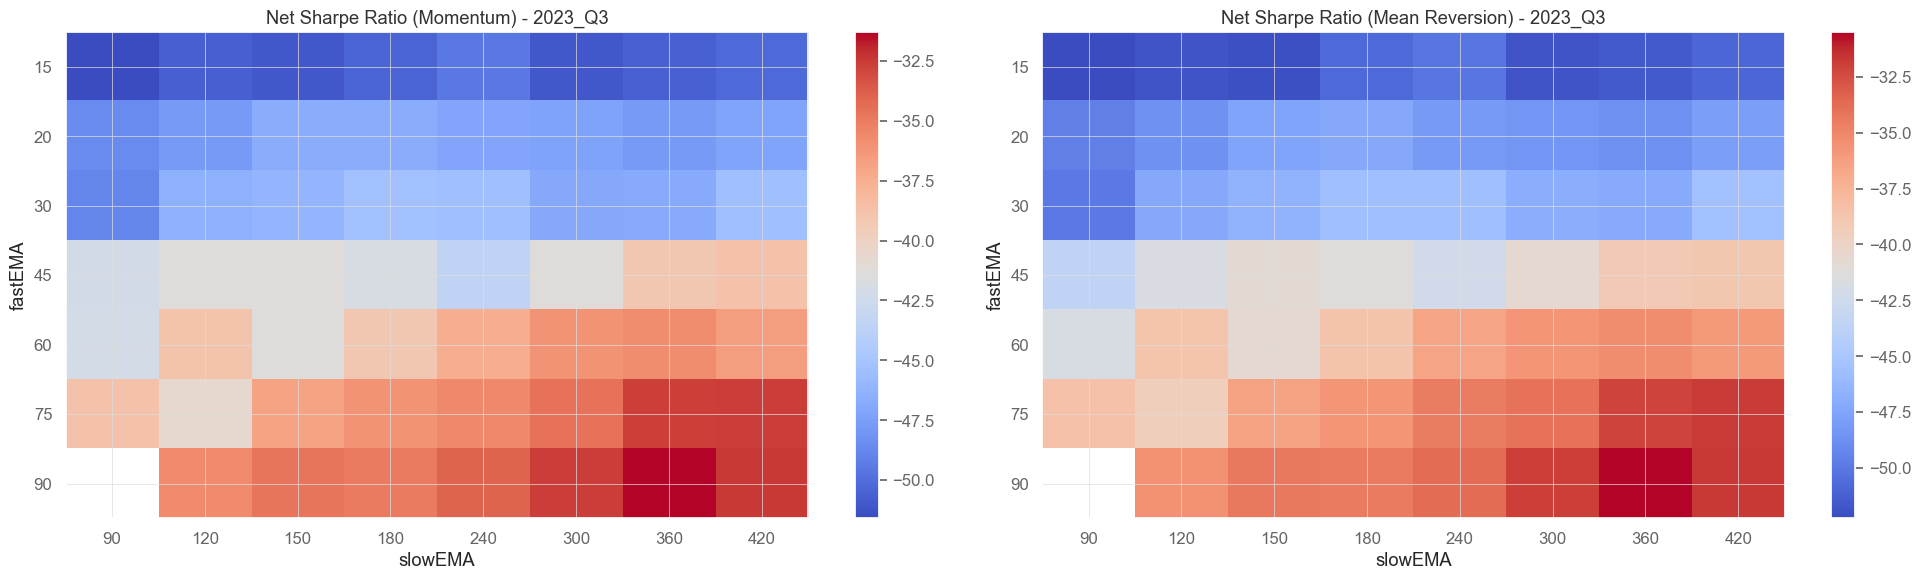

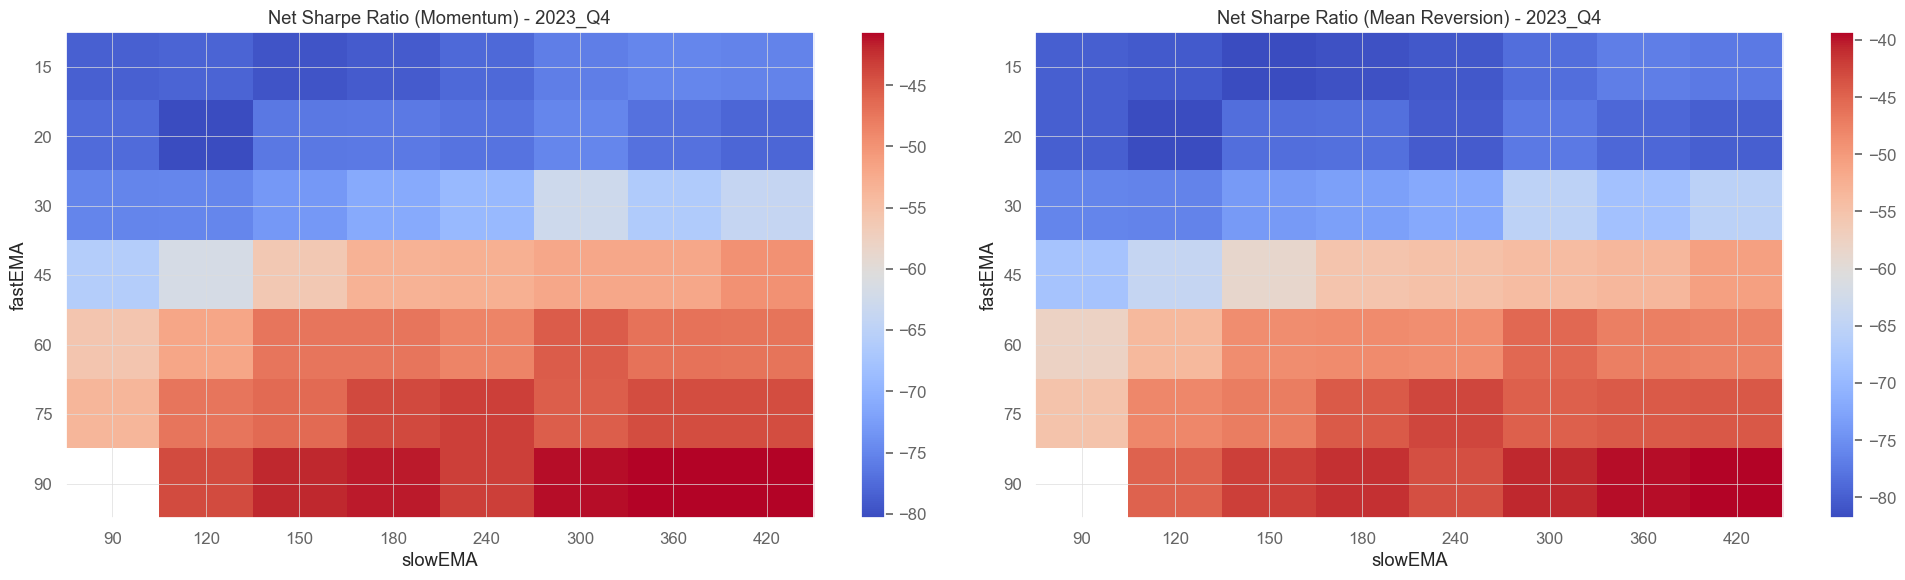

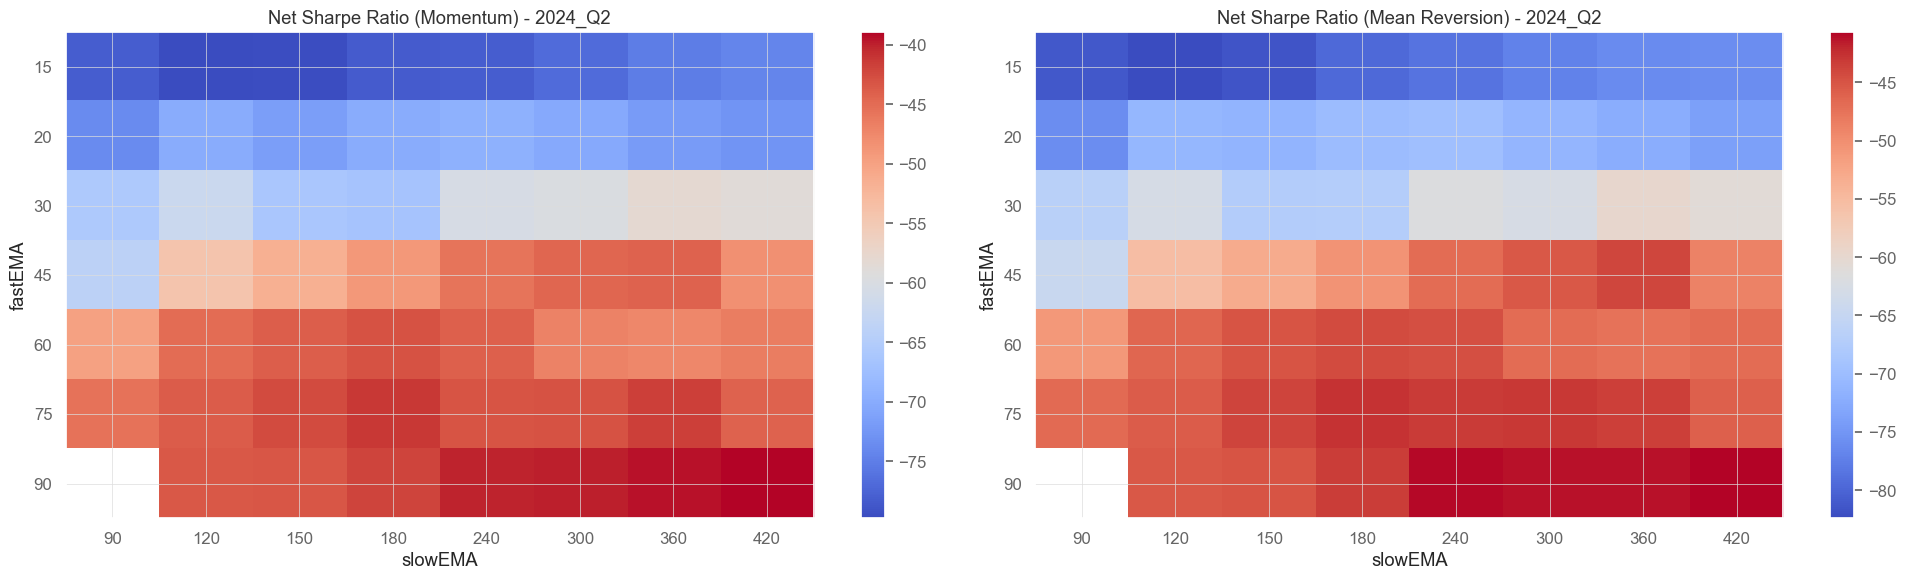

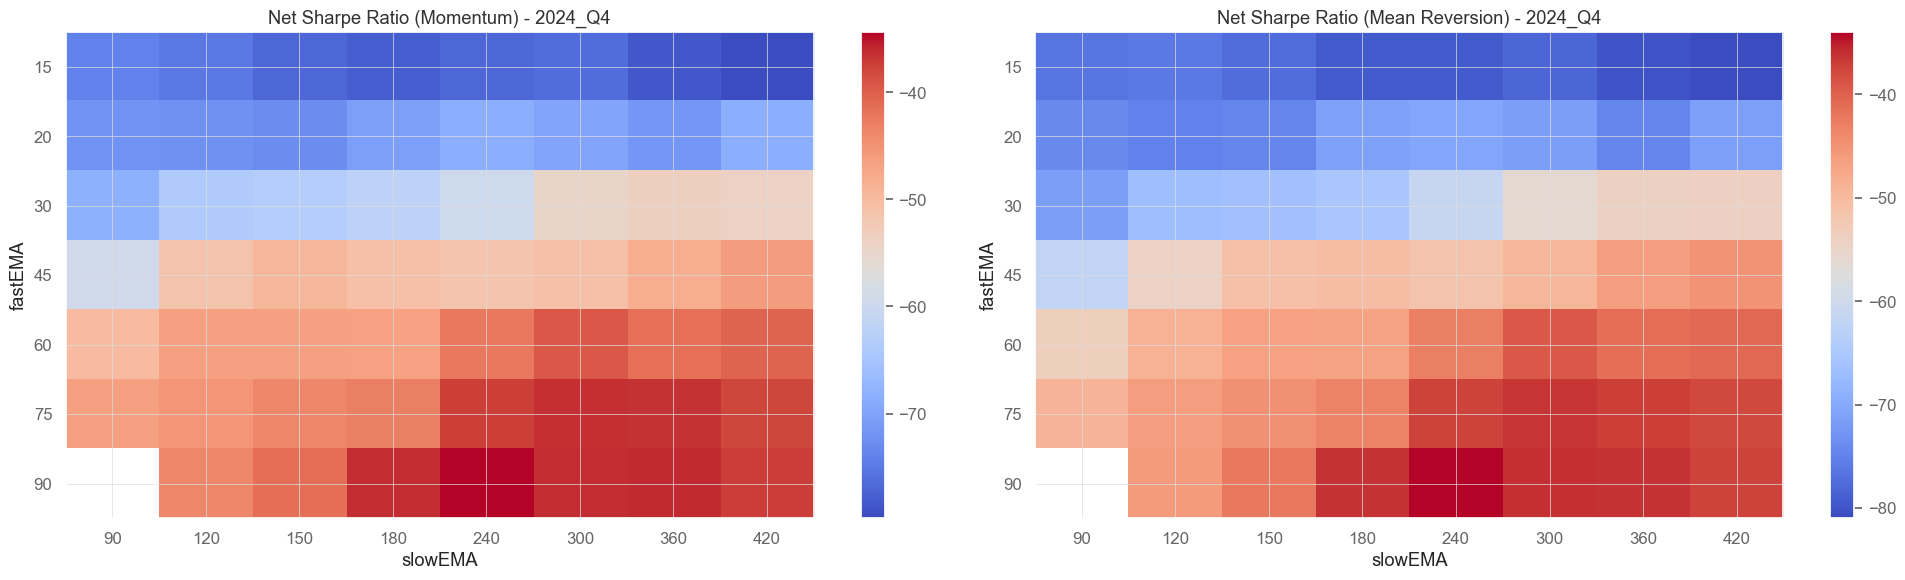

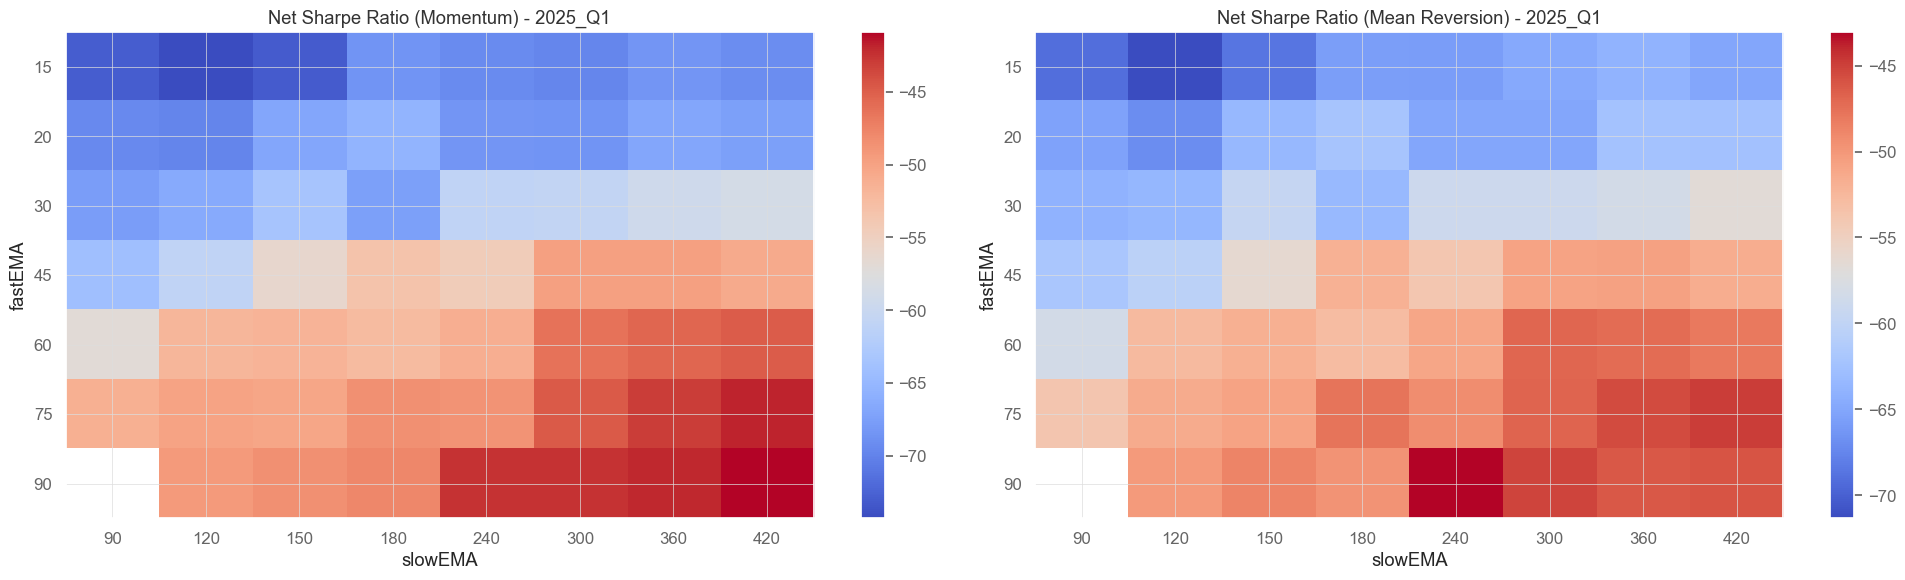

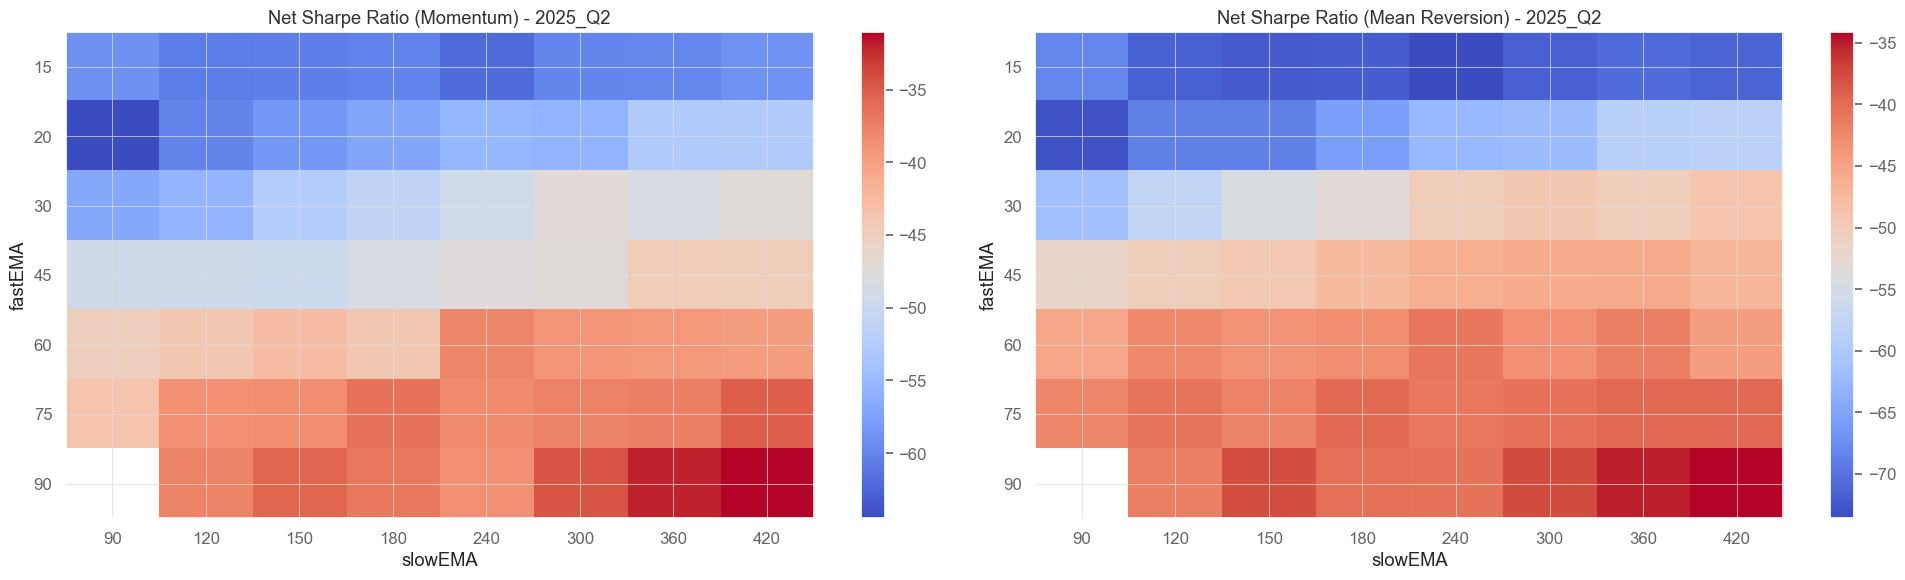

In [24]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_2MAs[summary_all_2MAs['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_SR_mom')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('slowEMA')
    axes[0].set_ylabel('fastEMA')
    axes[0].set_title(f'Net Sharpe Ratio (Momentum) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_SR_mr')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[1].set_xlabel('slowEMA')
    axes[1].set_ylabel('fastEMA')
    axes[1].set_title(f'Net Sharpe Ratio (Mean Reversion) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

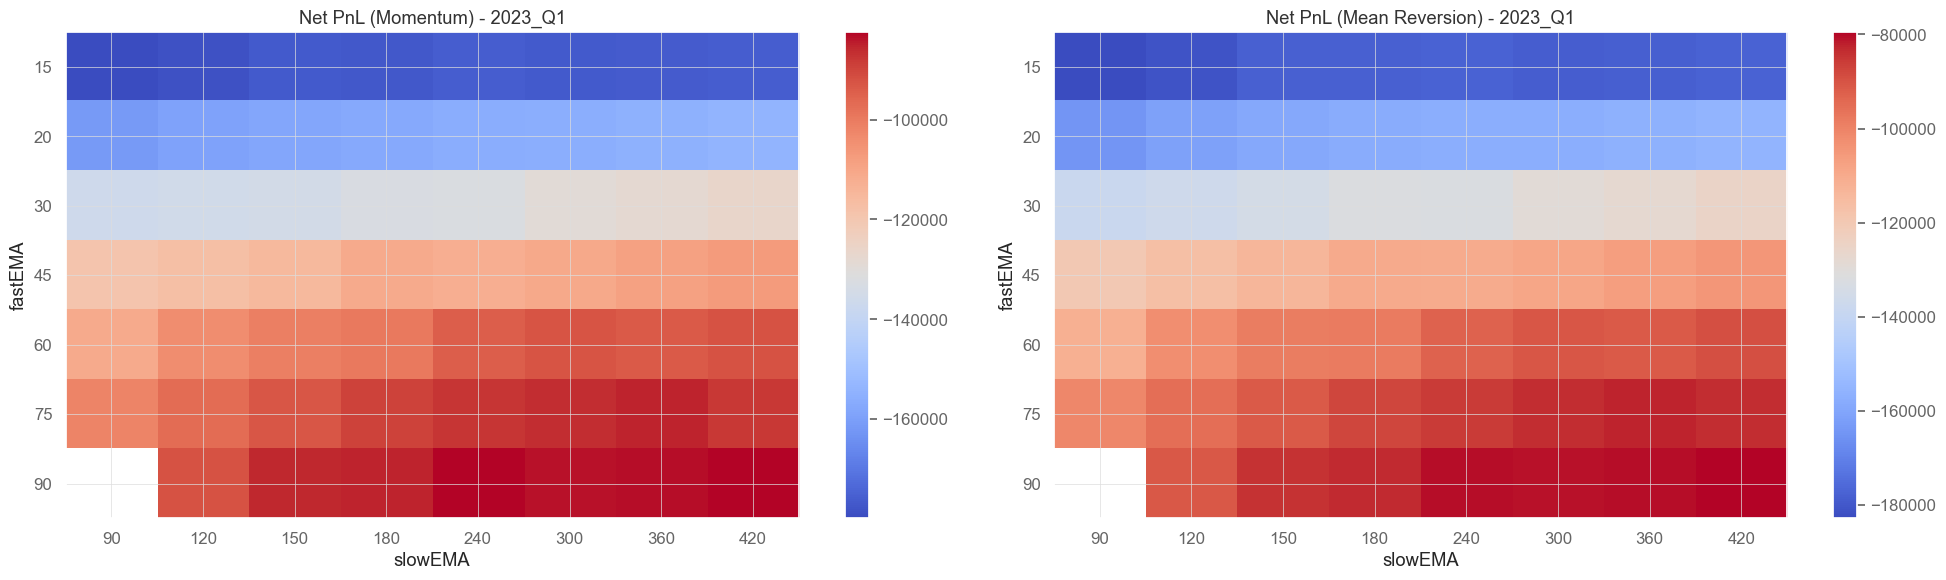

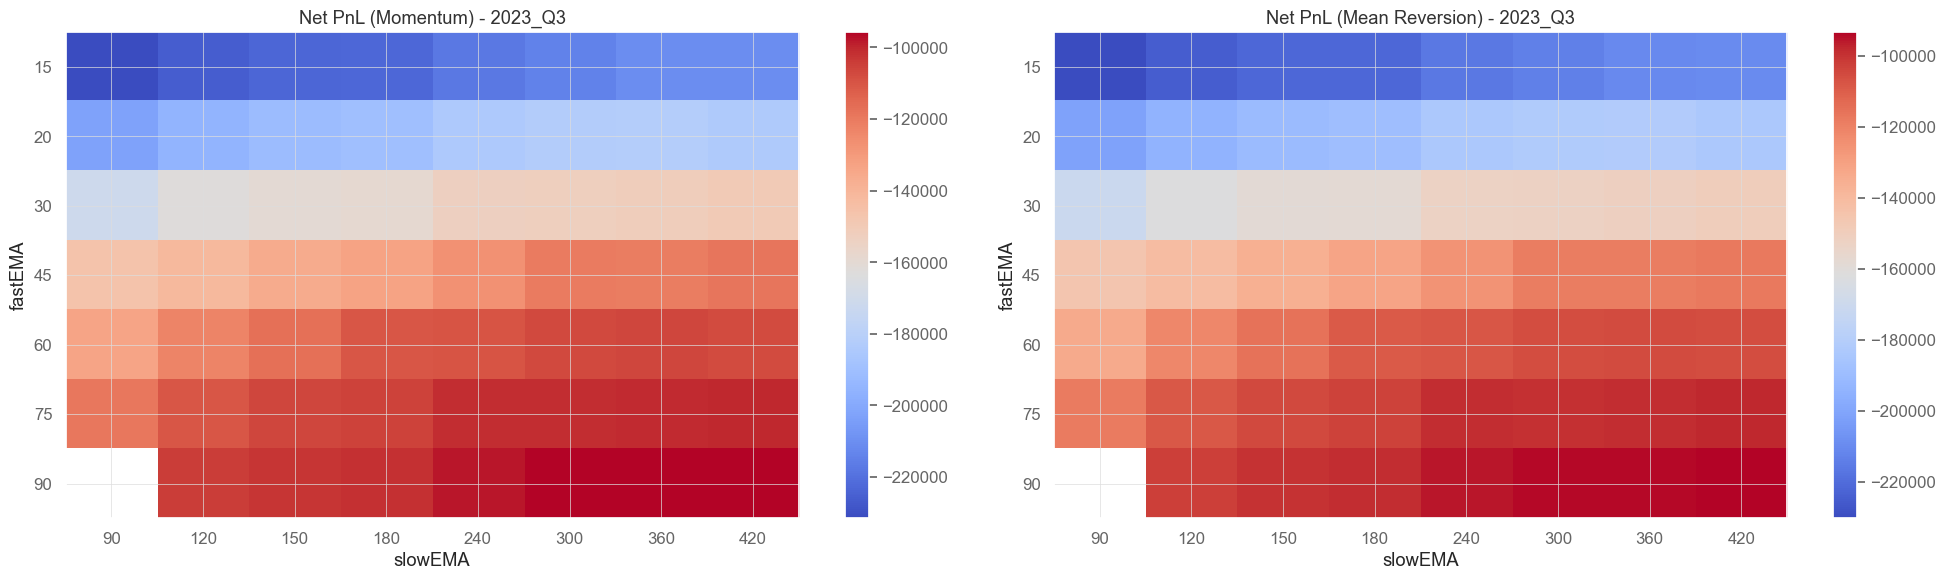

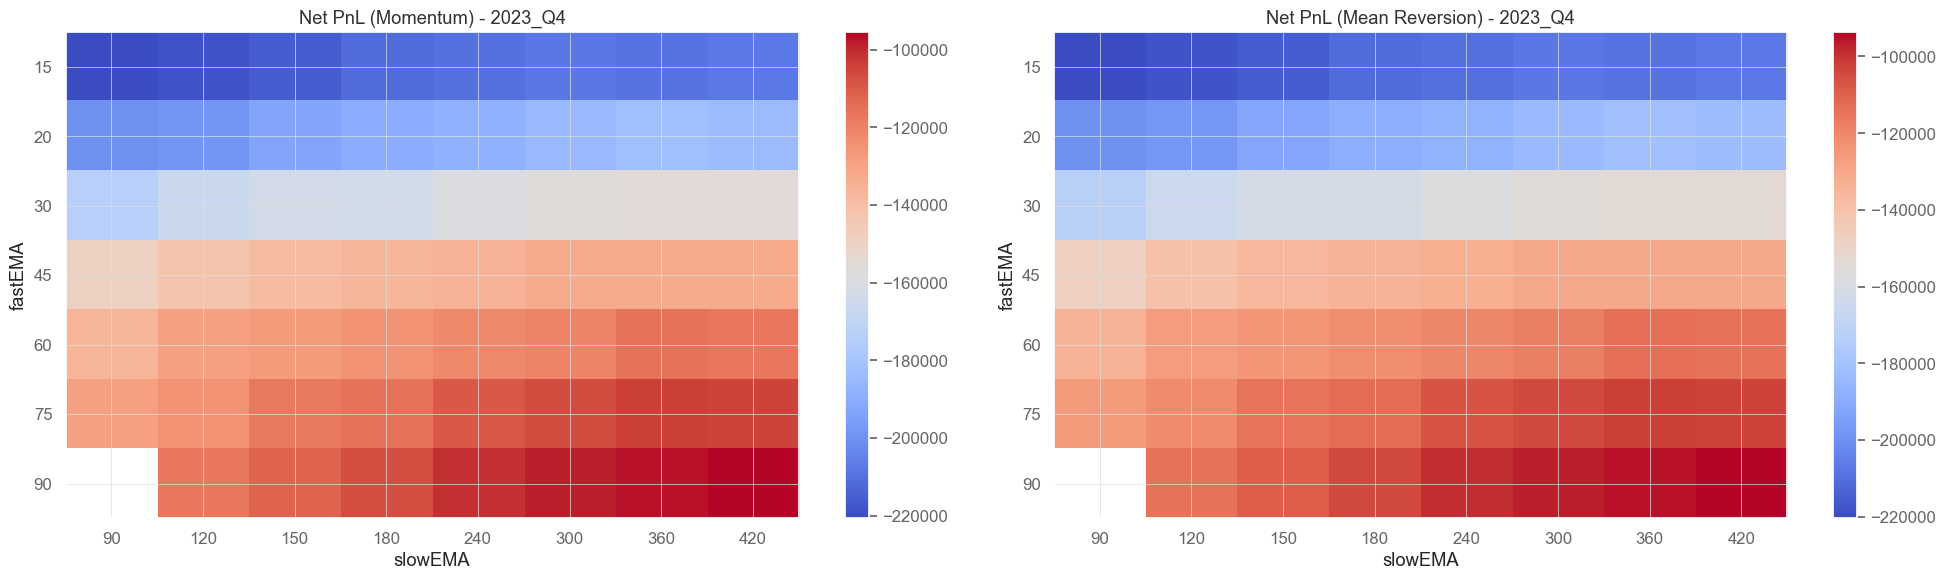

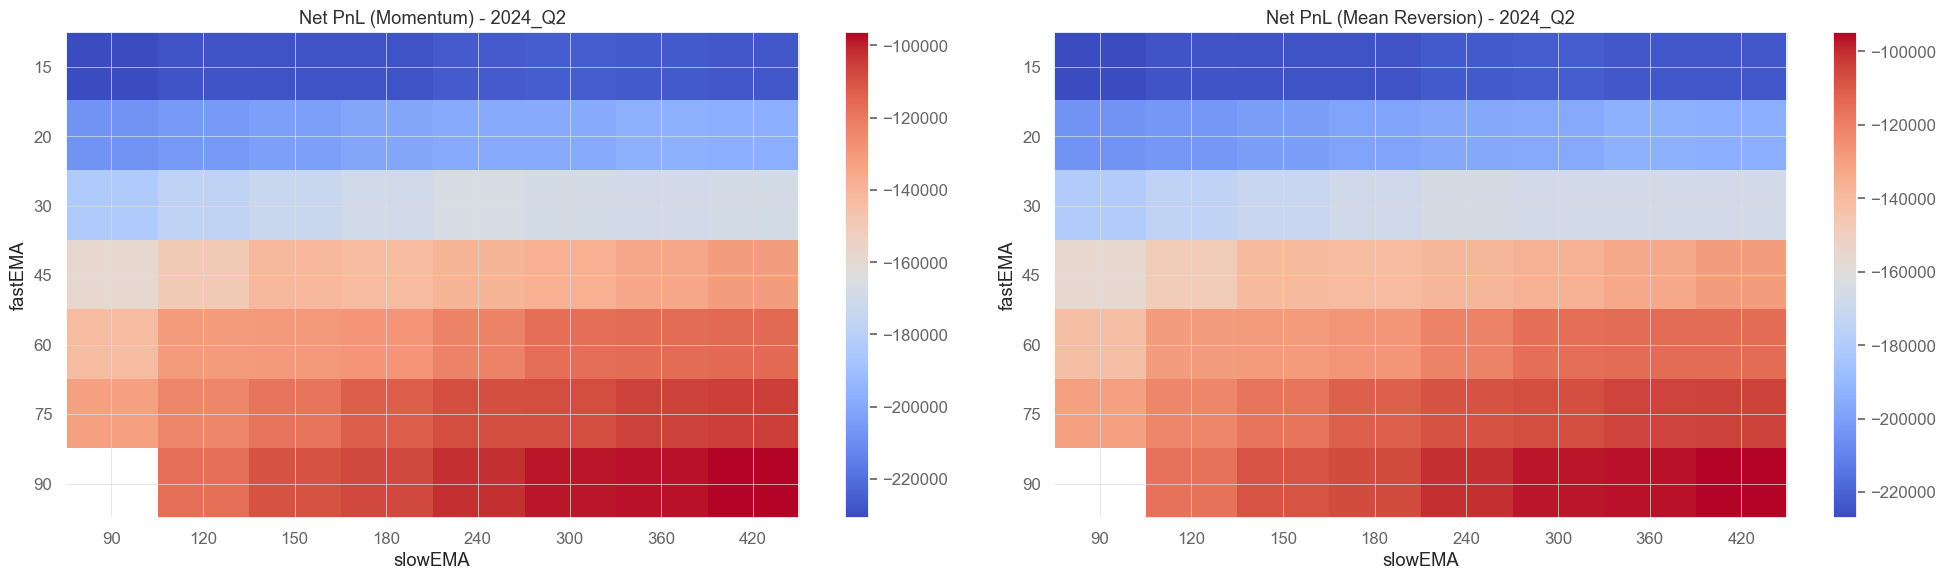

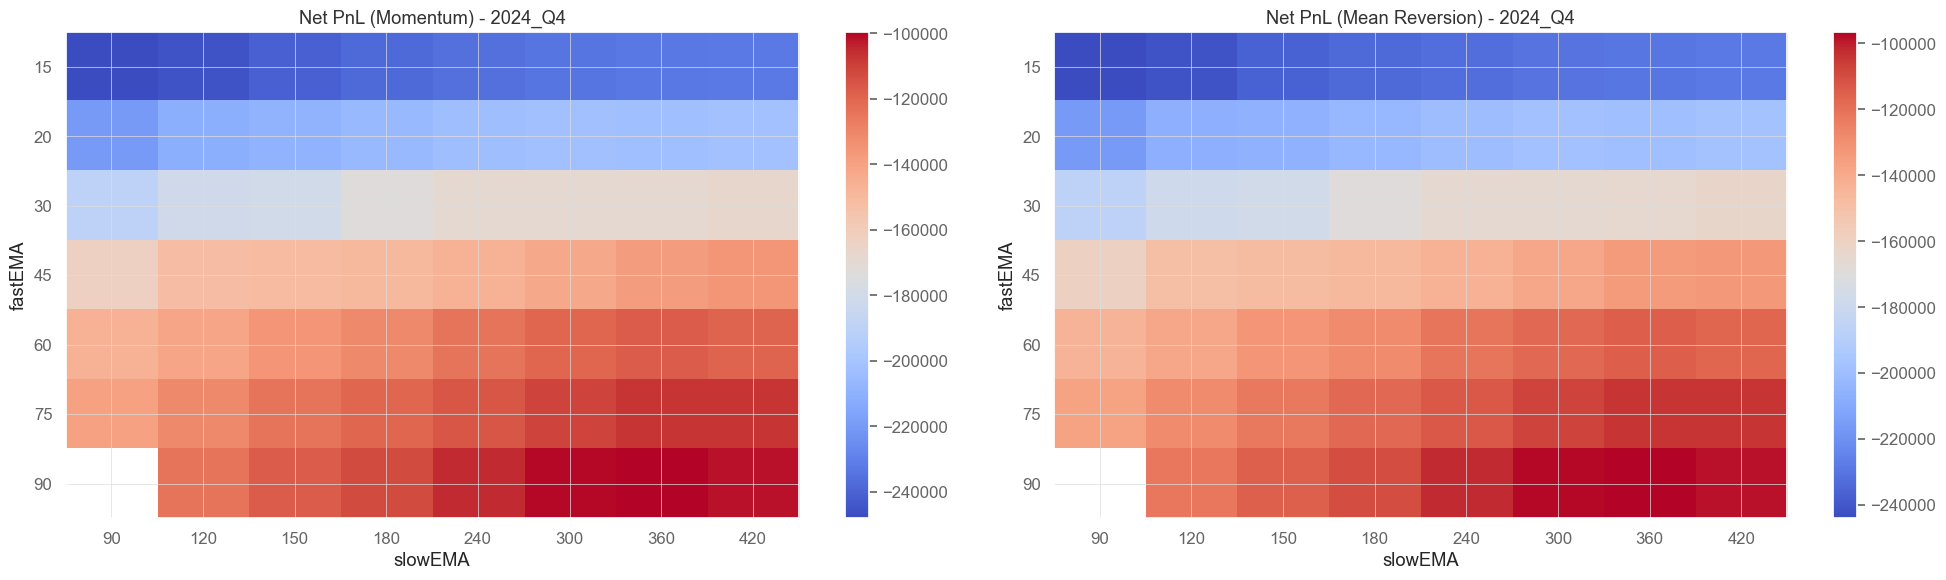

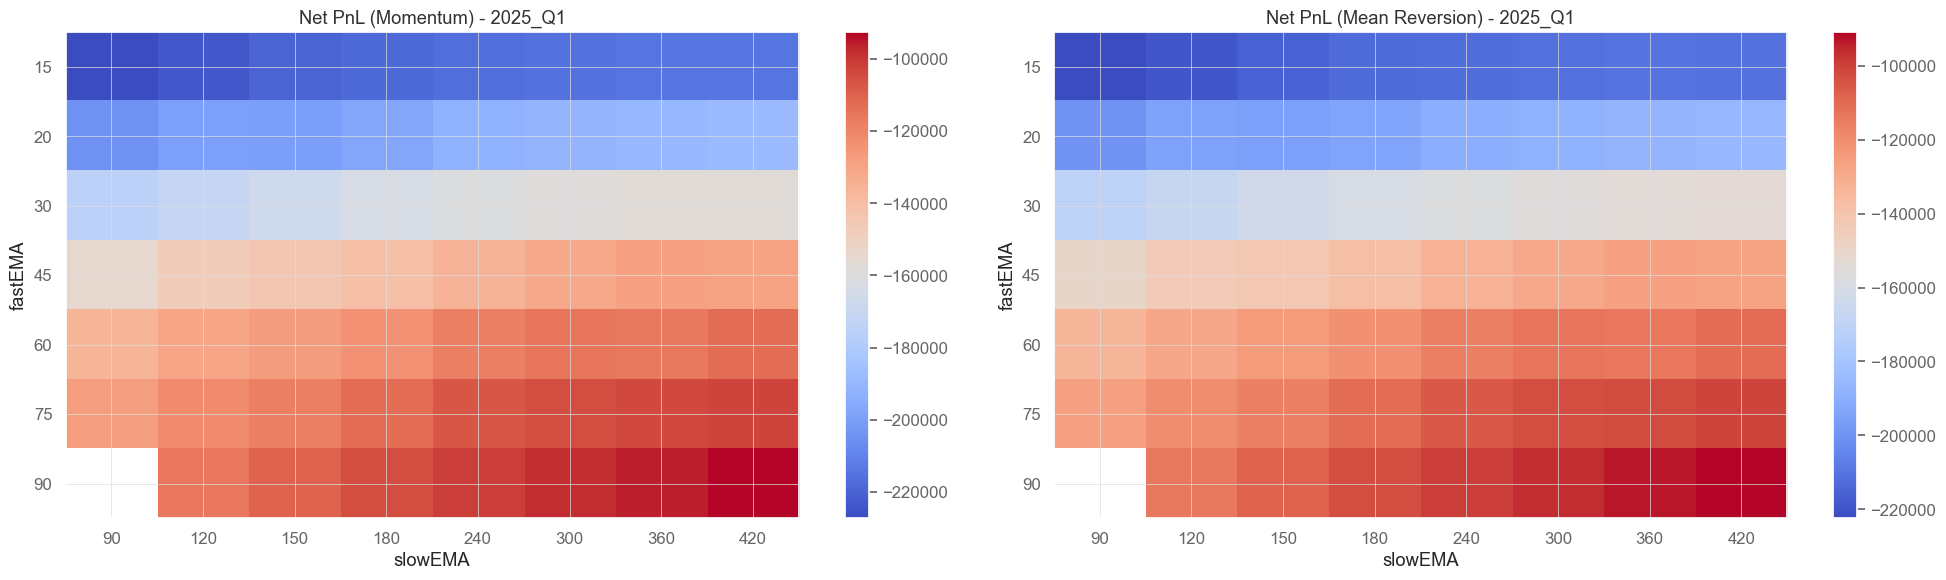

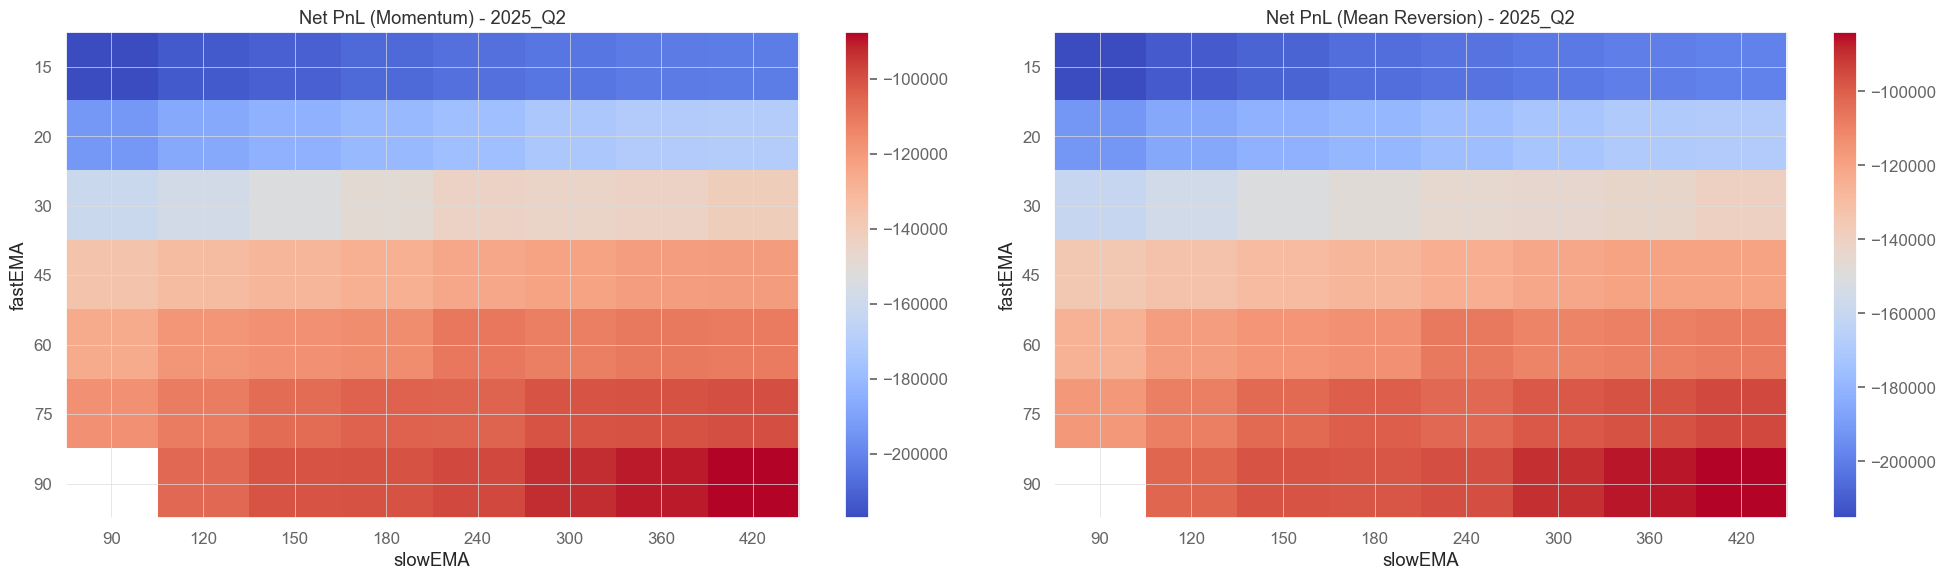

In [25]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_2MAs[summary_all_2MAs['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_PnL_mom')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('slowEMA')
    axes[0].set_ylabel('fastEMA')
    axes[0].set_title(f'Net PnL (Momentum) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='fastEMA', columns='slowEMA', values='net_PnL_mr')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[1].set_xlabel('slowEMA')
    axes[1].set_ylabel('fastEMA')
    axes[1].set_title(f'Net PnL (Mean Reversion) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

### Volatility Breakout Strategy

In [26]:
from functions.position_VB import positionVB

In [27]:
# lets do a comparison within a loop for spread_avratio and spread_sdsratio

def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

volat_sd_parameters = [60, 90, 120, 150, 180]
m_parameters = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

# create a dataframe to store results
summary_all_volatility = pd.DataFrame()

# Loop through each quarter
for quarter in quarters:
    print(f"Processing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_mask = all_data_2["quarter"] == quarter
    quarter_data = all_data_2[quarter_mask].copy()
    
    for volat_sd in volat_sd_parameters:
        for m in m_parameters:
            print(f"  volat_sd: {volat_sd}, m: {m}")

            # calculate the elements of the strategy
            NQ = quarter_data["NQ"]
            SP = quarter_data["SP"]

            # spread based on average ratio
            signal_avratio = NQ - (quarter_data["av_ratio"] * SP)
            std_spread_avratio = signal_avratio.rolling(window=volat_sd).std()
            upper_bound_avratio = m * std_spread_avratio
            lower_bound_avratio = -m * std_spread_avratio
            # position
            pos_avratio = positionVB(signal = signal_avratio,
                                    lower = lower_bound_avratio,
                                    upper = upper_bound_avratio,
                                    pos_flat = pos_flat[quarter_mask],
                                    strategy = "mr")
            # number of transactions
            n_trans_avratio = np.abs(np.diff(pos_avratio, prepend = 0))
            # convert to pd.Series and set the index
            n_trans_avratio = pd.Series(n_trans_avratio, index=quarter_data.index)

            # gross and net PnL
            pnl_gross_avratio = pos_avratio * (quarter_data["NQ"].diff() - quarter_data["av_ratio"] * quarter_data["SP"].diff())
            pnl_net_avratio = pnl_gross_avratio - n_trans_avratio * (12 + quarter_data["av_ratio"] * 12)

            # spread based on standard deviation ratio
            signal_sdsratio = quarter_data["spread_sdsratio"]
            std_spread_sdsratio = signal_sdsratio.rolling(window=volat_sd).std()
            upper_bound_sdsratio = m * std_spread_sdsratio
            lower_bound_sdsratio = -m * std_spread_sdsratio
            # position
            pos_sdsratio = positionVB(signal = signal_sdsratio,
                                    lower = lower_bound_sdsratio,
                                    upper = upper_bound_sdsratio,
                                    pos_flat = pos_flat[quarter_mask],
                                    strategy = "mr")

            # number of transactions
            n_trans_sdsratio = np.abs(np.diff(pos_sdsratio, prepend = 0))
            # convert to pd.Series and set the index
            n_trans_sdsratio = pd.Series(n_trans_sdsratio, index=quarter_data.index)

            # !!!!! signal is based on returns, but PnL on prices !!!!
            pnl_gross_sdsratio = pos_sdsratio * (quarter_data["NQ"].diff() - quarter_data["sds_ratio"] * quarter_data["SP"].diff())
            pnl_net_sdsratio = pnl_gross_sdsratio - n_trans_sdsratio * (12 + quarter_data["sds_ratio"] * 12)

            # aggregate to daily
            pnl_gross_avratio_daily = pnl_gross_avratio.resample("D").sum().dropna()
            pnl_gross_sdsratio_daily = pnl_gross_sdsratio.resample("D").sum().dropna()
            pnl_net_avratio_daily = pnl_net_avratio.resample("D").sum().dropna()
            pnl_net_sdsratio_daily = pnl_net_sdsratio.resample("D").sum().dropna()
            n_trans_avratio_daily = n_trans_avratio.resample("D").sum().dropna()
            n_trans_sdsratio_daily = n_trans_sdsratio.resample("D").sum().dropna()

            # calculate summary measures
            gross_SR_avratio = mySR(pnl_gross_avratio_daily, scale = 252)
            net_SR_avratio = mySR(pnl_net_avratio_daily, scale = 252)
            gross_PnL_avratio = pnl_gross_avratio_daily.sum()
            net_PnL_avratio = pnl_net_avratio_daily.sum()
            av_daily_ntrans_avratio = n_trans_avratio_daily.mean()

            gross_SR_sdsratio = mySR(pnl_gross_sdsratio_daily, scale = 252)
            net_SR_sdsratio = mySR(pnl_net_sdsratio_daily, scale = 252)
            gross_PnL_sdsratio = pnl_gross_sdsratio_daily.sum()
            net_PnL_sdsratio = pnl_net_sdsratio_daily.sum()
            av_daily_ntrans_sdsratio = n_trans_sdsratio_daily.mean()

            # Collect the necessary results into one object
            summary = pd.DataFrame({
                    'volat_sd': [volat_sd],
                    'm': [m],
                    'quarter': [quarter],
                    'gross_SR_avratio': [gross_SR_avratio],
                    'net_SR_avratio': [net_SR_avratio],
                    'gross_PnL_avratio': [gross_PnL_avratio],
                    'net_PnL_avratio': [net_PnL_avratio],
                    'av_daily_ntrans_avratio': [av_daily_ntrans_avratio],
                    'gross_SR_sdsratio': [gross_SR_sdsratio],
                    'net_SR_sdsratio': [net_SR_sdsratio],
                    'gross_PnL_sdsratio': [gross_PnL_sdsratio],
                    'net_PnL_sdsratio': [net_PnL_sdsratio],
                    'av_daily_ntrans_sdsratio': [av_daily_ntrans_sdsratio]
                    }, index=[0])

            # Append the results to the summary
            summary_all_volatility = pd.concat([summary_all_volatility,
                                            summary], ignore_index=True)

Processing quarter: 2023_Q1
  volat_sd: 60, m: 0.5


/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/functions/position_VB.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(signal[i-1]) and not np.isnan(upper[i-1]) and not np.isnan(lower[i-1]):
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/functions/position_VB.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signal[i-1] > upper[i-1]:
/Users/joannamisiak/Desktop/STUDIA/HFD/HFD_Trading_Competition/functions/position_VB.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as lab

  volat_sd: 60, m: 1
  volat_sd: 60, m: 1.5
  volat_sd: 60, m: 2
  volat_sd: 60, m: 2.5
  volat_sd: 60, m: 3
  volat_sd: 60, m: 3.5
  volat_sd: 90, m: 0.5
  volat_sd: 90, m: 1
  volat_sd: 90, m: 1.5
  volat_sd: 90, m: 2
  volat_sd: 90, m: 2.5
  volat_sd: 90, m: 3
  volat_sd: 90, m: 3.5
  volat_sd: 120, m: 0.5
  volat_sd: 120, m: 1
  volat_sd: 120, m: 1.5
  volat_sd: 120, m: 2
  volat_sd: 120, m: 2.5
  volat_sd: 120, m: 3
  volat_sd: 120, m: 3.5
  volat_sd: 150, m: 0.5
  volat_sd: 150, m: 1
  volat_sd: 150, m: 1.5
  volat_sd: 150, m: 2
  volat_sd: 150, m: 2.5
  volat_sd: 150, m: 3
  volat_sd: 150, m: 3.5
  volat_sd: 180, m: 0.5
  volat_sd: 180, m: 1
  volat_sd: 180, m: 1.5
  volat_sd: 180, m: 2
  volat_sd: 180, m: 2.5
  volat_sd: 180, m: 3
  volat_sd: 180, m: 3.5
Processing quarter: 2023_Q3
  volat_sd: 60, m: 0.5
  volat_sd: 60, m: 1
  volat_sd: 60, m: 1.5
  volat_sd: 60, m: 2
  volat_sd: 60, m: 2.5
  volat_sd: 60, m: 3
  volat_sd: 60, m: 3.5
  volat_sd: 90, m: 0.5
  volat_sd: 90, m: 1


In [28]:

summary_all_volatility.sort_values(by = 'net_SR_sdsratio', 
                                 ascending = False).head(10)

volat_sd    m  quarter  gross_SR_avratio  net_SR_avratio  \
188        90  3.5  2025_Q1         -1.718522      -21.132968   
174       180  3.5  2024_Q4         -0.628276      -17.260982   
181        60  3.5  2025_Q1         -1.717462      -20.497392   
195       120  3.5  2025_Q1         -2.215567      -21.495721   
209       180  3.5  2025_Q1         -3.302433      -21.095970   
146        60  3.5  2024_Q4          0.448301      -20.453546   
167       150  3.5  2024_Q4         -0.755916      -17.753576   
223        90  3.5  2025_Q2          4.960346      -19.477012   
216        60  3.5  2025_Q2          3.906739      -21.093468   
202       150  3.5  2025_Q1         -2.377768      -21.714271   

     gross_PnL_avratio  net_PnL_avratio  av_daily_ntrans_avratio  \
188        -325.271753     -7419.155129                 1.460674   
174         -87.572900     -5942.481803                 1.173913   
181        -364.896427     -7568.452782                 1.483146   
195        -371.697302     -7244.761409                 1.415730   
209        -420.640185     -6965.976876                 1.348315   
146          92.192299     -7603.216715                 1.543478   
167        -127.651090     -6305.844093                 1.239130   
223        1297.506484     -6026.603005                 1.472527   
216        1077.552988     -7013.743320                 1.626374   
202        -335.090773     -7100.007356                 1.393258   

     gross_SR_sdsratio  net_SR_sdsratio  gross_PnL_sdsratio  net_PnL_sdsratio  \
188           2.293252        -3.832510          558.045377       -969.173708   
174           2.101776        -4.001649          509.853019      -1134.135784   
181           2.394386        -4.285231          557.943262      -1096.152422   
195           1.288628        -4.370519          299.771666      -1110.765134   
209           1.359890        -4.814889          257.900614      -1035.955071   
146           1.666439        -4.876033          419.728836      -1423.582976   
167           1.589010        -4.914276          400.502646      -1599.894086   
223          -3.071944        -5.347712        -1517.293763      -3269.109549   
216          -2.386721        -5.363298         -920.647065      -2729.350092   
202           0.429610        -5.513143           82.601174      -1325.324549   

     av_daily_ntrans_sdsratio  
188                  0.606742  
174                  0.608696  
181                  0.651685  
195                  0.561798  
209                  0.516854  
146                  0.673913  
167                  0.739130  
223                  0.725275  
216                  0.747253  
202                  0.561798

In [29]:
quarter_data_pivot_mom

slowEMA            90             120            150            180  \
fastEMA                                                               
15      -217242.168793 -212864.457317 -210892.918758 -208384.273800   
20      -193327.106615 -187234.783423 -183443.776065 -180549.610063   
30      -160663.712687 -157225.006809 -152934.783117 -149293.097736   
45      -135887.034686 -133115.838064 -130398.142374 -128059.164960   
60      -126356.603544 -119086.935316 -117002.433778 -115951.796557   
75      -117223.283784 -111498.038699 -107040.432977 -104551.136407   
90                 NaN -105924.979656 -100765.625020 -100242.424013   

slowEMA            240            300            360            420  
fastEMA                                                              
15      -206405.244680 -204230.890856 -202662.884756 -202068.401424  
20      -177334.280120 -173263.737551 -171093.530817 -170262.364066  
30      -144052.424347 -144912.358155 -144252.681805 -140945.947466  
45      -124807.227771 -123376.775626 -121629.974000 -121460.465422  
60      -110250.407329 -112040.695857 -110753.928544 -111006.664161  
75      -105219.361056 -101139.208538 -100333.234007  -99724.910110  
90       -98447.792750  -92867.360958  -90260.798865  -87537.719029

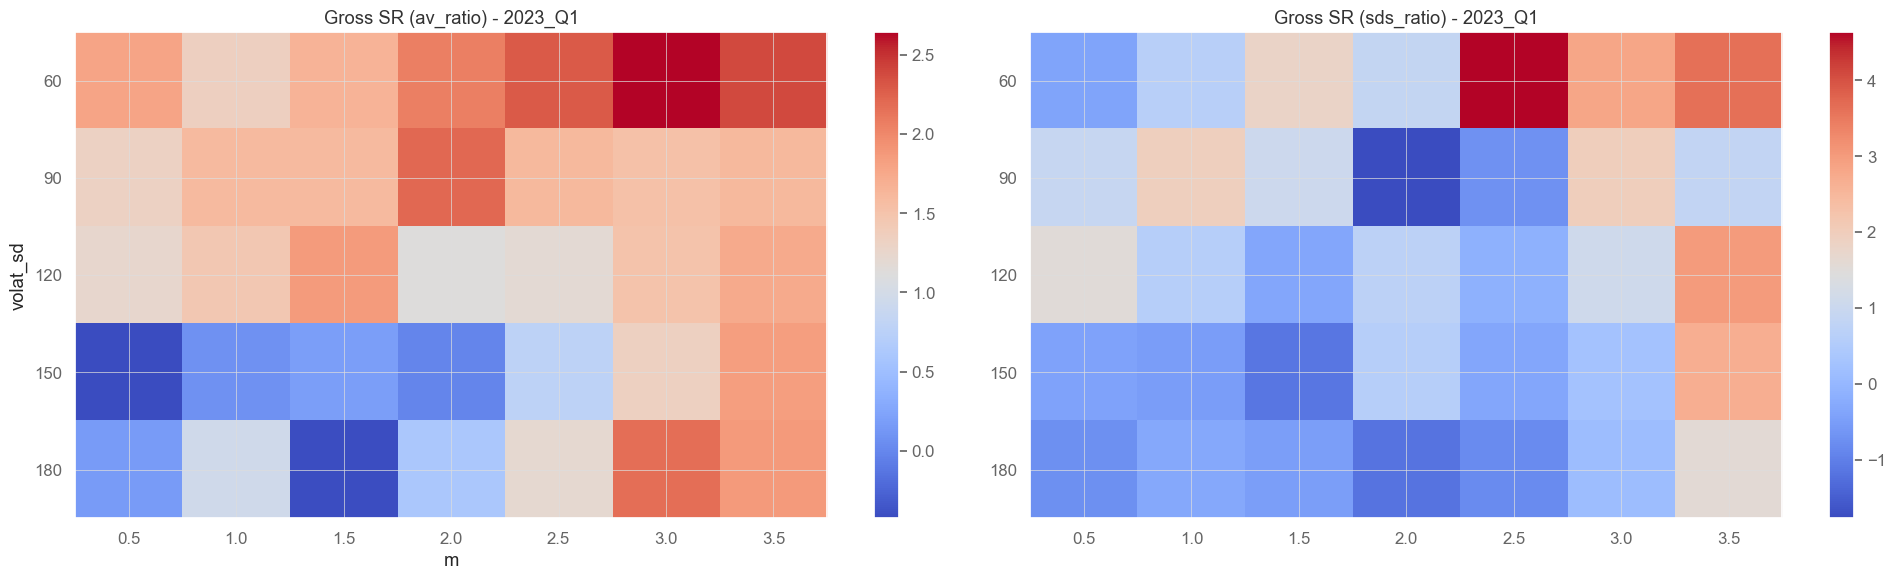

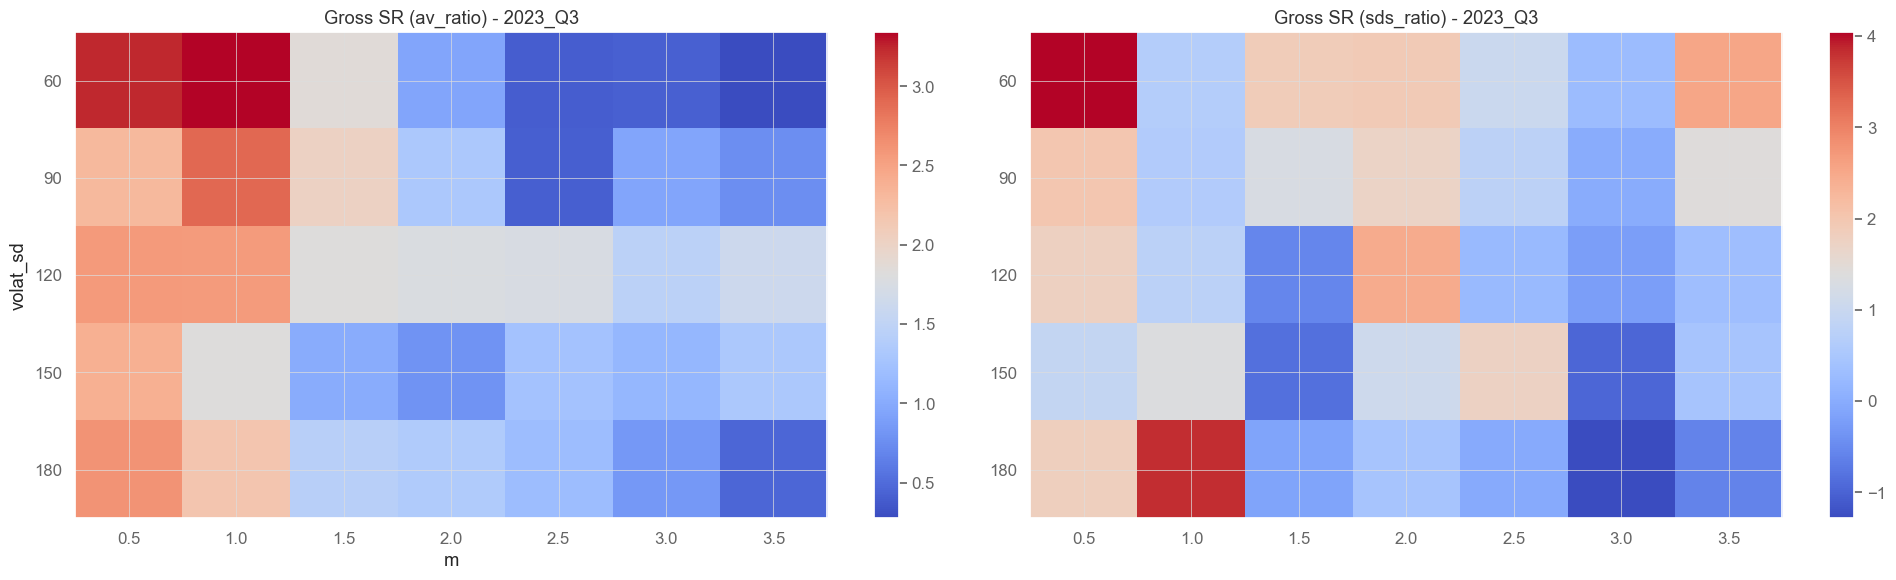

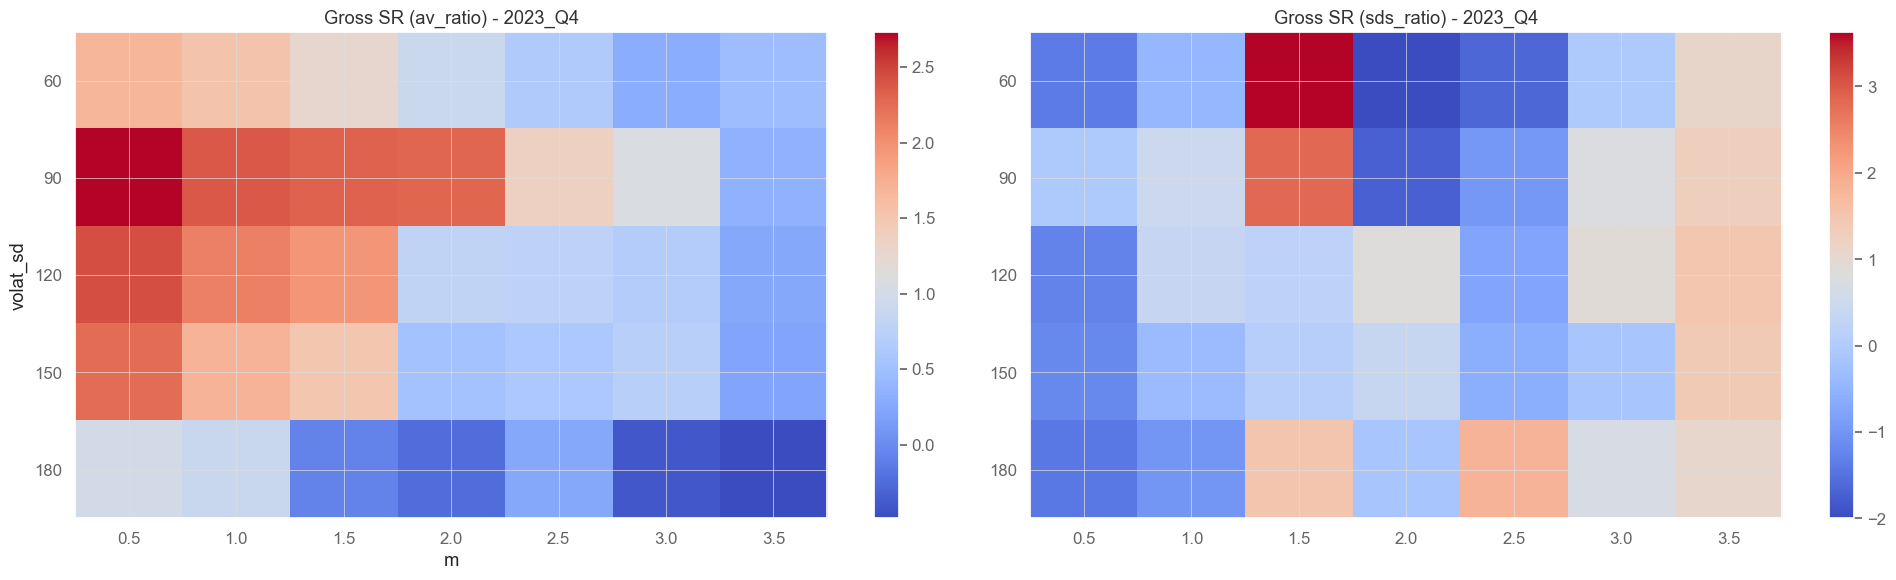

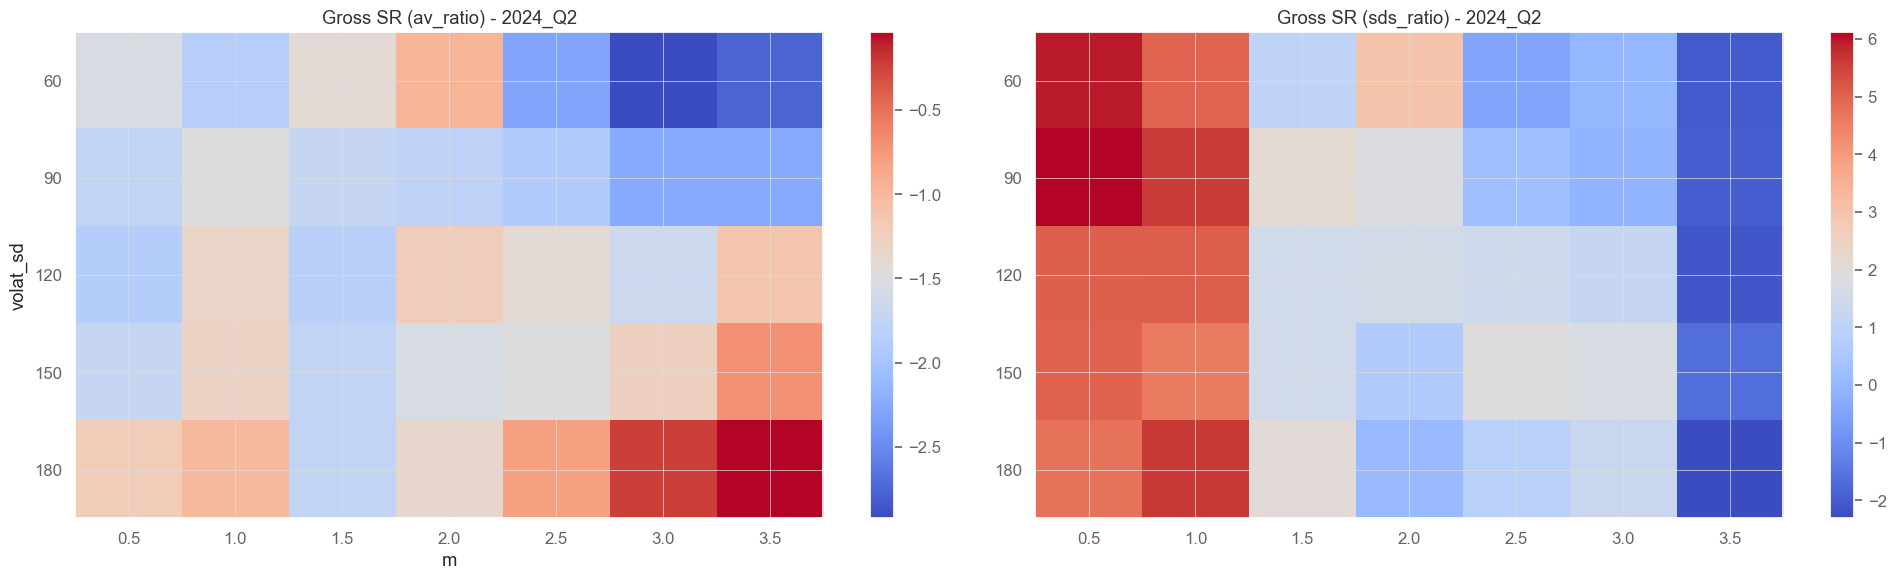

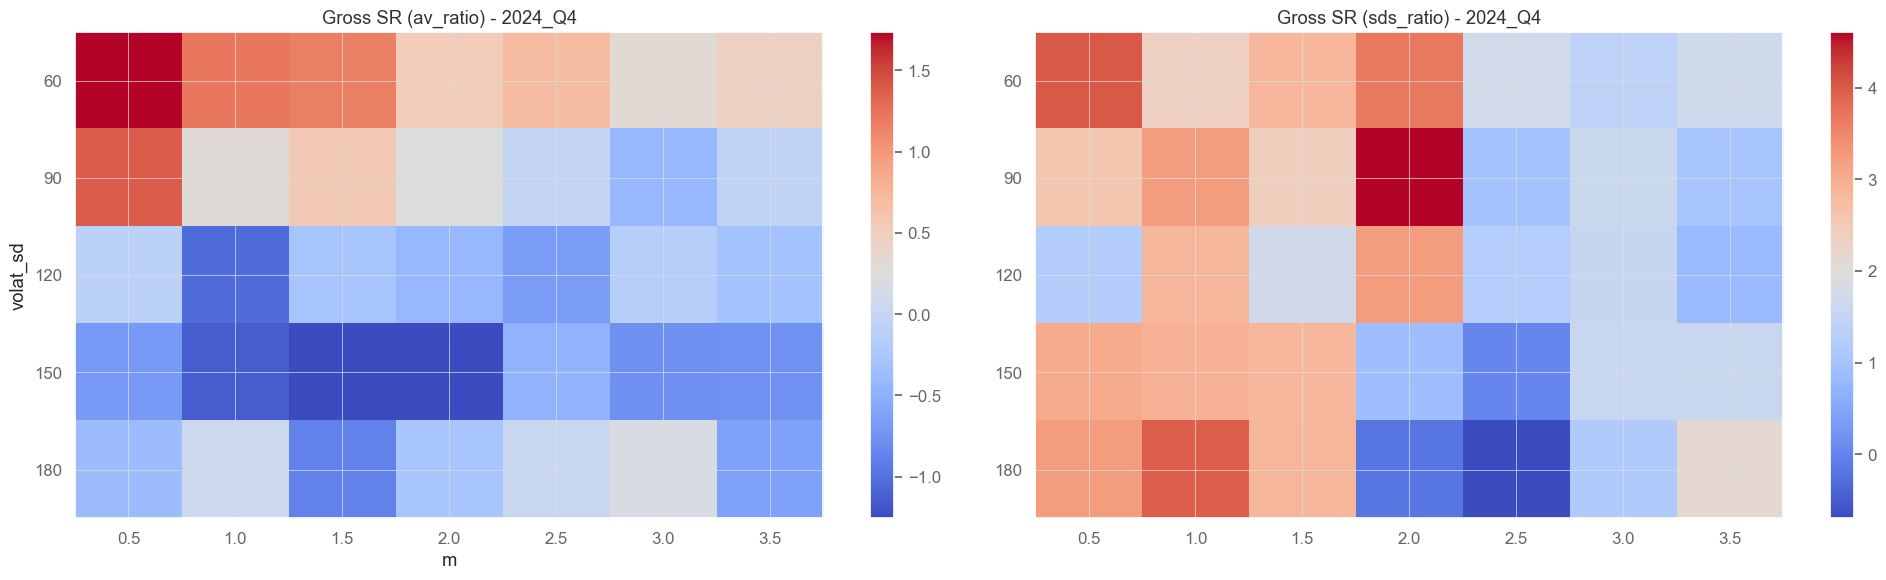

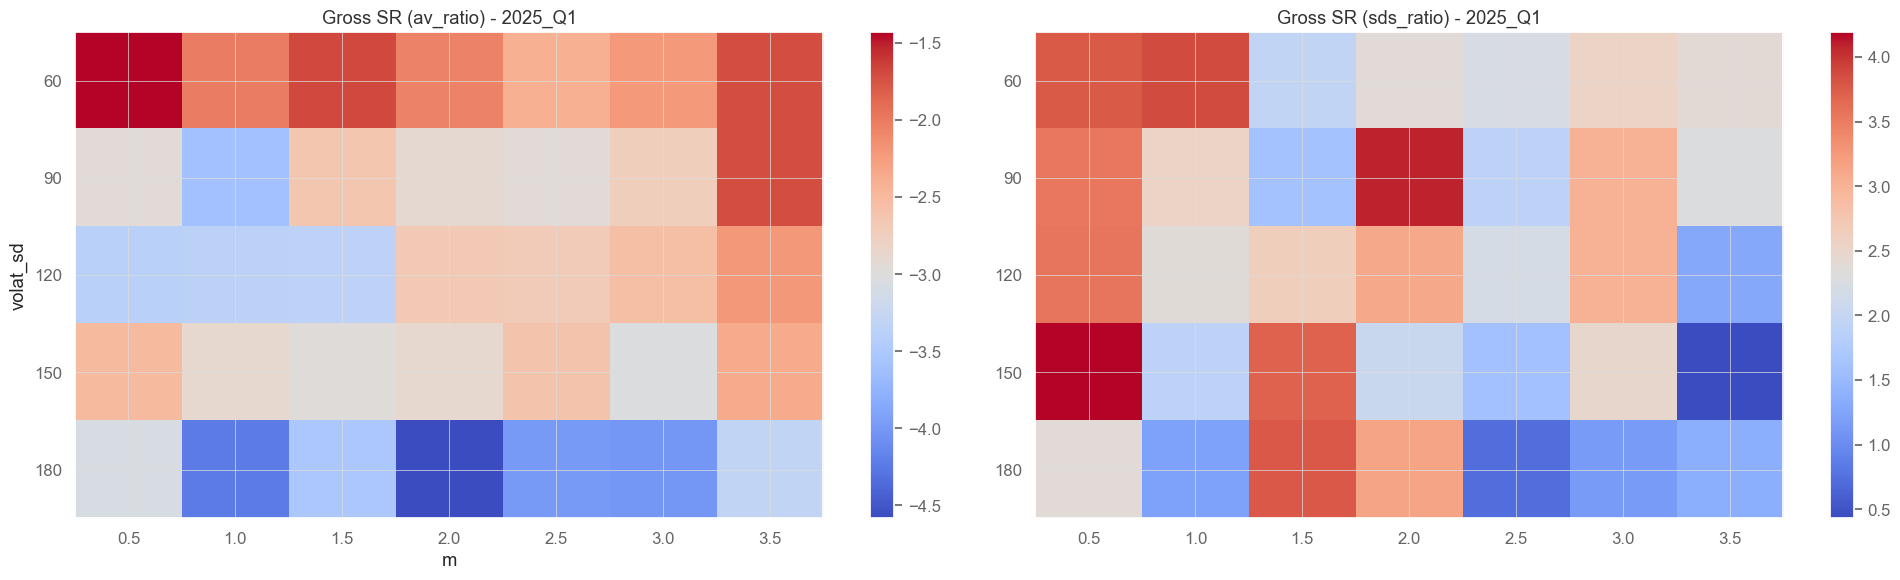

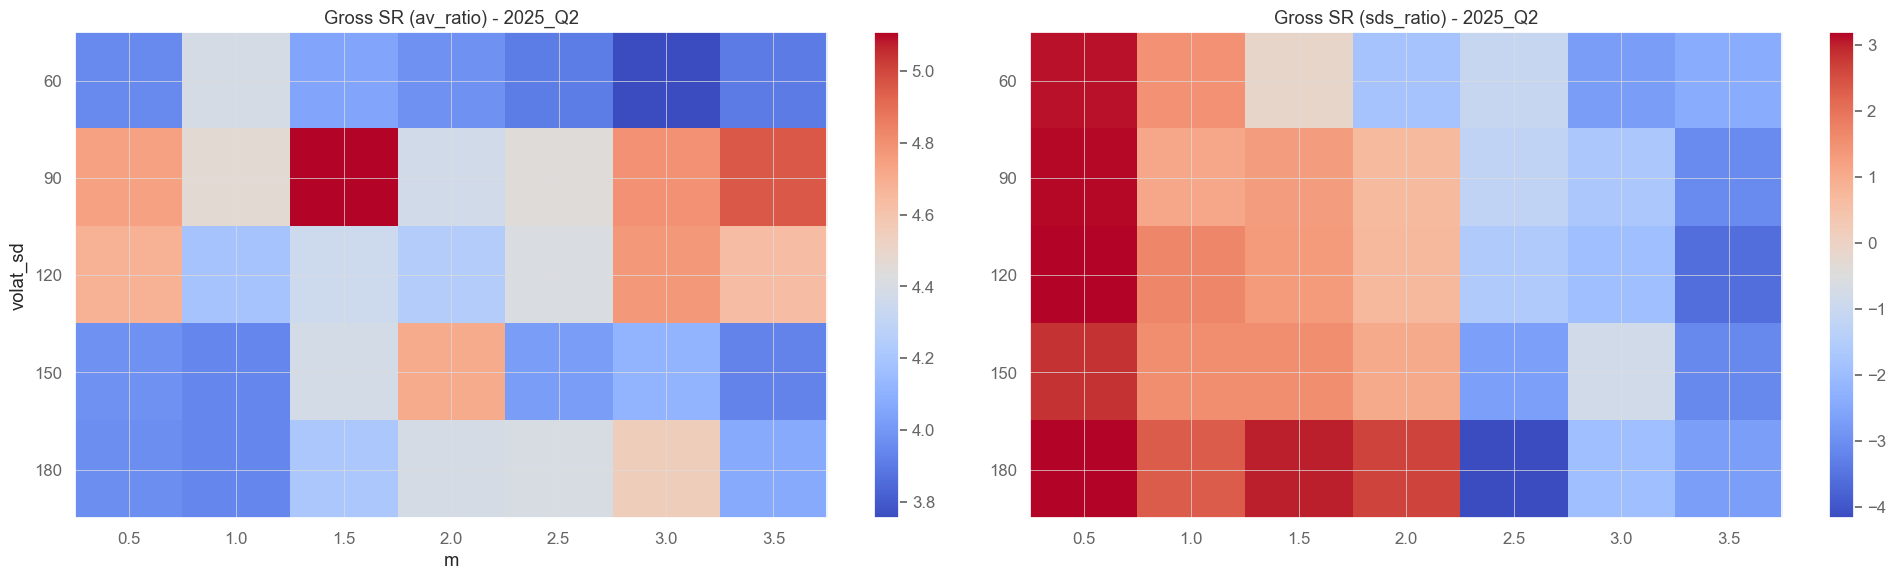

In [30]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_volatility[summary_all_volatility['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='volat_sd', columns='m', values='gross_SR_avratio')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[0].set_title(f'Gross SR (av_ratio) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='volat_sd', columns='m', values='gross_SR_sdsratio')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[1].set_title(f'Gross SR (sds_ratio) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

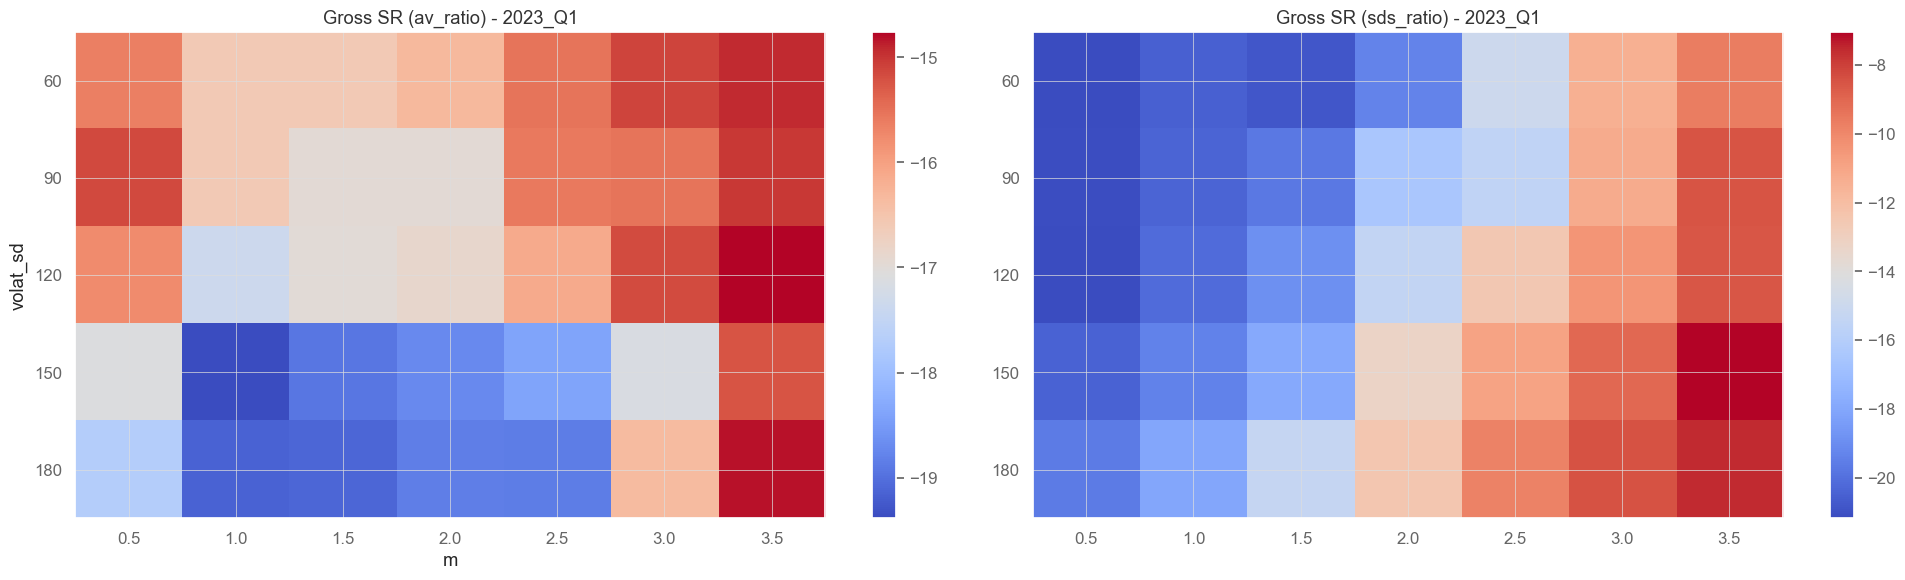

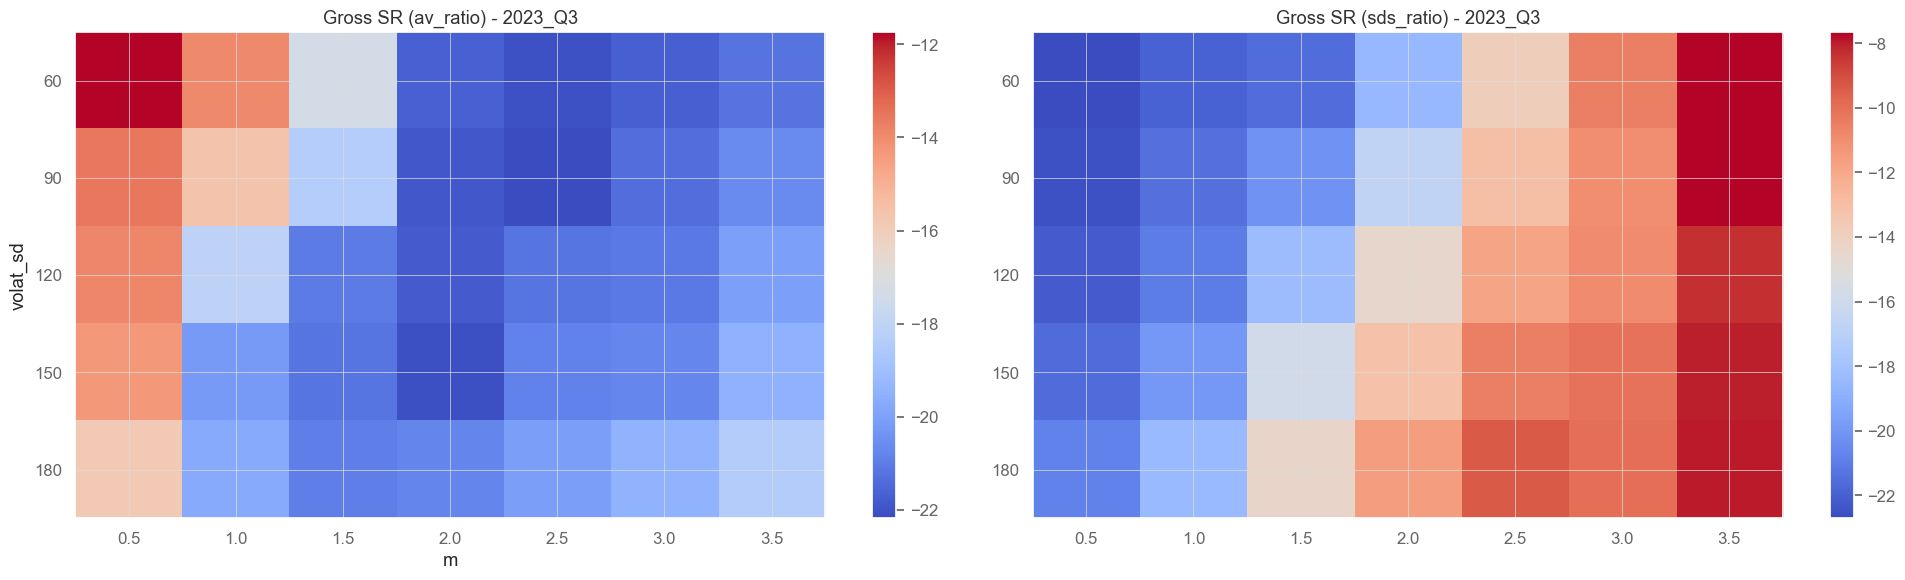

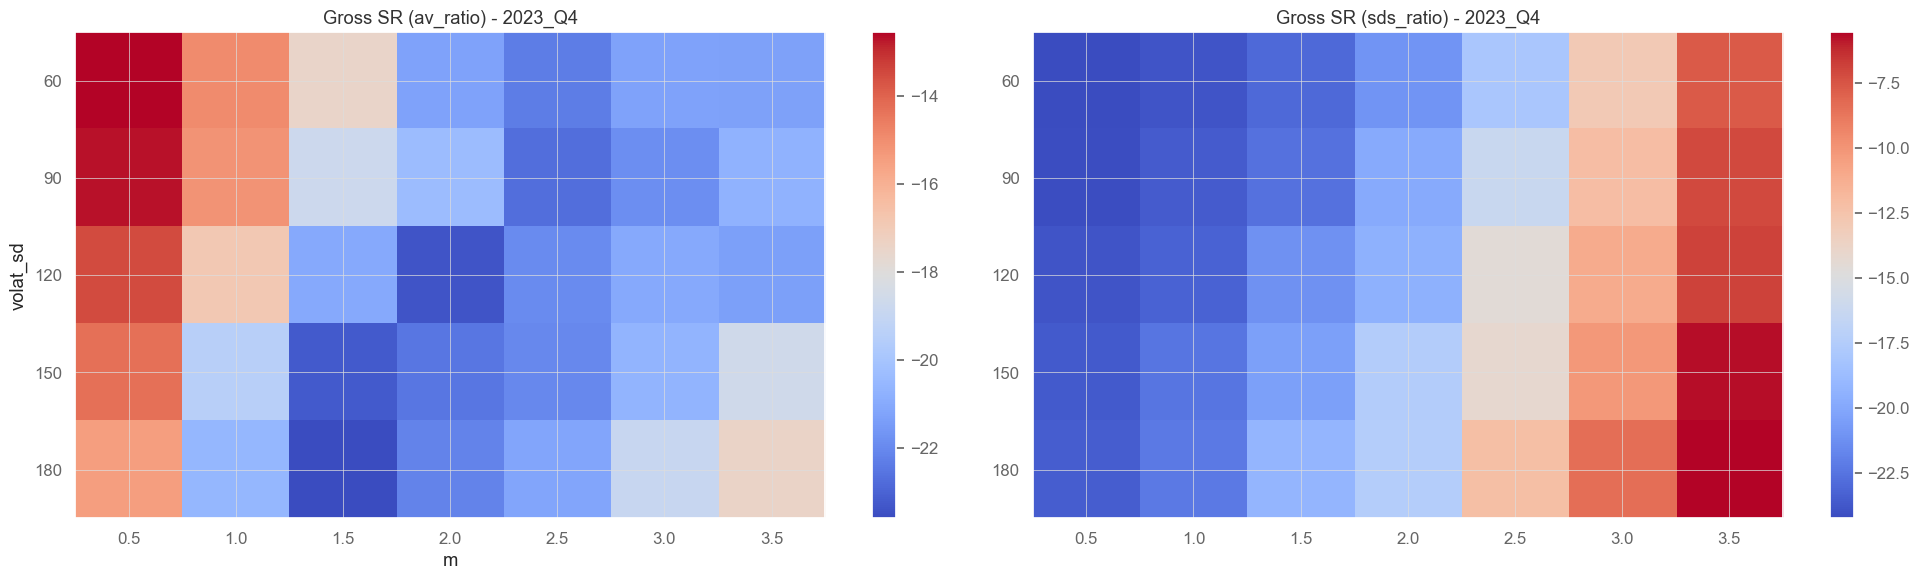

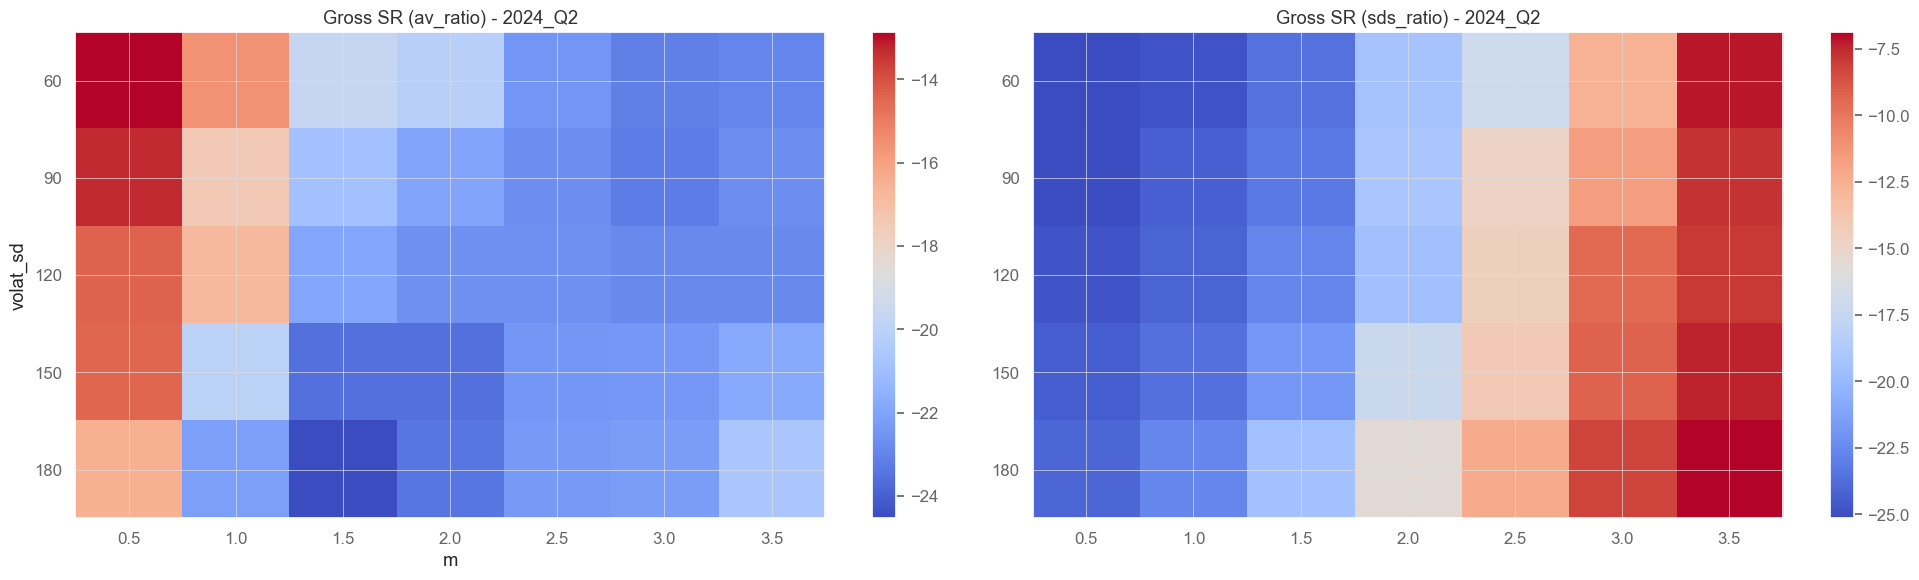

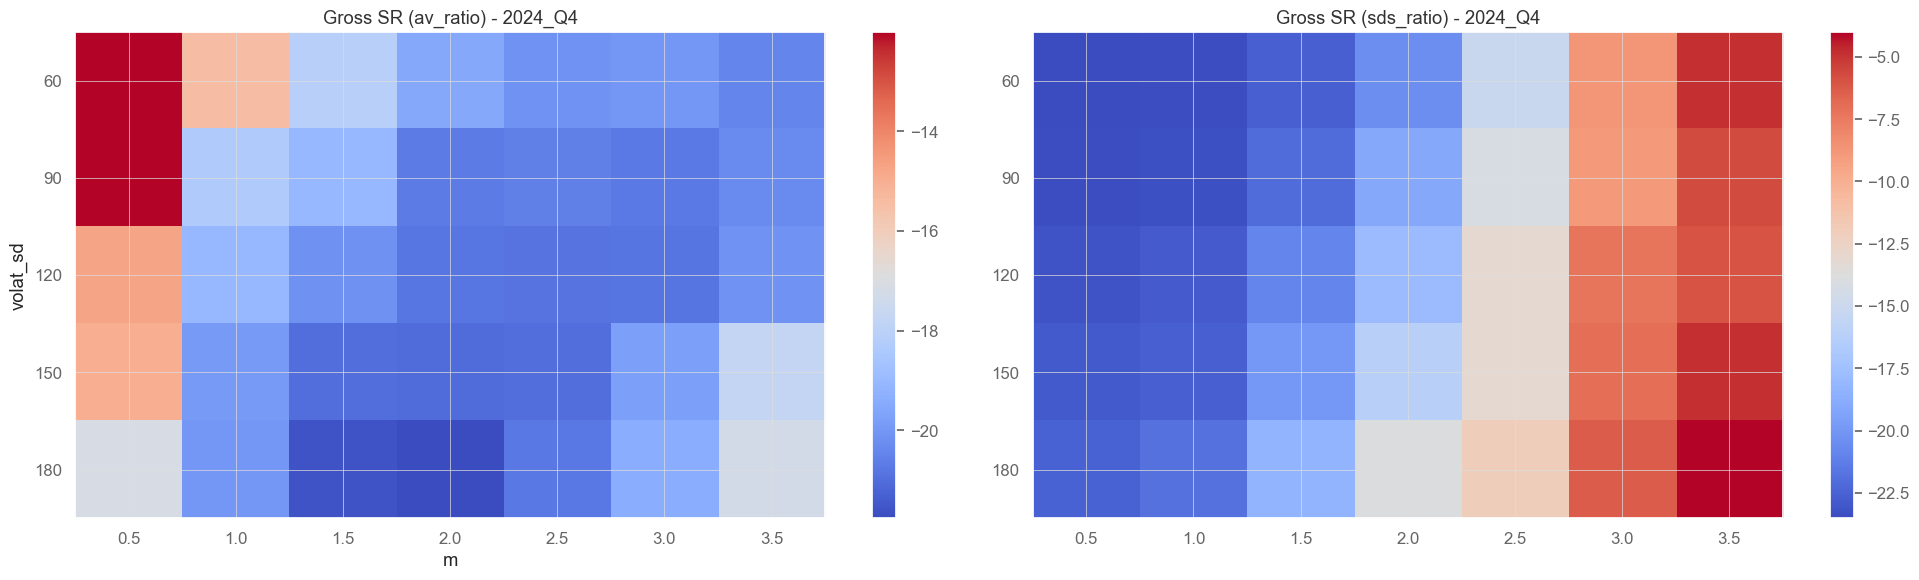

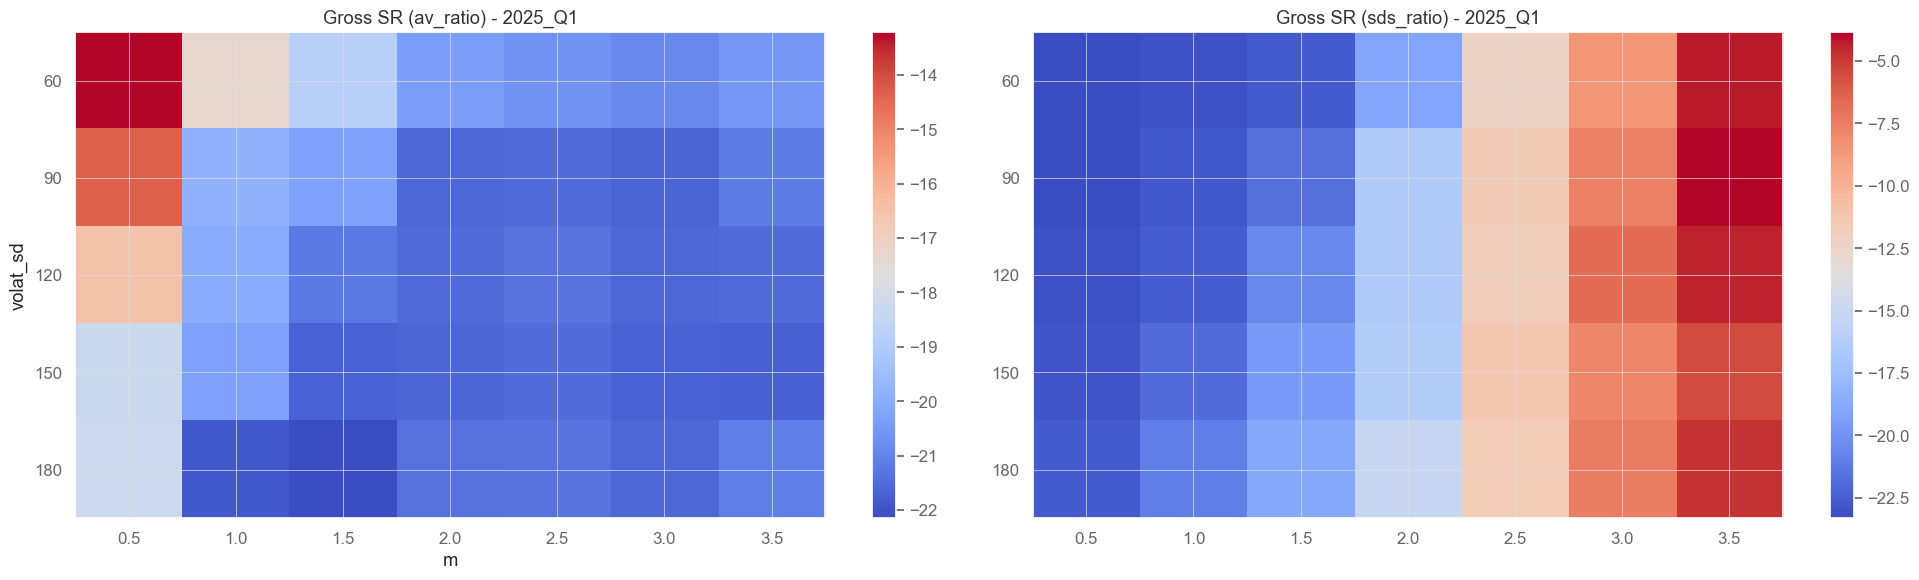

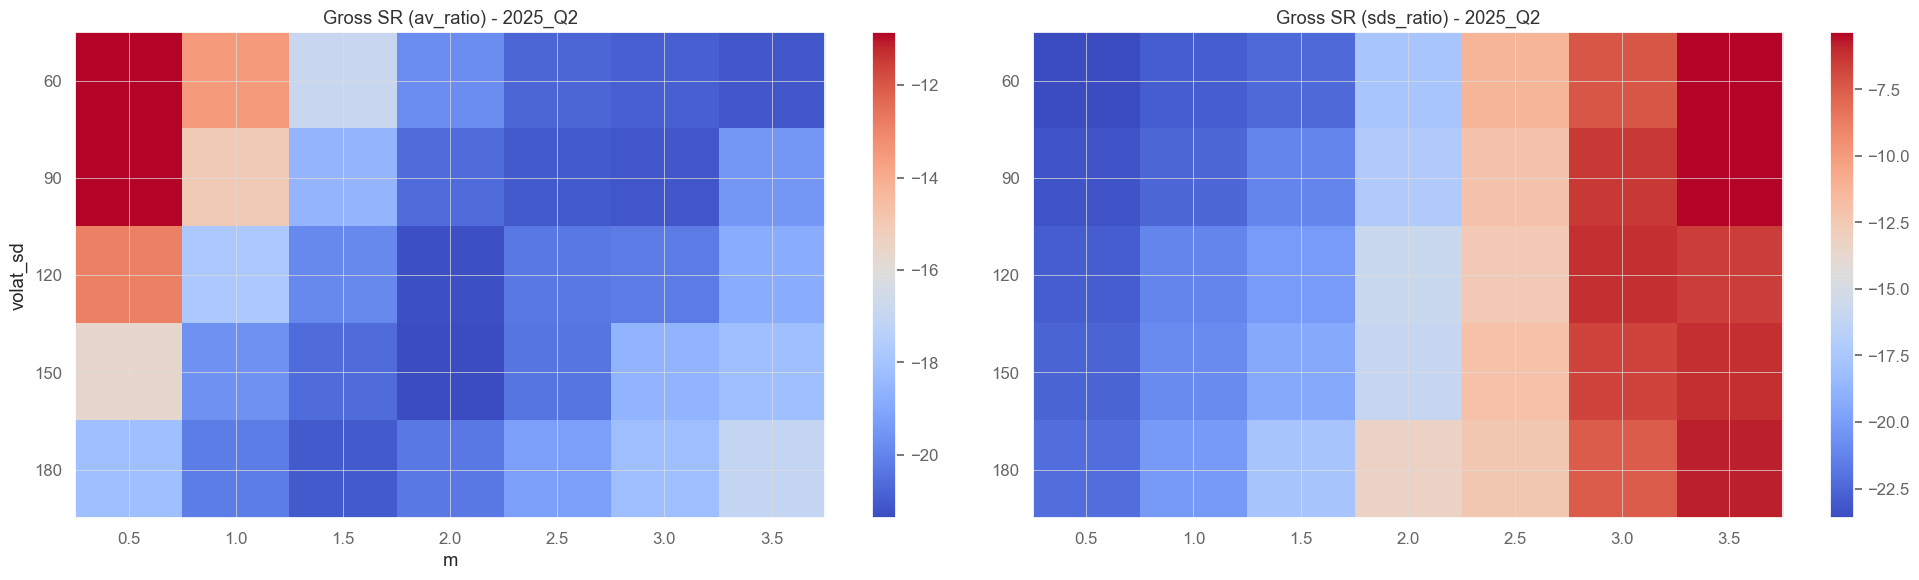

In [31]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_volatility[summary_all_volatility['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='volat_sd', columns='m', values='net_SR_avratio')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[0].set_title(f'Gross SR (av_ratio) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='volat_sd', columns='m', values='net_SR_sdsratio')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[1].set_title(f'Gross SR (sds_ratio) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

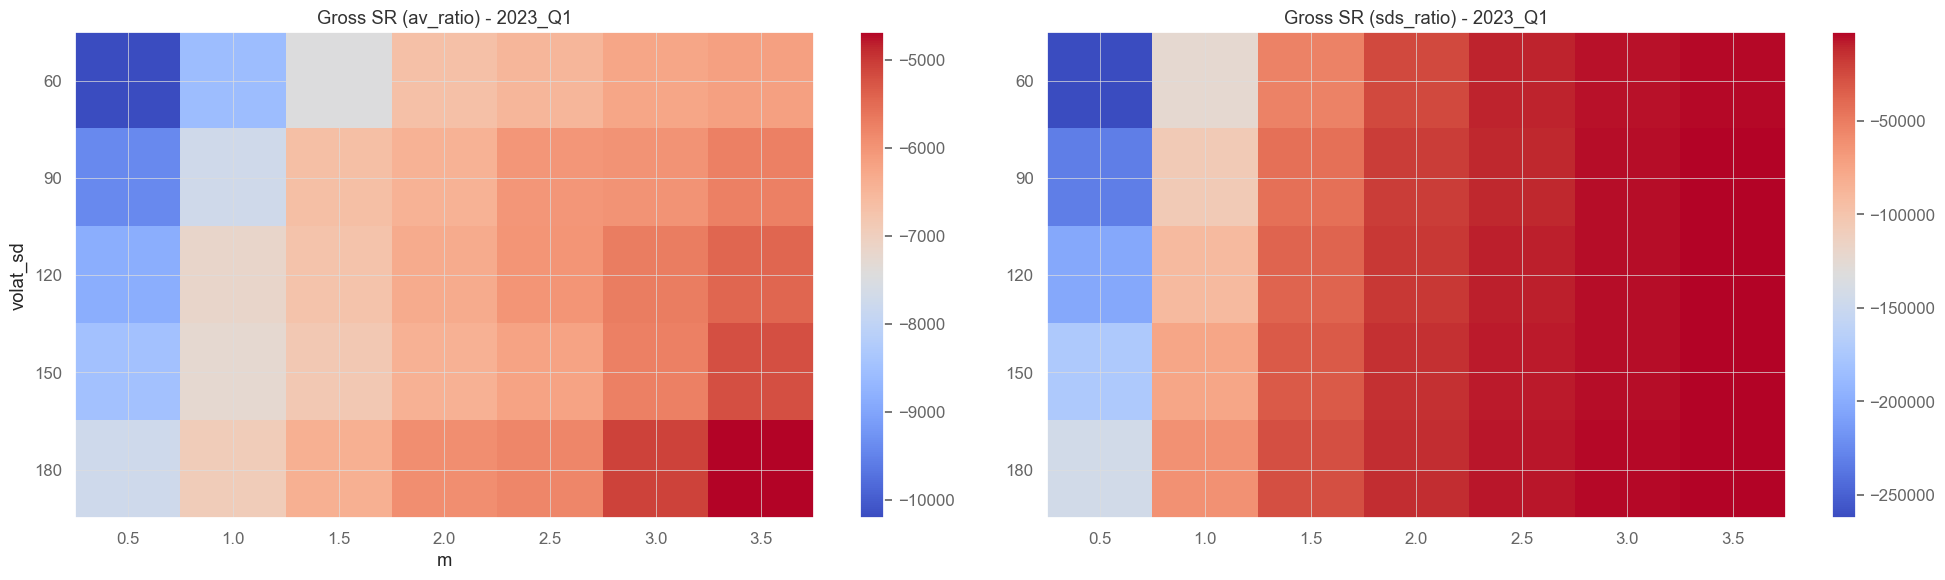

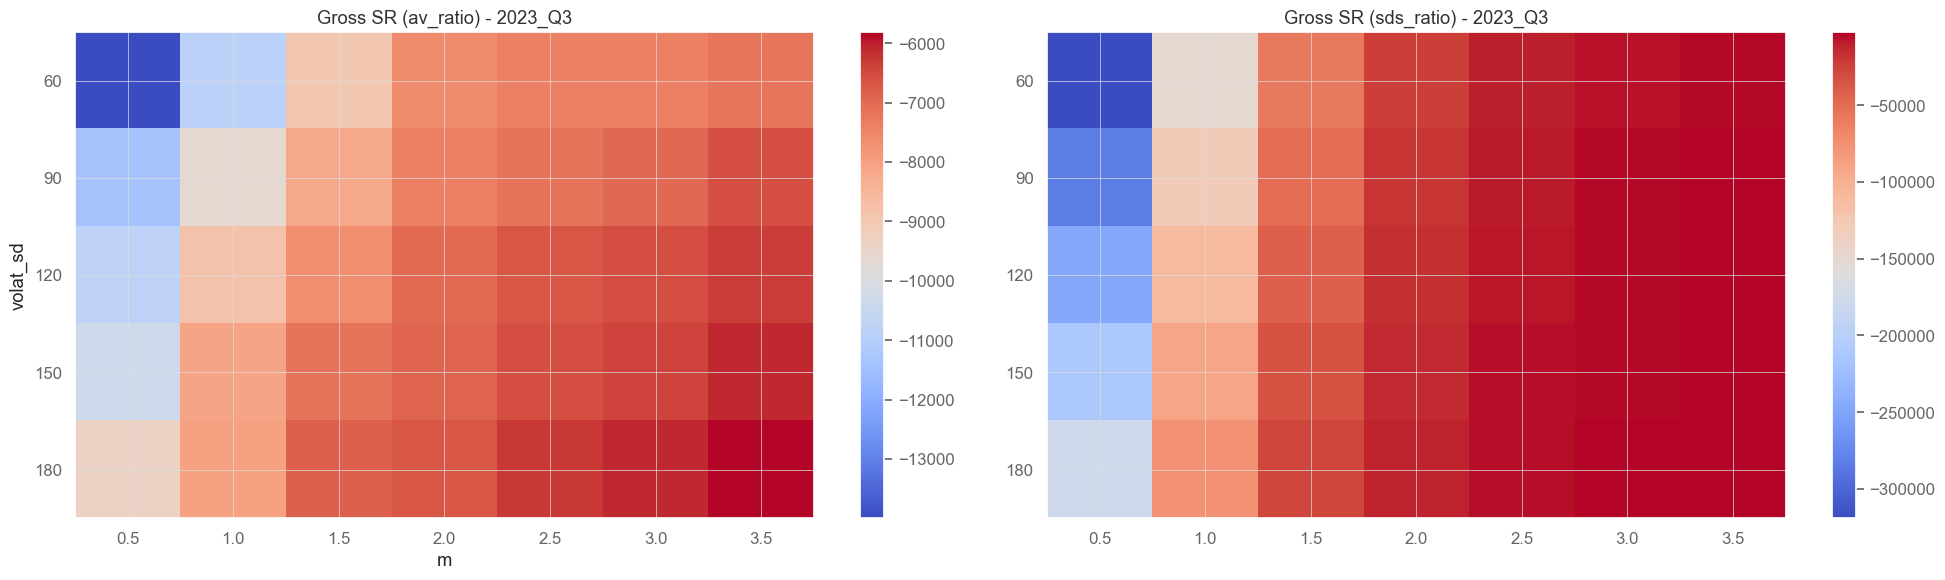

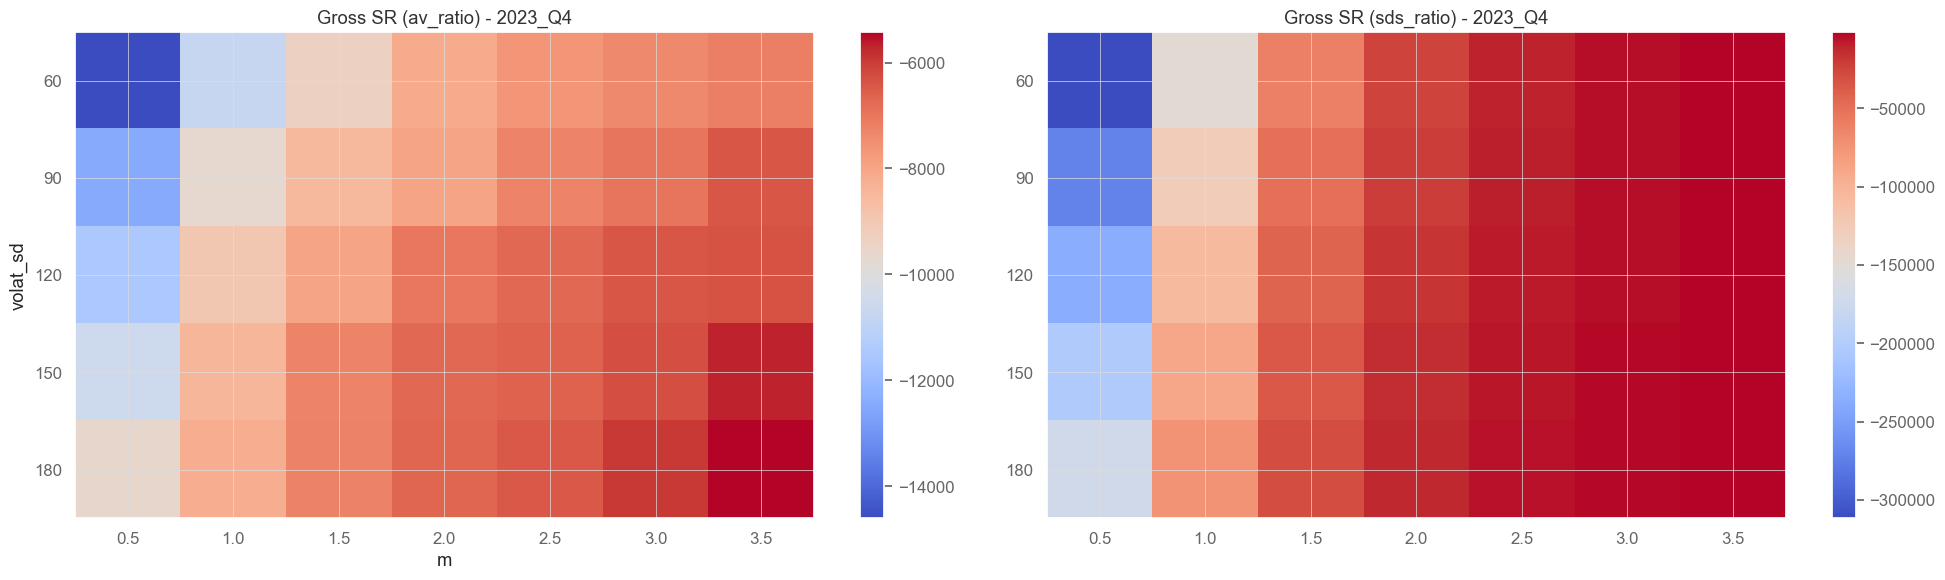

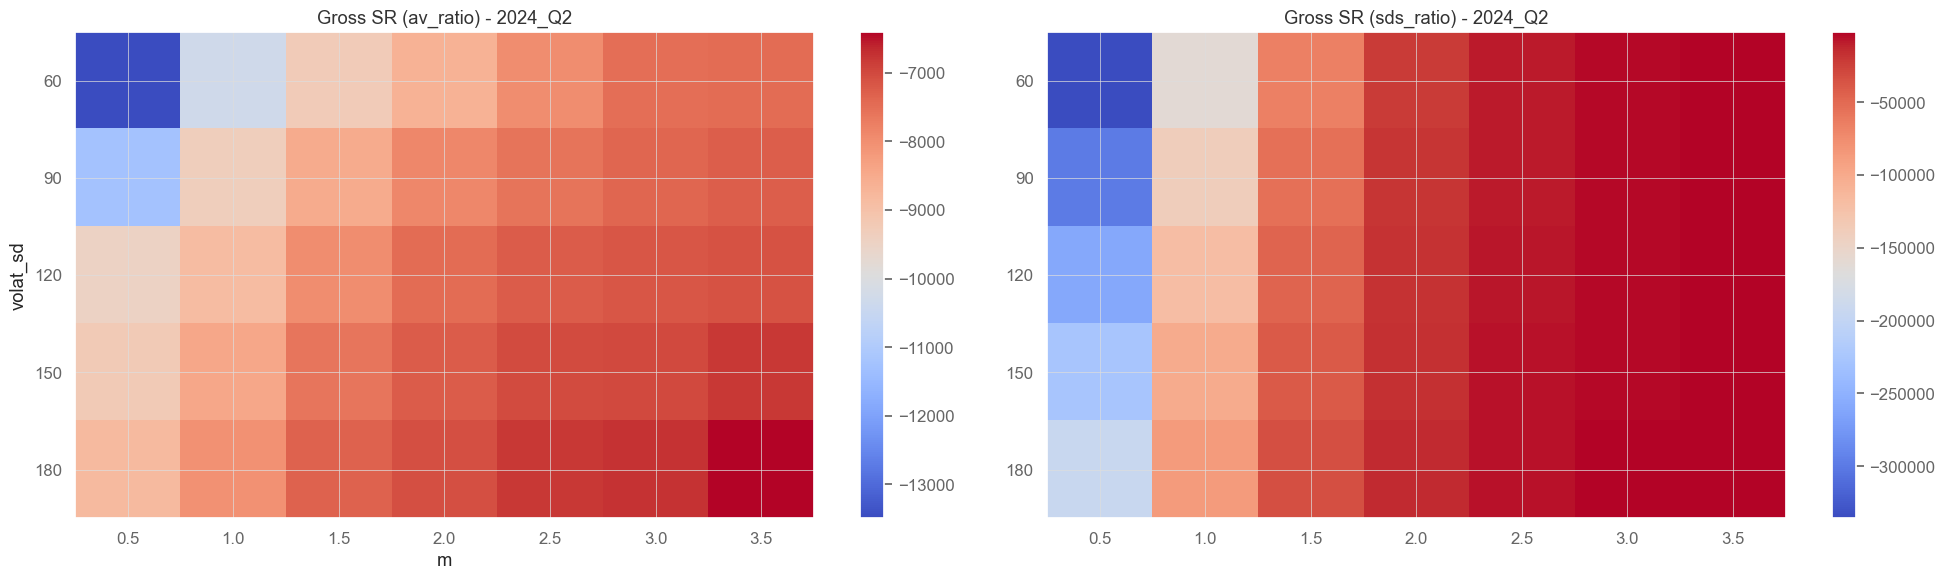

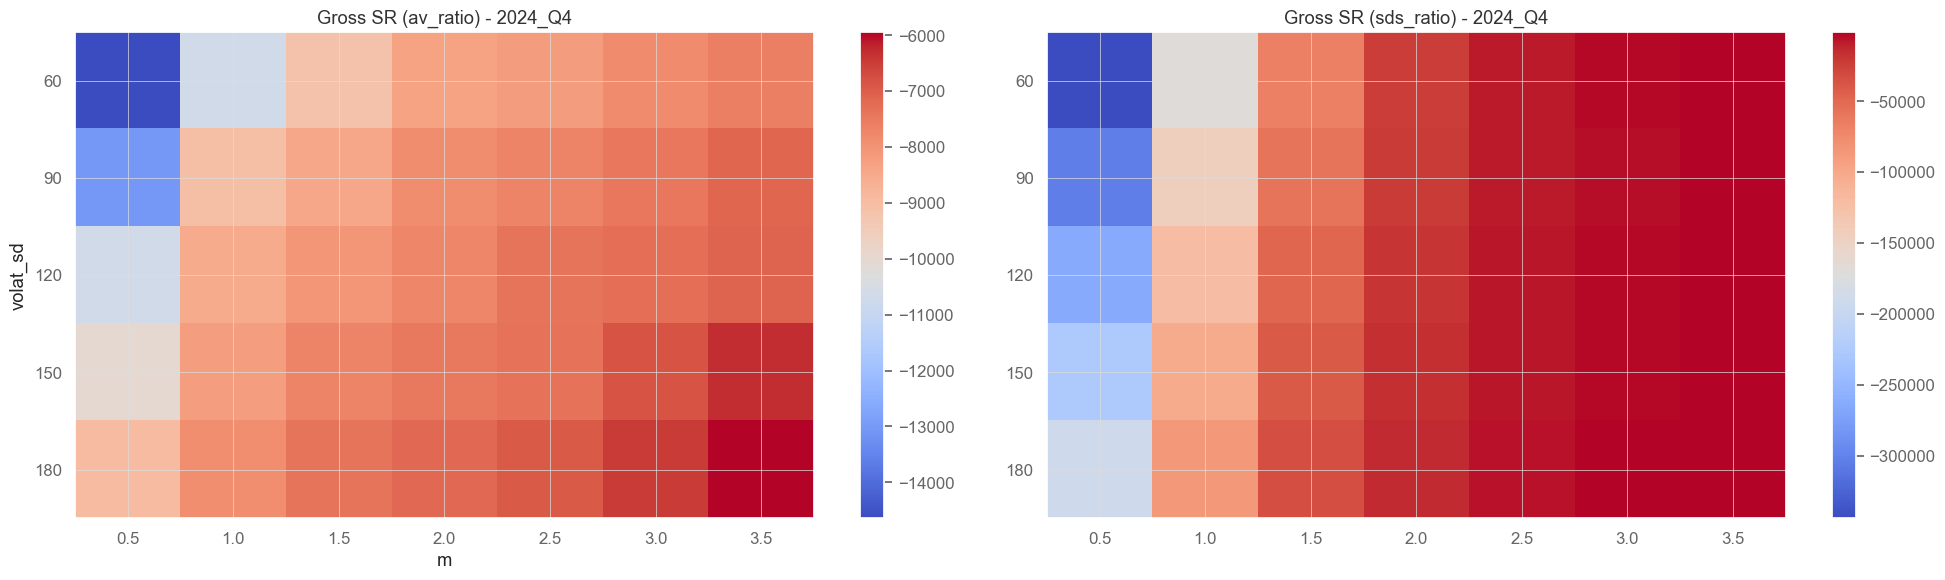

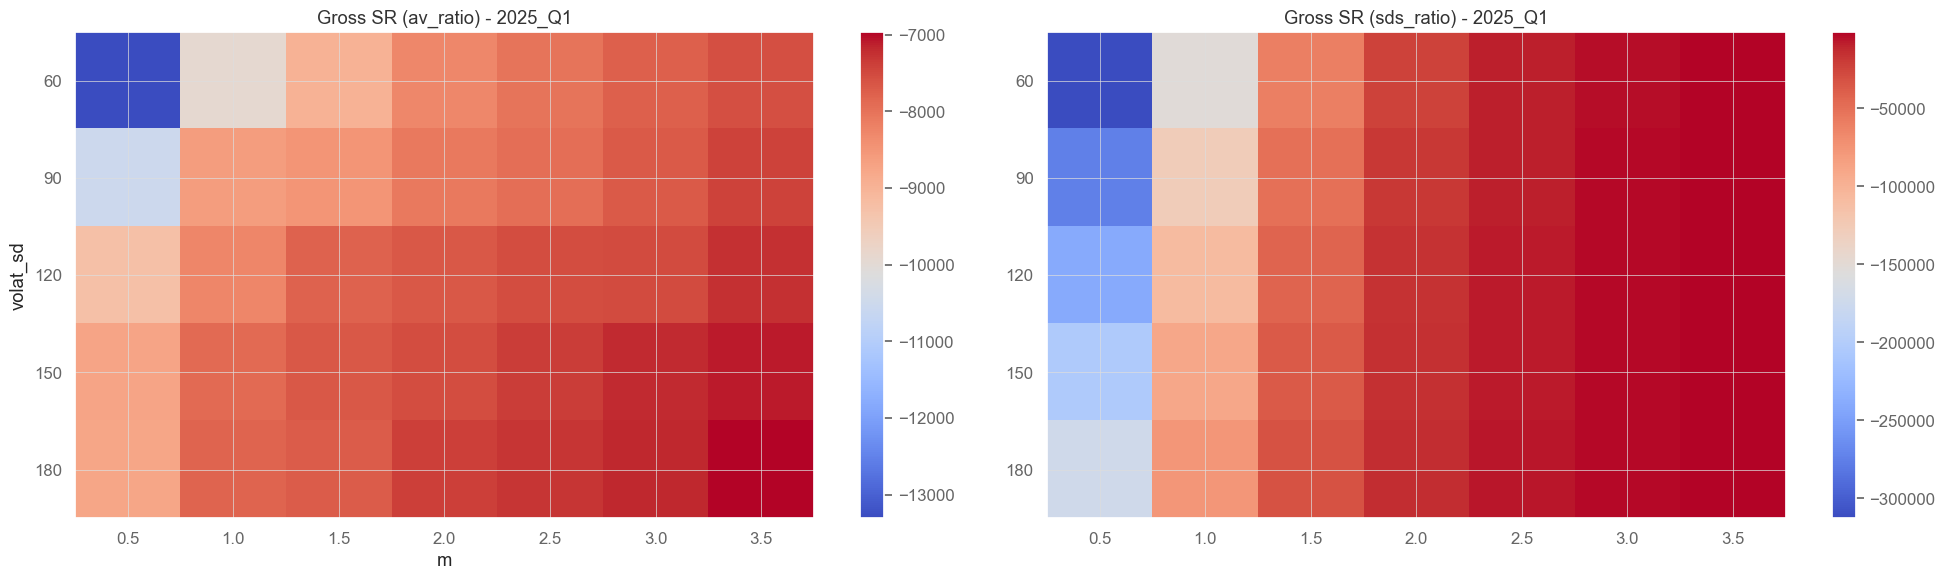

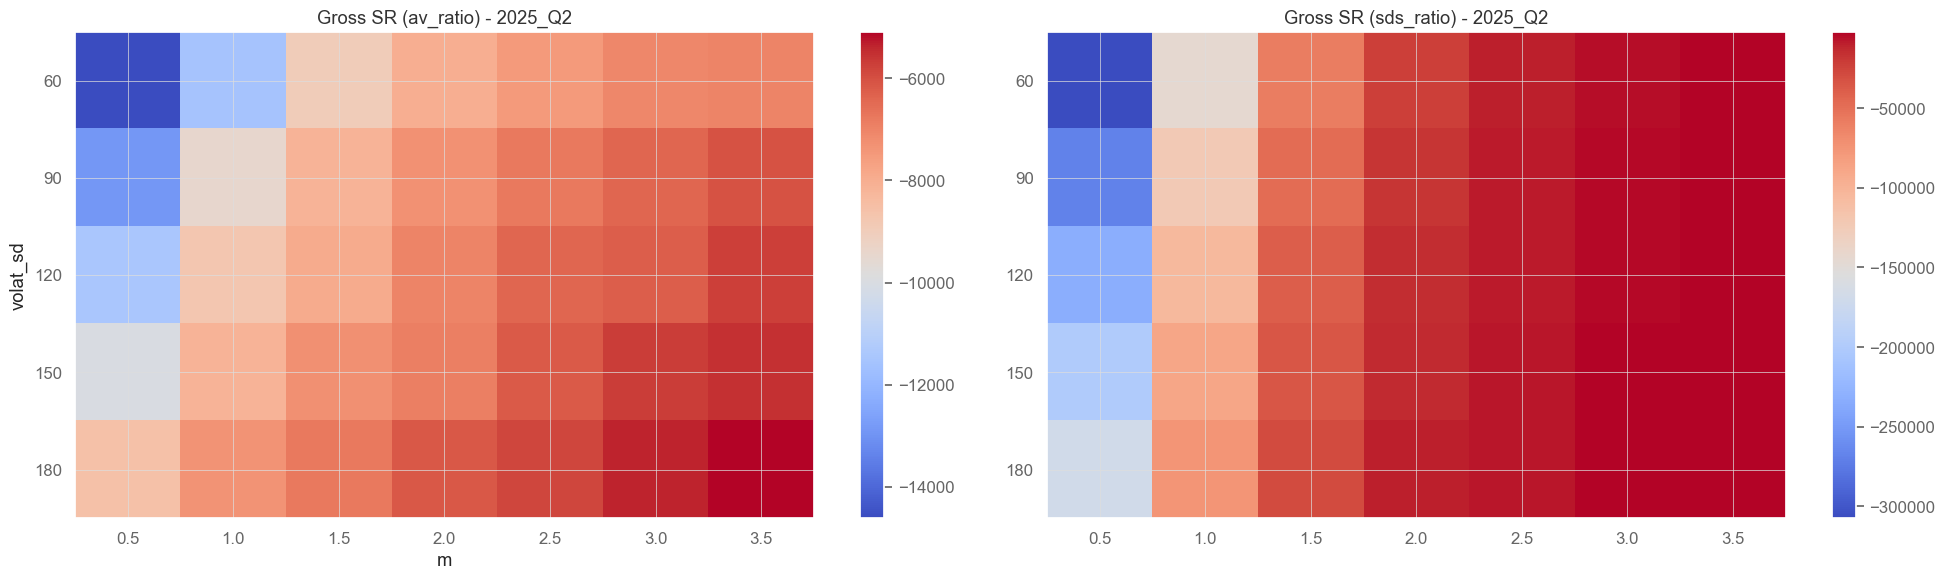

In [32]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_volatility[summary_all_volatility['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='volat_sd', columns='m', values='net_PnL_avratio')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[0].set_title(f'Gross SR (av_ratio) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='volat_sd', columns='m', values='net_PnL_sdsratio')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[1].set_title(f'Gross SR (sds_ratio) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

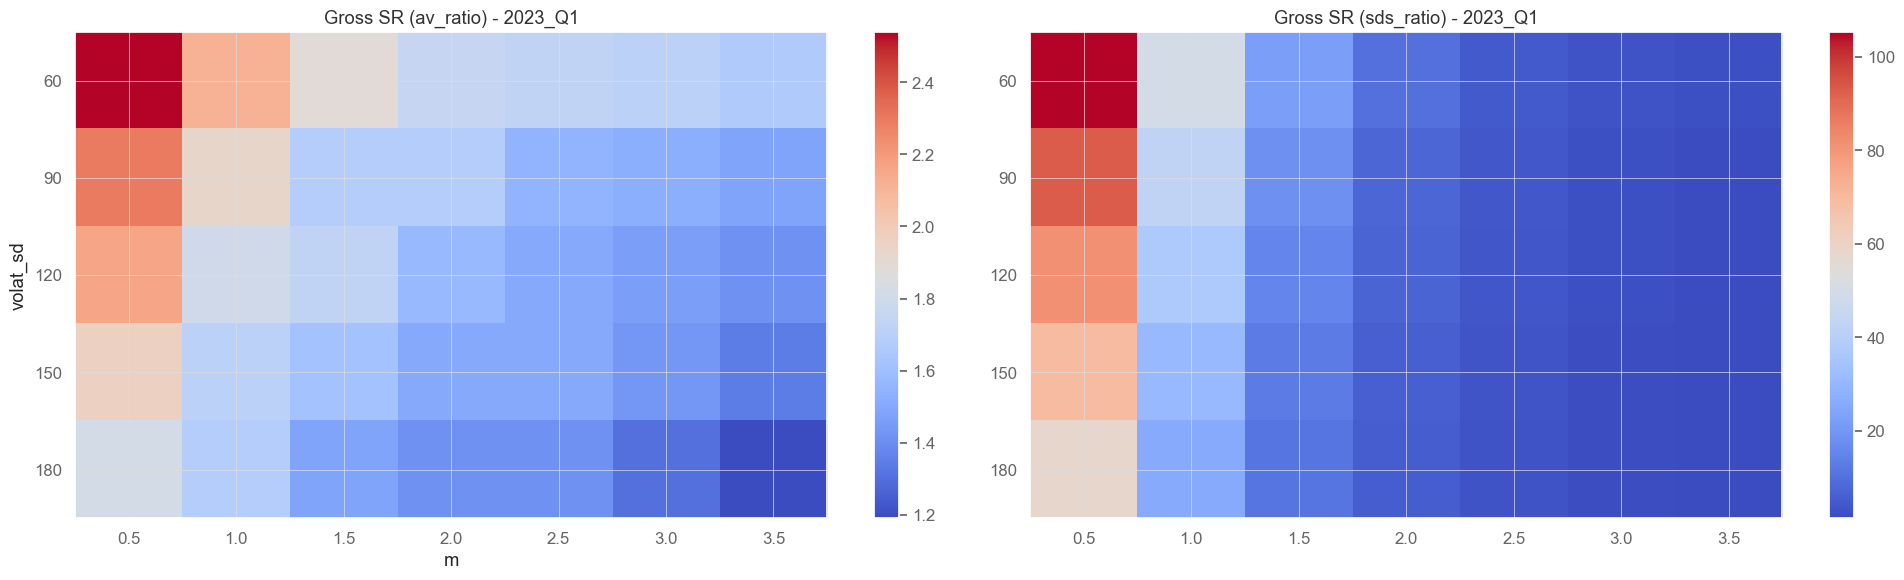

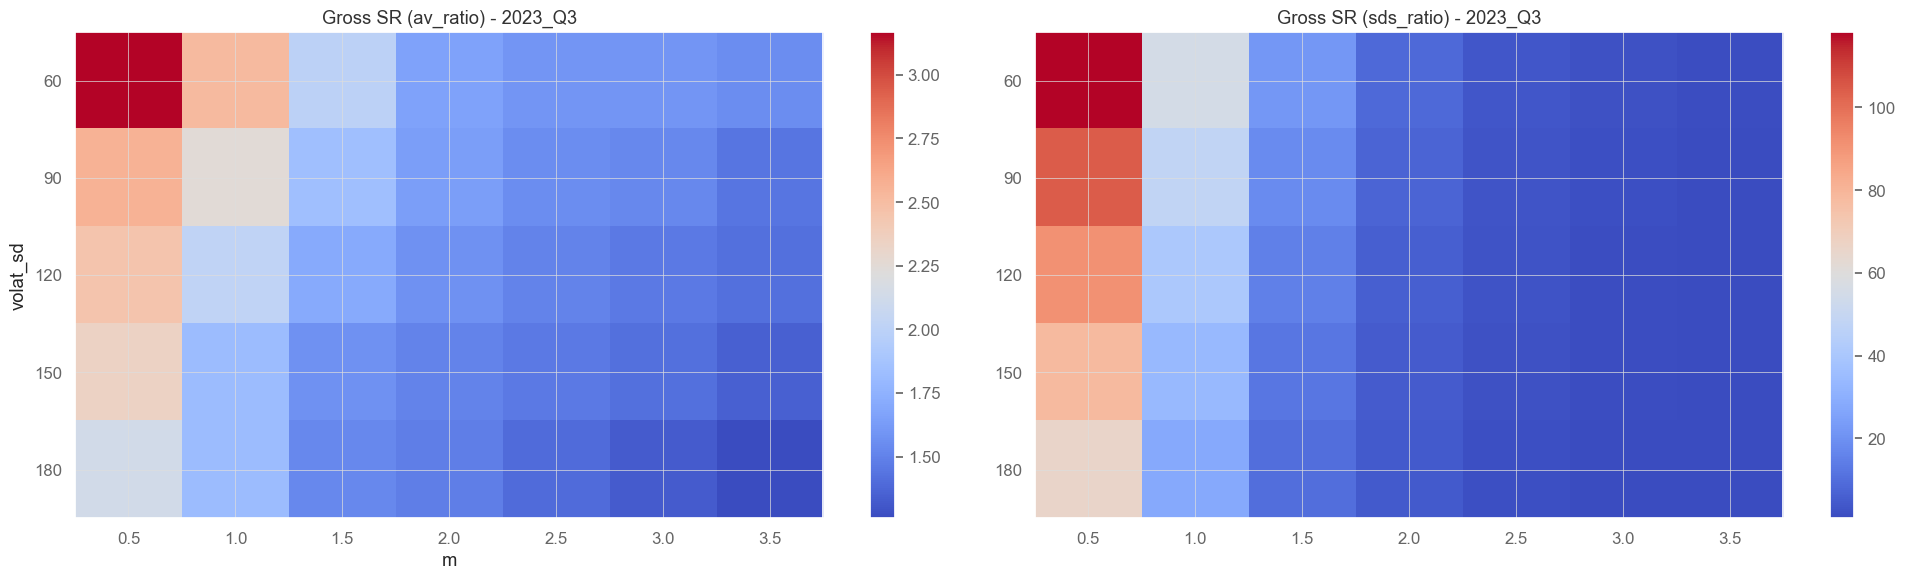

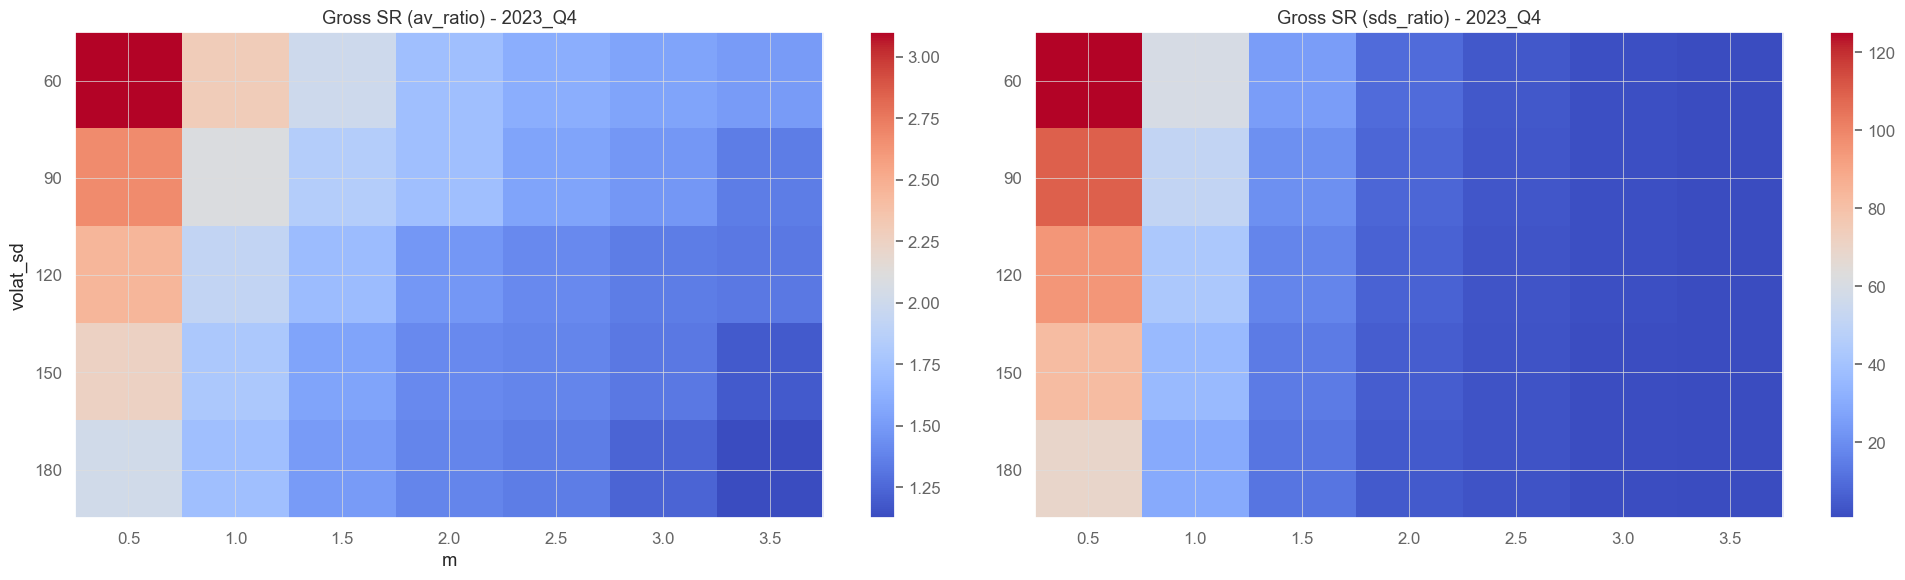

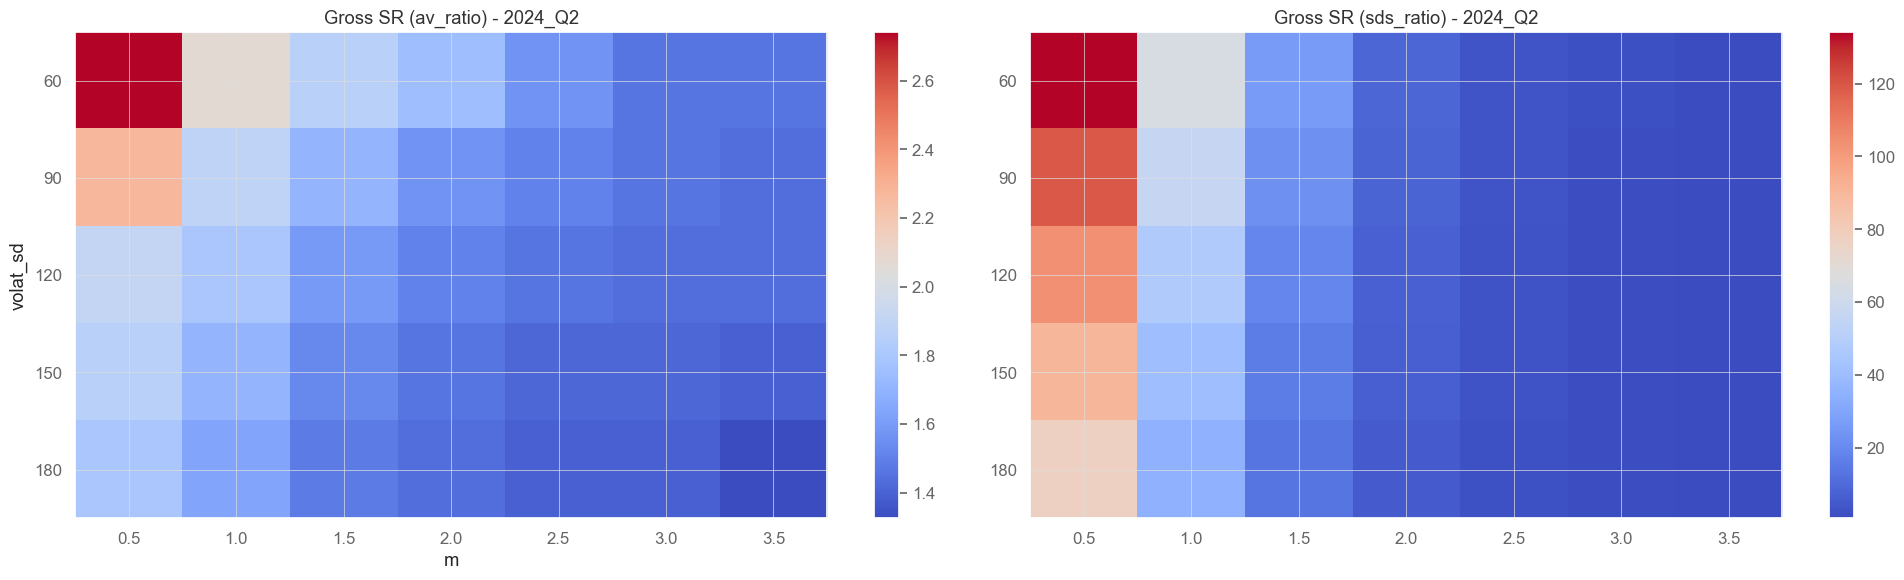

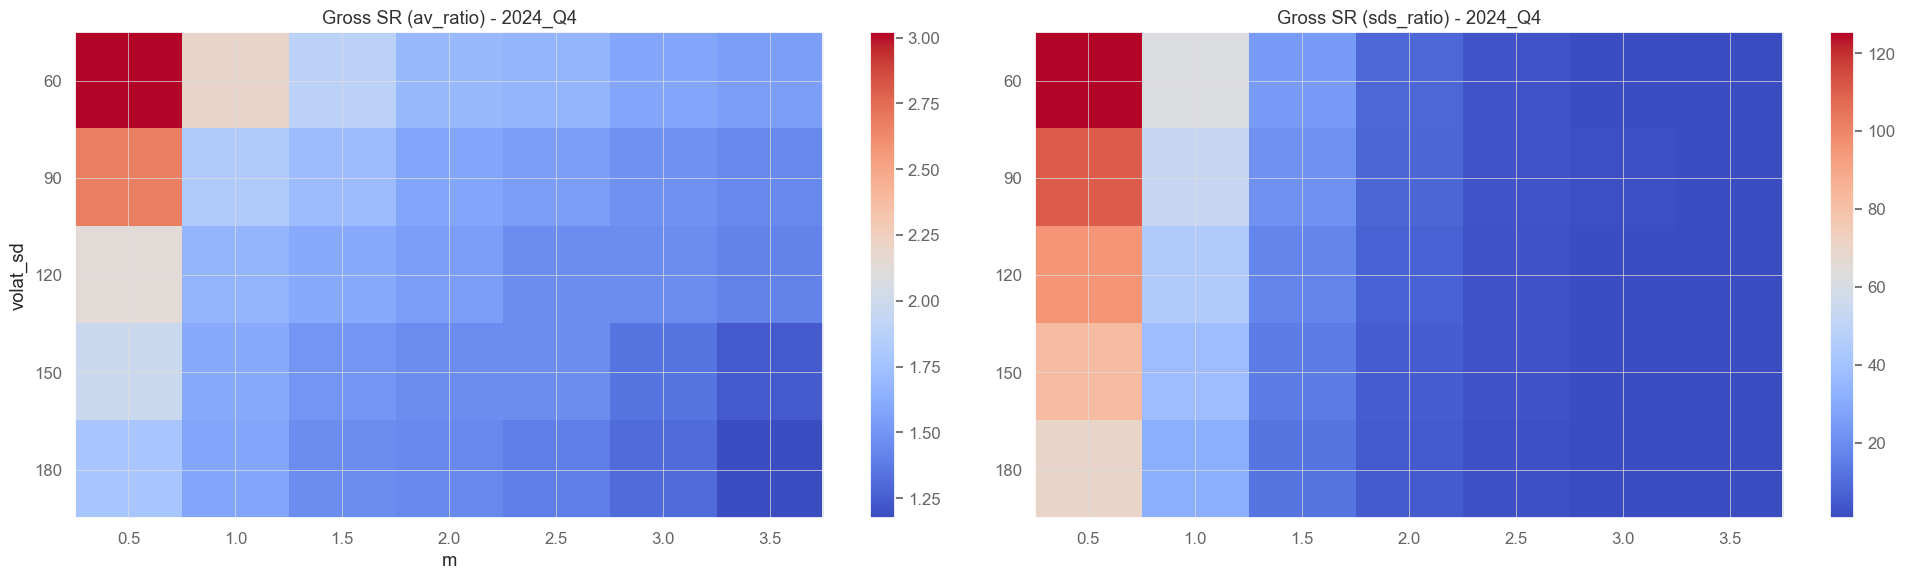

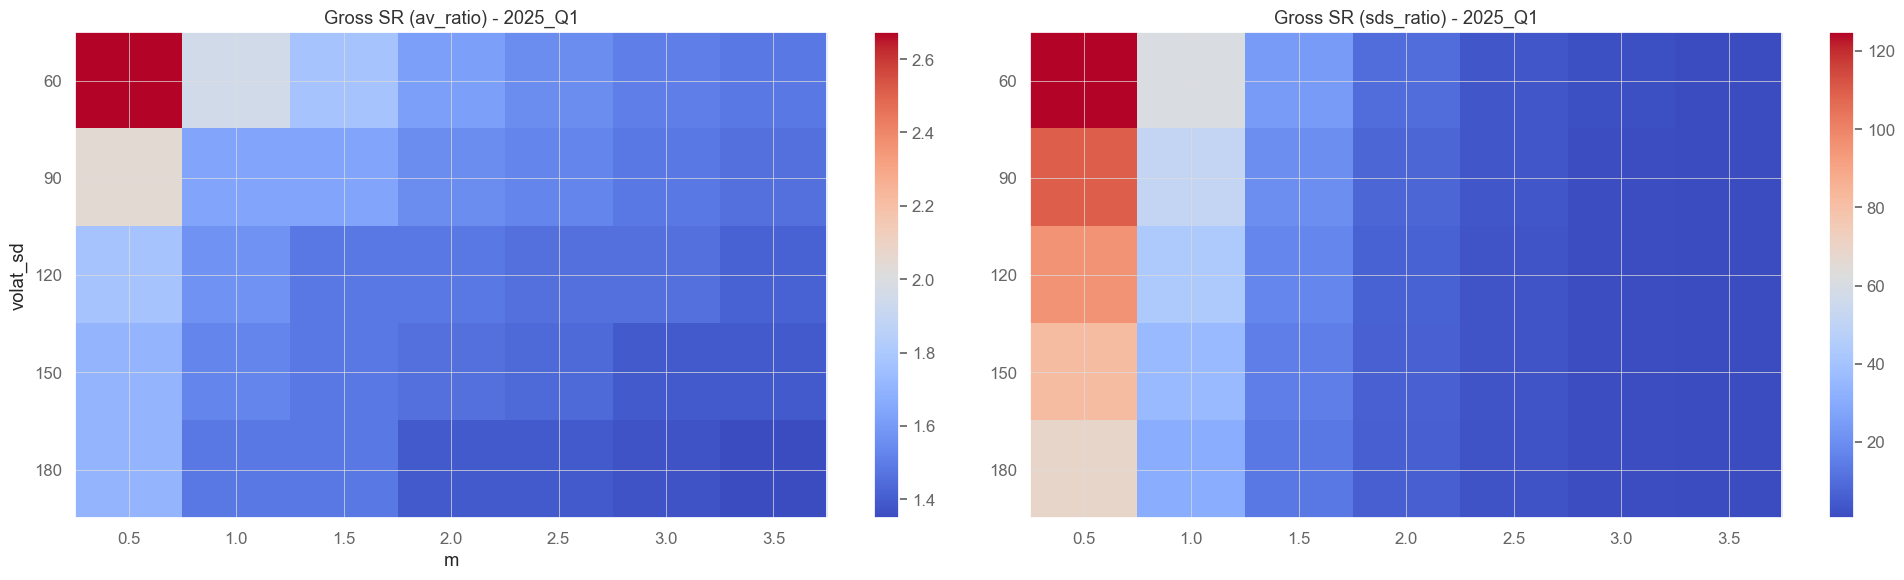

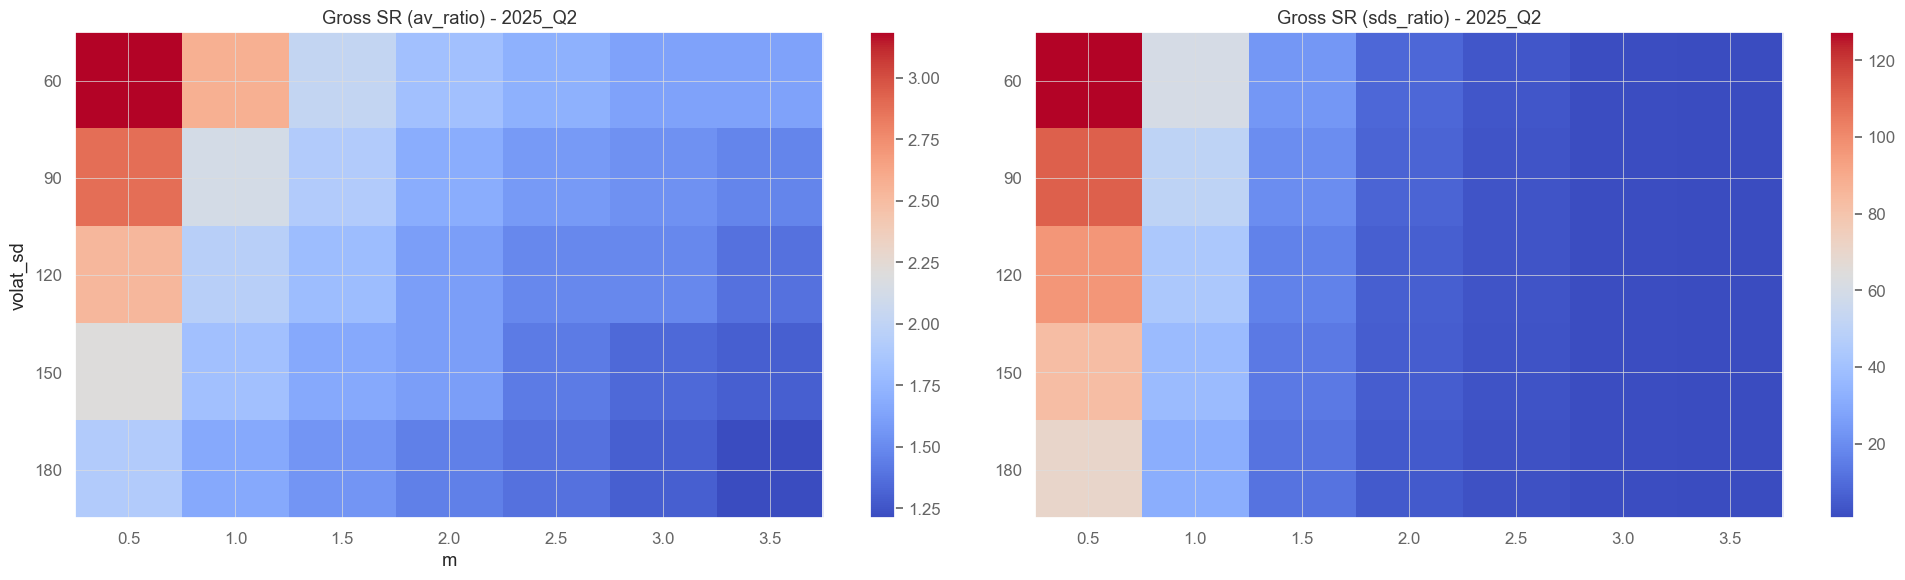

In [33]:
# Create separate heatmaps for each quarter
for quarter in quarters:
    quarter_data = summary_all_volatility[summary_all_volatility['quarter'] == quarter]
    
    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot momentum strategy heatmap
    quarter_data_pivot_mom = quarter_data.pivot(index='volat_sd', columns='m', values='av_daily_ntrans_avratio')
    im1 = axes[0].imshow(quarter_data_pivot_mom.values, cmap='coolwarm', aspect='auto')
    axes[0].set_xticks(range(len(quarter_data_pivot_mom.columns)))
    axes[0].set_yticks(range(len(quarter_data_pivot_mom.index)))
    axes[0].set_xticklabels(quarter_data_pivot_mom.columns)
    axes[0].set_yticklabels(quarter_data_pivot_mom.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[0].set_title(f'Gross SR (av_ratio) - {quarter}')
    plt.colorbar(im1, ax=axes[0])
    
    # Plot mean reversion strategy heatmap
    quarter_data_pivot_mr = quarter_data.pivot(index='volat_sd', columns='m', values='av_daily_ntrans_sdsratio')
    im2 = axes[1].imshow(quarter_data_pivot_mr.values, cmap='coolwarm', aspect='auto')
    axes[1].set_xticks(range(len(quarter_data_pivot_mr.columns)))
    axes[1].set_yticks(range(len(quarter_data_pivot_mr.index)))
    axes[1].set_xticklabels(quarter_data_pivot_mr.columns)
    axes[1].set_yticklabels(quarter_data_pivot_mr.index)
    axes[0].set_xlabel('m')
    axes[0].set_ylabel('volat_sd')
    axes[1].set_title(f'Gross SR (sds_ratio) - {quarter}')
    plt.colorbar(im2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

### Filtering
Correlation

In [34]:
# Calculate correlations for each quarter
correlation_results_by_quarter = []

for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter]
    
    # Calculate correlations for this quarter
    corr_p = quarter_data['NQ'].corr(quarter_data['SP'])
    corr_r = quarter_data['r_NQ'].corr(quarter_data['r_SP'])
    
    correlation_results_by_quarter.append({
        'Quarter': quarter,
        'Price_Correlation': corr_p,
        'Returns_Correlation': corr_r
    })
    
    print(f"\n{quarter}:")
    print(f"NQ and SP closing price correlation: {corr_p:.4f}")
    print(f"NQ and SP returns correlation: {corr_r:.4f}")

# Create a summary dataframe
correlation_summary_by_quarter = pd.DataFrame(correlation_results_by_quarter)
print("\n" + "="*50)
print("Summary of Correlations by Quarter:")
print(correlation_summary_by_quarter)


2023_Q1:
NQ and SP closing price correlation: 0.6385
NQ and SP returns correlation: 0.6752

2023_Q3:
NQ and SP closing price correlation: 0.9499
NQ and SP returns correlation: 0.7650

2023_Q4:
NQ and SP closing price correlation: 0.9964
NQ and SP returns correlation: 0.9245

2024_Q2:
NQ and SP closing price correlation: 0.9879
NQ and SP returns correlation: 0.9310

2024_Q4:
NQ and SP closing price correlation: 0.9135
NQ and SP returns correlation: 0.8972

2025_Q1:
NQ and SP closing price correlation: 0.9884
NQ and SP returns correlation: 0.9555

2025_Q2:
NQ and SP closing price correlation: 0.9956
NQ and SP returns correlation: 0.9504

Summary of Correlations by Quarter:
   Quarter  Price_Correlation  Returns_Correlation
0  2023_Q1           0.638522             0.675176
1  2023_Q3           0.949869             0.765003
2  2023_Q4           0.996396             0.924534
3  2024_Q2           0.987854             0.930978
4  2024_Q4           0.913486             0.897176
5  2025_Q1   

In [35]:
import warnings

warnings.filterwarnings('ignore')


2023_Q1:
Daily Price Correlation - Mean: 0.7826, Std: 0.3129
Daily Returns Correlation - Mean: 0.6516, Std: 0.4025


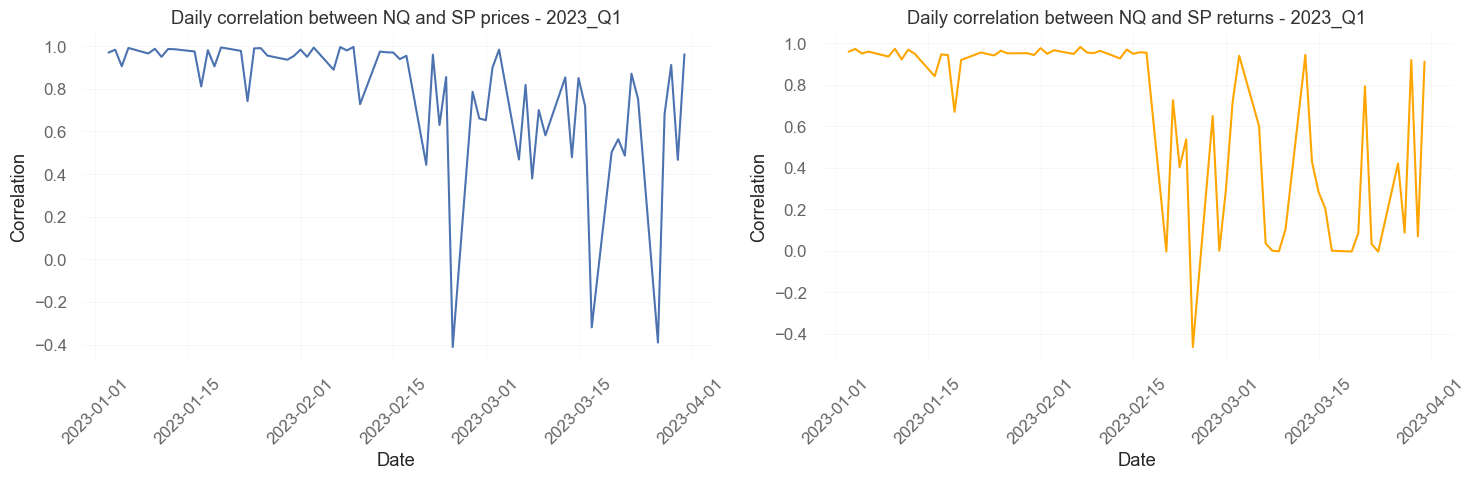


2023_Q3:
Daily Price Correlation - Mean: 0.8331, Std: 0.2147
Daily Returns Correlation - Mean: 0.7428, Std: 0.3191


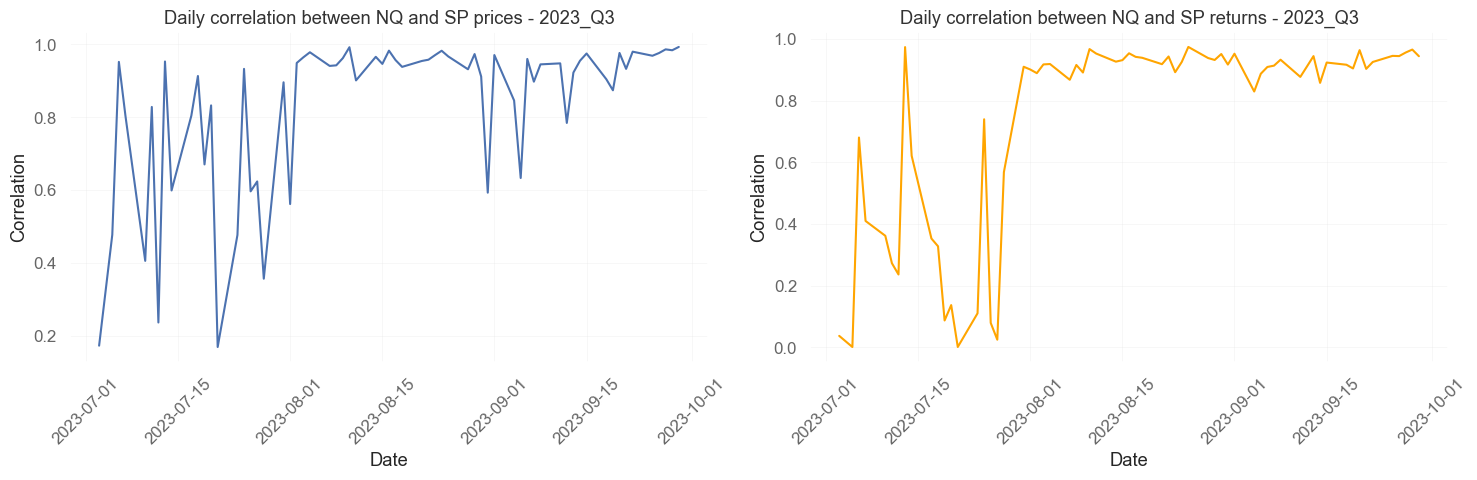


2023_Q4:
Daily Price Correlation - Mean: 0.9339, Std: 0.1187
Daily Returns Correlation - Mean: 0.9098, Std: 0.0421


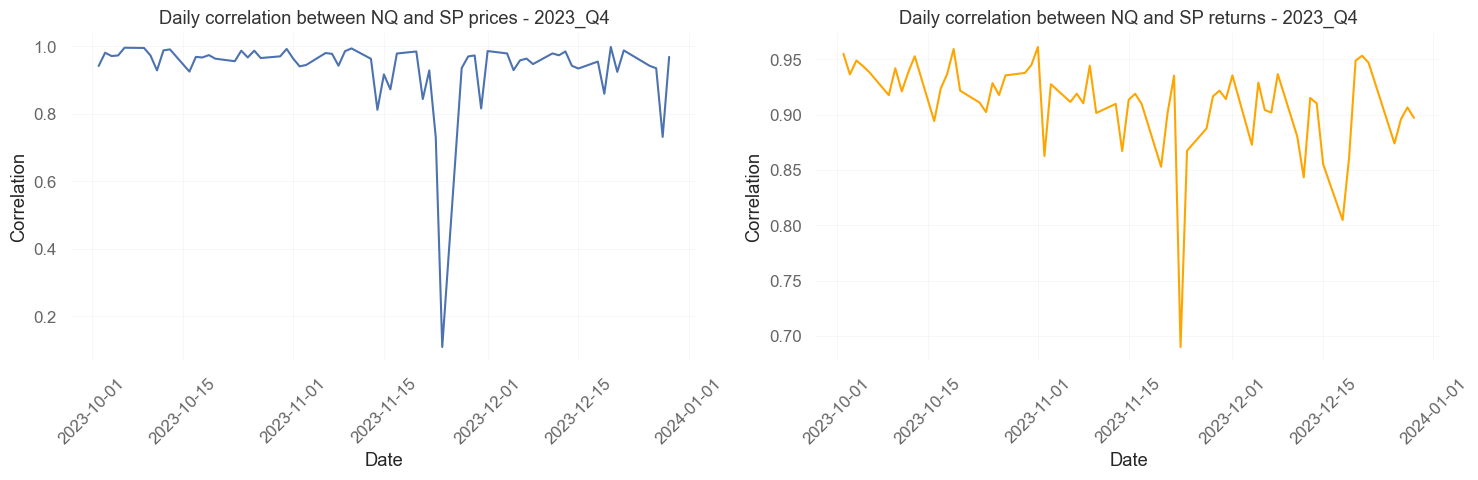


2024_Q2:
Daily Price Correlation - Mean: 0.9155, Std: 0.1235
Daily Returns Correlation - Mean: 0.9160, Std: 0.0451


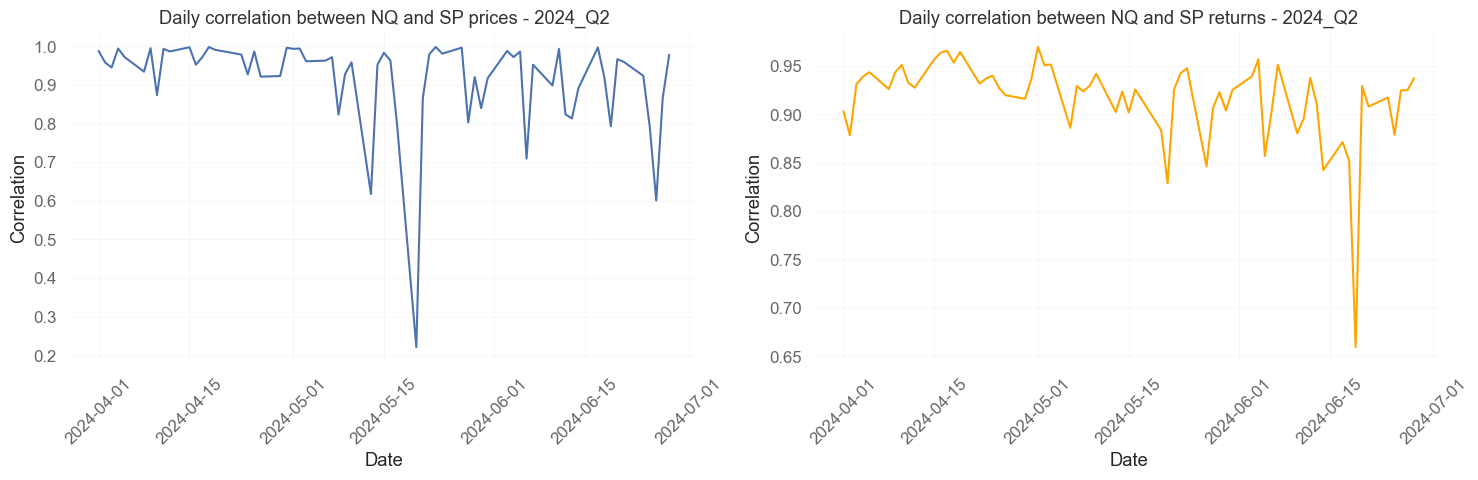


2024_Q4:
Daily Price Correlation - Mean: 0.8736, Std: 0.2002
Daily Returns Correlation - Mean: 0.8670, Std: 0.0951


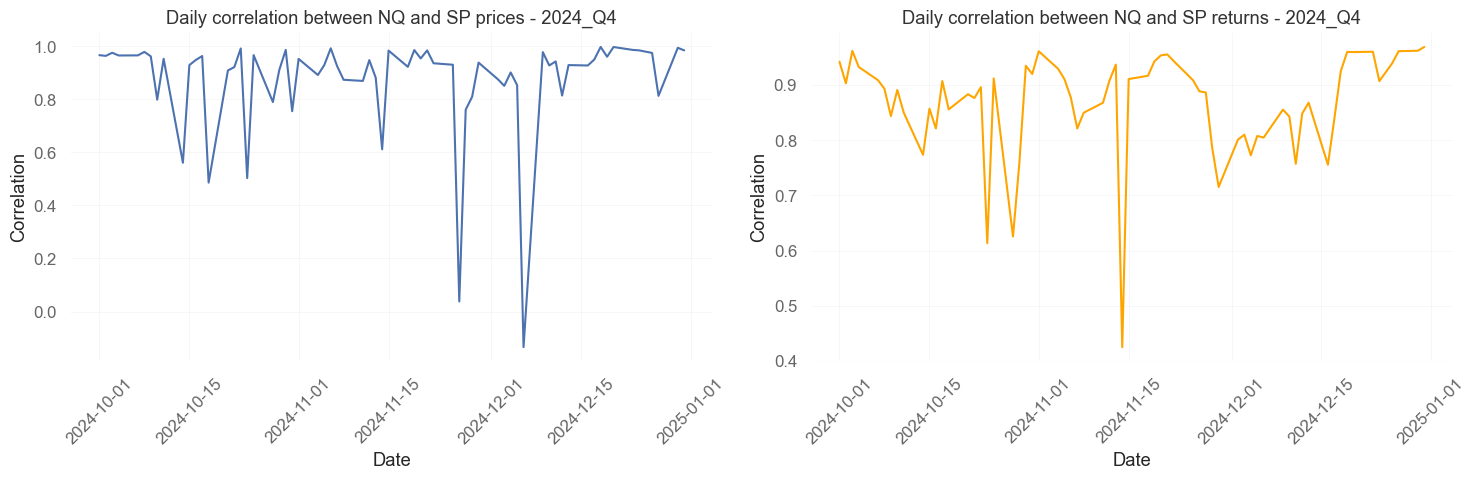


2025_Q1:
Daily Price Correlation - Mean: 0.9405, Std: 0.0975
Daily Returns Correlation - Mean: 0.9359, Std: 0.0422


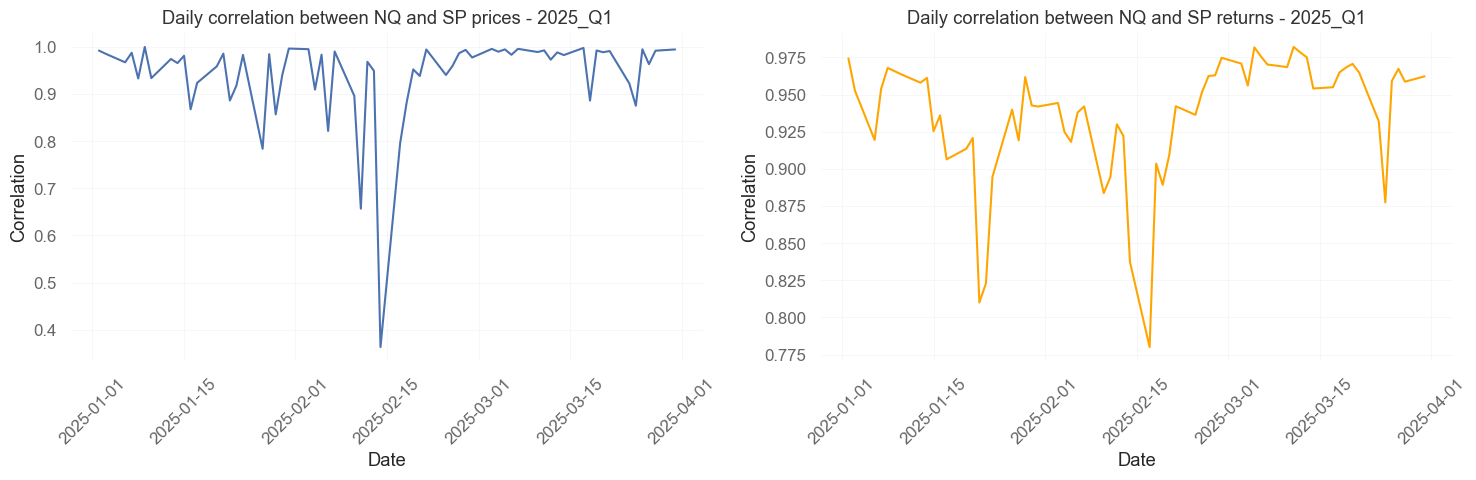


2025_Q2:
Daily Price Correlation - Mean: 0.9530, Std: 0.0661
Daily Returns Correlation - Mean: 0.9517, Std: 0.0293


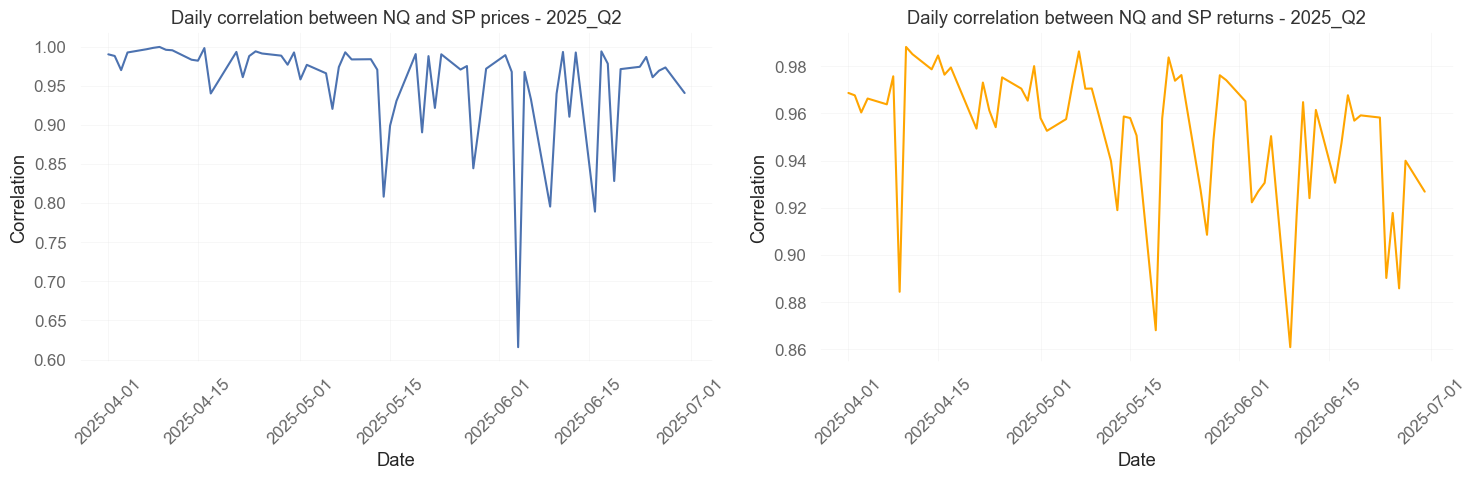


Daily correlations saved to 'data/daily_correlations_all_quarters.parquet'
Total rows: 449

Summary by quarter:
        correlation_prices                                                    \
                     count      mean       std       min       25%       50%   
quarter                                                                        
2023_Q1               64.0  0.782622  0.312873 -0.411662  0.695902  0.909206   
2023_Q3               64.0  0.833094  0.214690  0.169006  0.803694  0.939239   
2023_Q4               64.0  0.933940  0.118705  0.109110  0.935054  0.965597   
2024_Q2               65.0  0.915530  0.123490  0.220854  0.898260  0.959482   
2024_Q4               65.0  0.873575  0.200240 -0.134060  0.873755  0.935954   
2025_Q1               63.0  0.940463  0.097458  0.363143  0.928401  0.977592   
2025_Q2               64.0  0.952977  0.066095  0.615913  0.940463  0.974578   

                            correlation_returns                                \
     

In [36]:
# Calculate daily correlations for each quarter separately
all_correlation_results = []

for quarter in quarters:
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter]
    
    # Calculate daily correlations for this quarter
    correlation_p_daily = quarter_data.resample("D").apply(lambda x: x['NQ'].corr(x['SP']))
    correlation_r_daily = quarter_data.resample("D").apply(lambda x: x['r_NQ'].corr(x['r_SP']))
    
    # Drop NaN values
    correlation_p_daily = correlation_p_daily.dropna()
    correlation_r_daily = correlation_r_daily.dropna()
    
    # Create a DataFrame with quarter indicator
    quarter_correlations = pd.DataFrame({
        'correlation_prices': correlation_p_daily,
        'correlation_returns': correlation_r_daily,
        'quarter': quarter
    })
    
    all_correlation_results.append(quarter_correlations)
    
    print(f"\n{quarter}:")
    print(f"Daily Price Correlation - Mean: {correlation_p_daily.mean():.4f}, Std: {correlation_p_daily.std():.4f}")
    print(f"Daily Returns Correlation - Mean: {correlation_r_daily.mean():.4f}, Std: {correlation_r_daily.std():.4f}")

    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot price correlation
    axes[0].plot(correlation_p_daily.index, correlation_p_daily.values)
    axes[0].set_title(f"Daily correlation between NQ and SP prices - {quarter}")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Correlation")
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Plot returns correlation
    axes[1].plot(correlation_r_daily.index, correlation_r_daily.values, color='orange')
    axes[1].set_title(f"Daily correlation between NQ and SP returns - {quarter}")
    axes[1].set_xlabel("Date")
    axes[1].set_ylabel("Correlation")
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Combine all quarters into one DataFrame
daily_correlations = pd.concat(all_correlation_results, axis=0)

# Save to file
daily_correlations.to_parquet('data/daily_correlations_all_quarters.parquet')
print("\n" + "="*50)
print("Daily correlations saved to 'data/daily_correlations_all_quarters.parquet'")
print(f"Total rows: {len(daily_correlations)}")
print("\nSummary by quarter:")
print(daily_correlations.groupby('quarter')[['correlation_prices', 'correlation_returns']].describe())

In [37]:
daily_correlations

correlation_prices  correlation_returns  quarter
datetime                                                                   
2023-01-03 00:00:00+00:00            0.970507             0.958658  2023_Q1
2023-01-04 00:00:00+00:00            0.983934             0.972111  2023_Q1
2023-01-05 00:00:00+00:00            0.906305             0.950317  2023_Q1
2023-01-06 00:00:00+00:00            0.992222             0.959272  2023_Q1
2023-01-09 00:00:00+00:00            0.966129             0.935449  2023_Q1
...                                       ...                  ...      ...
2025-06-24 00:00:00+00:00            0.986663             0.890262  2025_Q2
2025-06-25 00:00:00+00:00            0.960795             0.917823  2025_Q2
2025-06-26 00:00:00+00:00            0.969141             0.885866  2025_Q2
2025-06-27 00:00:00+00:00            0.973245             0.939959  2025_Q2
2025-06-30 00:00:00+00:00            0.940608             0.926855  2025_Q2

[449 rows x 3 columns]

Regression 

In [38]:
# Lets calculate the regression coefficient between prices P1 and P2
# for the whole sample

import statsmodels.api as sm

# the OLS regression requires dropping NaN values

all_data_2_nonan = all_data_2.dropna(subset=["NQ", 'SP', 'r_NQ', 'r_SP'])

X = all_data_2_nonan["NQ"]
y = all_data_2_nonan["SP"]
X = sm.add_constant(X)  # adding a constant term for intercept
model_ols = sm.OLS(y, X).fit()

print(model_ols.summary())

# the coefficient is negative (-0.1365)
# R2 = 0.098

                            OLS Regression Results                            
Dep. Variable:                     SP   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 6.753e+06
Date:                Sun, 18 Jan 2026   Prob (F-statistic):               0.00
Time:                        00:03:11   Log-Likelihood:            -1.0276e+06
No. Observations:              166436   AIC:                         2.055e+06
Df Residuals:                  166434   BIC:                         2.055e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1097.7693      1.568    700.146      0.0

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def regression_selected(df, y_col, x_col, add_const=True):

    # If the group is empty return NaNs
    if df.empty:
        return pd.Series({
            'beta': np.nan,
            'pvalue': np.nan,
            'tstat': np.nan,
            'r2': np.nan
        })

    y = df[y_col]
    X = df[[x_col]]  # keep as DataFrame

    if add_const:
        X = sm.add_constant(X)
        x_param_name = x_col      # slope name in params/pvalues/etc.
    else:
        x_param_name = x_col      # only column present

    model = sm.OLS(y, X).fit()

    return pd.Series({
        'beta':   model.params[x_param_name],
        'pvalue': model.pvalues[x_param_name],
        'tstat':  model.tvalues[x_param_name],
        'r2':     model.rsquared
    })

In [40]:
# Calculate regression for each quarter separately
regression_results_by_quarter = []
daily_regressions_P_all = []
daily_regressions_R_all = []

for quarter in quarters:
    print(f"Processing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter].copy()
    
    # Drop NaN values for regression
    quarter_data_clean = quarter_data.dropna(subset=['NQ', 'SP'])

    daily_regressions_P = quarter_data_clean.resample("D").apply(
        lambda x: regression_selected(x, y_col='SP', x_col='NQ', add_const=True)
    ).dropna()

    daily_regressions_R = quarter_data_clean.resample("D").apply(
        lambda x: regression_selected(x, y_col='r_SP', x_col='r_NQ', add_const=True)
    ).dropna()

    daily_regressions_P['quarter'] = quarter
    daily_regressions_R['quarter'] = quarter

    daily_regressions_P_all.append(daily_regressions_P)
    daily_regressions_R_all.append(daily_regressions_R)

# Create summary dataframe
daily_regressions_P_all = pd.DataFrame(pd.concat(daily_regressions_P_all))
daily_regressions_R_all = pd.DataFrame(pd.concat(daily_regressions_R_all))

print("\n" + "="*50)
print("Summary of Regression Results by Quarter:")
print(daily_regressions_P_all)
print(daily_regressions_R_all)

Processing quarter: 2023_Q1
Processing quarter: 2023_Q3
Processing quarter: 2023_Q4
Processing quarter: 2024_Q2
Processing quarter: 2024_Q4
Processing quarter: 2025_Q1
Processing quarter: 2025_Q2

Summary of Regression Results by Quarter:
                               beta         pvalue       tstat        r2  \
datetime                                                                   
2023-01-03 00:00:00+00:00  0.252374  1.824487e-229   77.228468  0.941885   
2023-01-04 00:00:00+00:00  0.289548  1.818228e-277  105.722413  0.968125   
2023-01-05 00:00:00+00:00  0.278542  1.028494e-139   41.138133  0.821389   
2023-01-06 00:00:00+00:00  0.234559   0.000000e+00  152.911285  0.984505   
2023-01-09 00:00:00+00:00  0.290785  1.400165e-218   71.819131  0.933406   
...                             ...            ...         ...       ...   
2025-06-24 00:00:00+00:00  0.239589  3.072624e-292  116.280993  0.973505   
2025-06-25 00:00:00+00:00  0.167965  4.161615e-207   66.476037  0.923126   
2

Cointegration

In [41]:
# lets use PP and KPSS tests for cointegration
# based on the functions from lab03
# extended to control for empty dataframes

from arch.unitroot import PhillipsPerron, KPSS

# the function to get residuals from OLS regression
def _eg_residuals(df: pd.DataFrame, col1: str, col2: str):
    X = sm.add_constant(df[col1].values, has_constant="add")
    y = df[col2].values
    model = sm.OLS(y, X).fit()
    return model.resid

# the function for PP p-value
def eg_pp_pvalue(df: pd.DataFrame, col1: str, col2: str, 
                 trend: str = "c") -> float:
    # If the group is empty return NaN
    if df.empty:
        return np.nan

    resid = _eg_residuals(df, col1, col2)
    return float(PhillipsPerron(resid, trend=trend).pvalue)

# the function for KPSS p-value
def eg_kpss_pvalue(df: pd.DataFrame, col1: str, col2: str, 
                   trend: str = "c") -> float:
    # If the group is empty return NaN
    if df.empty:
        return np.nan
    resid = _eg_residuals(df, col1, col2)
    return float(KPSS(resid, trend=trend).pvalue)

In [42]:
print("p-value of PP test:", eg_pp_pvalue(all_data_2_nonan, "NQ", "SP"))
print("p-value of KPSS test:", eg_kpss_pvalue(all_data_2_nonan, "NQ", "SP"))

p-value of PP test: 0.08128457925651111
p-value of KPSS test: 0.0001


In [43]:
# how about daily cointegration tests?

# Group by date and calculate cointegration tests for each day
# Calculate daily cointegration tests for each quarter separately
daily_PP_all = []
daily_KPSS_all = []

for quarter in quarters:
    print(f"Processing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_data = all_data_2[all_data_2['quarter'] == quarter].dropna(subset=['NQ', 'SP'])
    
    # Group by date and calculate cointegration tests for each day
    for date, group in quarter_data.groupby(quarter_data.index.date):
        if len(group) > 10:  # Ensure enough data points for the test
            try:
                pp_pvalue = eg_pp_pvalue(group, "NQ", "SP")
                daily_PP_all.append({'date': date, 'pvalue': pp_pvalue, 'quarter': quarter})
            except:
                pass
            
            try:
                kpss_pvalue = eg_kpss_pvalue(group, "NQ", "SP")
                daily_KPSS_all.append({'date': date, 'pvalue': kpss_pvalue, 'quarter': quarter})
            except:
                pass

# Convert to DataFrames with date index
daily_PP_tests = pd.DataFrame(daily_PP_all).set_index('date')
daily_KPSS_tests = pd.DataFrame(daily_KPSS_all).set_index('date')

# Remove NaN values
daily_PP_tests = daily_PP_tests.dropna(subset=['pvalue'])
daily_KPSS_tests = daily_KPSS_tests.dropna(subset=['pvalue'])

print(f"\nDaily PP tests: {len(daily_PP_tests)} days")
print(f"Daily KPSS tests: {len(daily_KPSS_tests)} days")

Processing quarter: 2023_Q1
Processing quarter: 2023_Q3
Processing quarter: 2023_Q4
Processing quarter: 2024_Q2
Processing quarter: 2024_Q4
Processing quarter: 2025_Q1
Processing quarter: 2025_Q2

Daily PP tests: 448 days
Daily KPSS tests: 451 days


In [44]:
daily_PP_tests

pvalue  quarter
date                         
2023-01-03  0.220726  2023_Q1
2023-01-04  0.000119  2023_Q1
2023-01-05  0.304902  2023_Q1
2023-01-06  0.317591  2023_Q1
2023-01-09  0.031740  2023_Q1
...              ...      ...
2025-06-24  0.009945  2025_Q2
2025-06-25  0.018627  2025_Q2
2025-06-26  0.140732  2025_Q2
2025-06-27  0.287839  2025_Q2
2025-06-30  0.125405  2025_Q2

[448 rows x 2 columns]

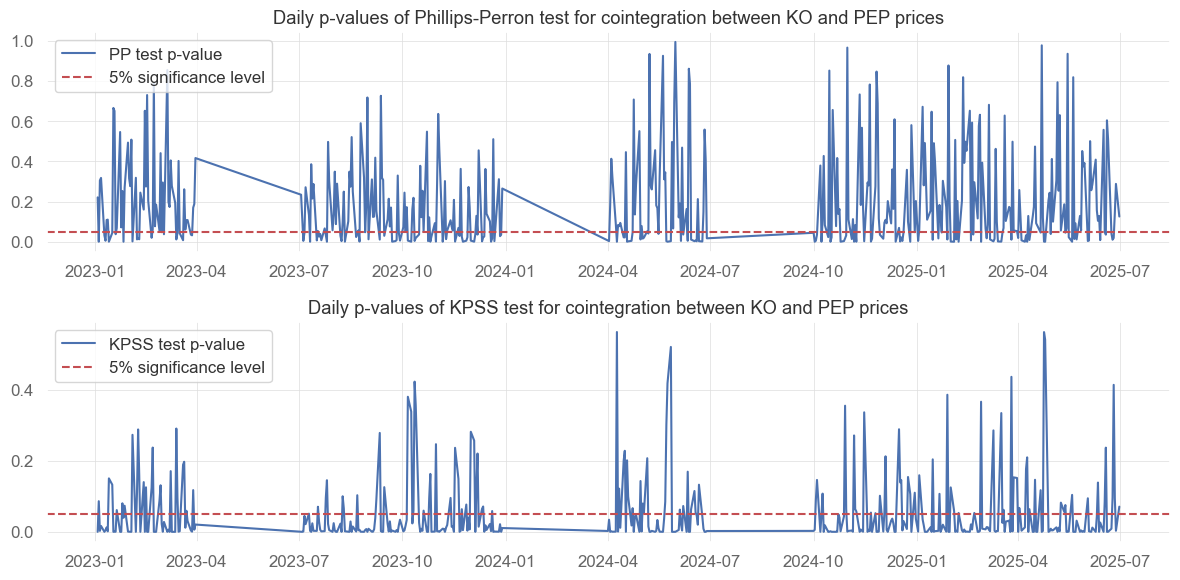

In [45]:
# lets plot p-values of both tests
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(daily_PP_tests['pvalue'], label="PP test p-value")
plt.axhline(y=0.05, color='r', linestyle='--', label='5% significance level')
plt.title("Daily p-values of Phillips-Perron test for cointegration between KO and PEP prices")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(daily_KPSS_tests['pvalue'], label="KPSS test p-value")
plt.axhline(y=0.05, color='r', linestyle='--', label='5% significance level')
plt.title("Daily p-values of KPSS test for cointegration between KO and PEP prices")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
print("Share of days with PP test p-value below 0.05 (indicating cointegration):", 
      (daily_PP_tests['pvalue'] < 0.05).sum() / len(daily_PP_tests))

# KPSS test (null: cointegration)
print("Share of days with KPSS test p-value above 0.05 (indicating cointegration):", 
      (daily_KPSS_tests['pvalue'] > 0.05).sum() / len(daily_KPSS_tests))


Share of days with PP test p-value below 0.05 (indicating cointegration): 0.38169642857142855
Share of days with KPSS test p-value above 0.05 (indicating cointegration): 0.29046563192904656


In [47]:
daily_PP_tests

pvalue  quarter
date                         
2023-01-03  0.220726  2023_Q1
2023-01-04  0.000119  2023_Q1
2023-01-05  0.304902  2023_Q1
2023-01-06  0.317591  2023_Q1
2023-01-09  0.031740  2023_Q1
...              ...      ...
2025-06-24  0.009945  2025_Q2
2025-06-25  0.018627  2025_Q2
2025-06-26  0.140732  2025_Q2
2025-06-27  0.287839  2025_Q2
2025-06-30  0.125405  2025_Q2

[448 rows x 2 columns]

In [48]:
daily_correlations

correlation_prices  correlation_returns  quarter
datetime                                                                   
2023-01-03 00:00:00+00:00            0.970507             0.958658  2023_Q1
2023-01-04 00:00:00+00:00            0.983934             0.972111  2023_Q1
2023-01-05 00:00:00+00:00            0.906305             0.950317  2023_Q1
2023-01-06 00:00:00+00:00            0.992222             0.959272  2023_Q1
2023-01-09 00:00:00+00:00            0.966129             0.935449  2023_Q1
...                                       ...                  ...      ...
2025-06-24 00:00:00+00:00            0.986663             0.890262  2025_Q2
2025-06-25 00:00:00+00:00            0.960795             0.917823  2025_Q2
2025-06-26 00:00:00+00:00            0.969141             0.885866  2025_Q2
2025-06-27 00:00:00+00:00            0.973245             0.939959  2025_Q2
2025-06-30 00:00:00+00:00            0.940608             0.926855  2025_Q2

[449 rows x 3 columns]

In [49]:
daily_KPSS_tests

pvalue  quarter
date                         
2023-01-03  0.000100  2023_Q1
2023-01-04  0.086160  2023_Q1
2023-01-05  0.002848  2023_Q1
2023-01-06  0.016573  2023_Q1
2023-01-09  0.000100  2023_Q1
...              ...      ...
2025-06-24  0.096210  2025_Q2
2025-06-25  0.413376  2025_Q2
2025-06-26  0.094204  2025_Q2
2025-06-27  0.003119  2025_Q2
2025-06-30  0.070842  2025_Q2

[451 rows x 2 columns]

In [50]:
daily_PP_tests.index = pd.to_datetime(daily_PP_tests.index).tz_localize(all_data_2_nonan.index.tz)
daily_KPSS_tests.index = pd.to_datetime(daily_KPSS_tests.index).tz_localize(all_data_2_nonan.index.tz)

In [51]:
# Merge all dataframes using outer join to preserve all dates
combined_daily_stats = daily_correlations.copy()

# Merge regression results for prices
combined_daily_stats = combined_daily_stats.merge(
    daily_regressions_P_all.add_prefix("regression_price_"),
    left_index=True,
    right_index=True,
    how='outer'
)

# Merge regression results for returns
combined_daily_stats = combined_daily_stats.merge(
    daily_regressions_R_all.add_prefix("regression_return_"),
    left_index=True,
    right_index=True,
    how='outer'
)

# Merge PP test results
combined_daily_stats = combined_daily_stats.merge(
    daily_PP_tests[['pvalue']].rename(columns={'pvalue': 'PP_pvalue'}),
    left_index=True,
    right_index=True,
    how='outer'
)

# Merge KPSS test results
combined_daily_stats = combined_daily_stats.merge(
    daily_KPSS_tests[['pvalue']].rename(columns={'pvalue': 'KPSS_pvalue'}),
    left_index=True,
    right_index=True,
    how='outer'
)

combined_daily_stats.head()

correlation_prices  correlation_returns  quarter  \
2023-01-03 00:00:00+00:00            0.970507             0.958658  2023_Q1   
2023-01-04 00:00:00+00:00            0.983934             0.972111  2023_Q1   
2023-01-05 00:00:00+00:00            0.906305             0.950317  2023_Q1   
2023-01-06 00:00:00+00:00            0.992222             0.959272  2023_Q1   
2023-01-09 00:00:00+00:00            0.966129             0.935449  2023_Q1   

                           regression_price_beta  regression_price_pvalue  \
2023-01-03 00:00:00+00:00               0.252374            1.824487e-229   
2023-01-04 00:00:00+00:00               0.289548            1.818228e-277   
2023-01-05 00:00:00+00:00               0.278542            1.028494e-139   
2023-01-06 00:00:00+00:00               0.234559             0.000000e+00   
2023-01-09 00:00:00+00:00               0.290785            1.400165e-218   

                           regression_price_tstat  regression_price_r2  \
2023-01-03 00:00:00+00:00               77.228468             0.941885   
2023-01-04 00:00:00+00:00              105.722413             0.968125   
2023-01-05 00:00:00+00:00               41.138133             0.821389   
2023-01-06 00:00:00+00:00              152.911285             0.984505   
2023-01-09 00:00:00+00:00               71.819131             0.933406   

                          regression_price_quarter  regression_return_beta  \
2023-01-03 00:00:00+00:00                  2023_Q1                0.749226   
2023-01-04 00:00:00+00:00                  2023_Q1                0.724111   
2023-01-05 00:00:00+00:00                  2023_Q1                0.743876   
2023-01-06 00:00:00+00:00                  2023_Q1                0.697383   
2023-01-09 00:00:00+00:00                  2023_Q1                0.676848   

                           regression_return_pvalue  regression_return_tstat  \
2023-01-03 00:00:00+00:00             5.924737e-203                64.627096   
2023-01-04 00:00:00+00:00             7.225195e-234                79.516102   
2023-01-05 00:00:00+00:00             1.326476e-188                58.564544   
2023-01-06 00:00:00+00:00             4.001756e-204                65.143684   
2023-01-09 00:00:00+00:00             2.738499e-168                50.769360   

                           regression_return_r2 regression_return_quarter  \
2023-01-03 00:00:00+00:00              0.919026                   2023_Q1   
2023-01-04 00:00:00+00:00              0.944999                   2023_Q1   
2023-01-05 00:00:00+00:00              0.903102                   2023_Q1   
2023-01-06 00:00:00+00:00              0.920203                   2023_Q1   
2023-01-09 00:00:00+00:00              0.875065                   2023_Q1   

                           PP_pvalue  KPSS_pvalue  
2023-01-03 00:00:00+00:00   0.220726     0.000100  
2023-01-04 00:00:00+00:00   0.000119     0.086160  
2023-01-05 00:00:00+00:00   0.304902     0.002848  
2023-01-06 00:00:00+00:00   0.317591     0.016573  
2023-01-09 00:00:00+00:00   0.031740     0.000100

In [52]:
combined_daily_stats.index = combined_daily_stats.index.tz_convert(None)

In [53]:
combined_daily_stats

correlation_prices  correlation_returns  quarter  \
2023-01-03            0.970507             0.958658  2023_Q1   
2023-01-04            0.983934             0.972111  2023_Q1   
2023-01-05            0.906305             0.950317  2023_Q1   
2023-01-06            0.992222             0.959272  2023_Q1   
2023-01-09            0.966129             0.935449  2023_Q1   
...                        ...                  ...      ...   
2025-06-24            0.986663             0.890262  2025_Q2   
2025-06-25            0.960795             0.917823  2025_Q2   
2025-06-26            0.969141             0.885866  2025_Q2   
2025-06-27            0.973245             0.939959  2025_Q2   
2025-06-30            0.940608             0.926855  2025_Q2   

            regression_price_beta  regression_price_pvalue  \
2023-01-03               0.252374            1.824487e-229   
2023-01-04               0.289548            1.818228e-277   
2023-01-05               0.278542            1.028494e-139   
2023-01-06               0.234559             0.000000e+00   
2023-01-09               0.290785            1.400165e-218   
...                           ...                      ...   
2025-06-24               0.239589            3.072624e-292   
2025-06-25               0.167965            4.161615e-207   
2025-06-26               0.165985            6.684102e-226   
2025-06-27               0.255751            3.853367e-237   
2025-06-30               0.244288            9.805768e-175   

            regression_price_tstat  regression_price_r2  \
2023-01-03               77.228468             0.941885   
2023-01-04              105.722413             0.968125   
2023-01-05               41.138133             0.821389   
2023-01-06              152.911285             0.984505   
2023-01-09               71.819131             0.933406   
...                            ...                  ...   
2025-06-24              116.280993             0.973505   
2025-06-25               66.476037             0.923126   
2025-06-26               75.419340             0.939235   
2025-06-27               81.255784             0.947206   
2025-06-30               53.149630             0.884744   

           regression_price_quarter  regression_return_beta  \
2023-01-03                  2023_Q1                0.749226   
2023-01-04                  2023_Q1                0.724111   
2023-01-05                  2023_Q1                0.743876   
2023-01-06                  2023_Q1                0.697383   
2023-01-09                  2023_Q1                0.676848   
...                             ...                     ...   
2025-06-24                  2025_Q2                0.710220   
2025-06-25                  2025_Q2                0.676445   
2025-06-26                  2025_Q2                0.649463   
2025-06-27                  2025_Q2                0.760613   
2025-06-30                  2025_Q2                0.785013   

            regression_return_pvalue  regression_return_tstat  \
2023-01-03             5.924737e-203                64.627096   
2023-01-04             7.225195e-234                79.516102   
2023-01-05             1.326476e-188                58.564544   
2023-01-06             4.001756e-204                65.143684   
2023-01-09             2.738499e-168                50.769360   
...                              ...                      ...   
2025-06-24             9.432338e-128                37.497499   
2025-06-25             1.015566e-149                44.350955   
2025-06-26             8.496435e-125                36.629378   
2025-06-27             6.816811e-174                52.833936   
2025-06-30             1.184730e-158                47.360815   

            regression_return_r2 regression_return_quarter  PP_pvalue  \
2023-01-03              0.919026                   2023_Q1   0.220726   
2023-01-04              0.944999                   2023_Q1   0.000119   
2023-01-05              0.903102

In [54]:
combined_daily_stats.index = combined_daily_stats.index + pd.to_timedelta(np.where(combined_daily_stats.index.day_name() == "Friday", "3D", "1D")) 

combined_daily_stats.head()

correlation_prices  correlation_returns  quarter  \
2023-01-04            0.970507             0.958658  2023_Q1   
2023-01-05            0.983934             0.972111  2023_Q1   
2023-01-06            0.906305             0.950317  2023_Q1   
2023-01-09            0.992222             0.959272  2023_Q1   
2023-01-10            0.966129             0.935449  2023_Q1   

            regression_price_beta  regression_price_pvalue  \
2023-01-04               0.252374            1.824487e-229   
2023-01-05               0.289548            1.818228e-277   
2023-01-06               0.278542            1.028494e-139   
2023-01-09               0.234559             0.000000e+00   
2023-01-10               0.290785            1.400165e-218   

            regression_price_tstat  regression_price_r2  \
2023-01-04               77.228468             0.941885   
2023-01-05              105.722413             0.968125   
2023-01-06               41.138133             0.821389   
2023-01-09              152.911285             0.984505   
2023-01-10               71.819131             0.933406   

           regression_price_quarter  regression_return_beta  \
2023-01-04                  2023_Q1                0.749226   
2023-01-05                  2023_Q1                0.724111   
2023-01-06                  2023_Q1                0.743876   
2023-01-09                  2023_Q1                0.697383   
2023-01-10                  2023_Q1                0.676848   

            regression_return_pvalue  regression_return_tstat  \
2023-01-04             5.924737e-203                64.627096   
2023-01-05             7.225195e-234                79.516102   
2023-01-06             1.326476e-188                58.564544   
2023-01-09             4.001756e-204                65.143684   
2023-01-10             2.738499e-168                50.769360   

            regression_return_r2 regression_return_quarter  PP_pvalue  \
2023-01-04              0.919026                   2023_Q1   0.220726   
2023-01-05              0.944999                   2023_Q1   0.000119   
2023-01-06              0.903102                   2023_Q1   0.304902   
2023-01-09              0.920203                   2023_Q1   0.317591   
2023-01-10              0.875065                   2023_Q1   0.031740   

            KPSS_pvalue  
2023-01-04     0.000100  
2023-01-05     0.086160  
2023-01-06     0.002848  
2023-01-09     0.016573  
2023-01-10     0.000100

In [55]:
# based on the combined daily statistics
# lets create filtering rules
# storing them as new columns, where
# 1 means that the filter condition is met (trade on that day)
# and 0 means that it is not met (do NOT trade on that day)

# based on correlation between prices
combined_daily_stats['filter_correlation_prices_06'] = (combined_daily_stats['correlation_prices'] > 0.6) * 1
combined_daily_stats['filter_correlation_prices_07'] = (combined_daily_stats['correlation_prices'] > 0.7) * 1
combined_daily_stats['filter_correlation_prices_08'] = (combined_daily_stats['correlation_prices'] > 0.8) * 1
combined_daily_stats['filter_correlation_prices_09'] = (combined_daily_stats['correlation_prices'] > 0.9) * 1
# based on correlation between returns
combined_daily_stats['filter_correlation_returns_06'] = (combined_daily_stats['correlation_returns'] > 0.6) * 1
combined_daily_stats['filter_correlation_returns_07'] = (combined_daily_stats['correlation_returns'] > 0.7) * 1
combined_daily_stats['filter_correlation_returns_08'] = (combined_daily_stats['correlation_returns'] > 0.8) * 1
# based on regression for prices - significant beta above some threshold
combined_daily_stats['filter_regression_price_beta_sig_above0'] = ((combined_daily_stats['regression_price_beta'] > 0) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_price_beta_sig_above025'] = ((combined_daily_stats['regression_price_beta'] > 0.25) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_price_beta_sig_above05'] = ((combined_daily_stats['regression_price_beta'] > 0.5) & (combined_daily_stats['regression_price_pvalue'] < 0.05)) * 1
# based on regression for returns - significant beta above some threshold
combined_daily_stats['filter_regression_return_beta_sig_above0'] = ((combined_daily_stats['regression_return_beta'] > 0) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_return_beta_sig_above025'] = ((combined_daily_stats['regression_return_beta'] > 0.25) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
combined_daily_stats['filter_regression_return_beta_sig_above05'] = ((combined_daily_stats['regression_return_beta'] > 0.5) & (combined_daily_stats['regression_return_pvalue'] < 0.05)) * 1
# cointegration based filters
combined_daily_stats['filter_PP_cointegration_10'] = (combined_daily_stats['PP_pvalue'] < 0.1) * 1
combined_daily_stats['filter_PP_cointegration_05'] = (combined_daily_stats['PP_pvalue'] < 0.05) * 1
combined_daily_stats['filter_PP_cointegration_01'] = (combined_daily_stats['PP_pvalue'] < 0.01) * 1
combined_daily_stats['filter_KPSS_cointegration_10'] = (combined_daily_stats['KPSS_pvalue'] > 0.1) * 1
combined_daily_stats['filter_KPSS_cointegration_05'] = (combined_daily_stats['KPSS_pvalue'] > 0.05) * 1
combined_daily_stats['filter_KPSS_cointegration_01'] = (combined_daily_stats['KPSS_pvalue'] > 0.01) * 1

In [56]:
summary_daily = pd.DataFrame()

# Loop through each quarter
for quarter in quarters:
        print(f"Processing quarter: {quarter}")
        
        # Filter data for the current quarter
        quarter_mask = all_data_2["quarter"] == quarter
        quarter_data = all_data_2[quarter_mask].copy()
        
        # Fixed parameters based on your analysis
        volat_sd = 90
        m = 3.5
        
        print(f"  volat_sd: {volat_sd}, m: {m}")
        
        # Calculate signal and bounds
        signal_sdsratio = quarter_data["spread_sdsratio"]
        std_spread_sdsratio = signal_sdsratio.rolling(window=volat_sd).std()
        upper_bound_sdsratio = m * std_spread_sdsratio
        lower_bound_sdsratio = -m * std_spread_sdsratio
        
        # Position
        pos_sdsratio = positionVB(signal=signal_sdsratio,
                                                          lower=lower_bound_sdsratio,
                                                          upper=upper_bound_sdsratio,
                                                          pos_flat=pos_flat[quarter_mask],
                                                          strategy="mr")
        
        # Number of transactions
        n_trans_sdsratio = np.abs(np.diff(pos_sdsratio, prepend=0))
        n_trans_sdsratio = pd.Series(n_trans_sdsratio, index=quarter_data.index)
        
        # Calculate PnL
        pnl_gross_sdsratio = pos_sdsratio * (quarter_data["NQ"].diff() - quarter_data["sds_ratio"] * quarter_data["SP"].diff())
        pnl_net_sdsratio = pnl_gross_sdsratio - n_trans_sdsratio * (12 + quarter_data["sds_ratio"] * 12)
        
        # Aggregate to daily
        pnl_gross_sdsratio_daily = pnl_gross_sdsratio.resample("D").sum().dropna()
        pnl_net_sdsratio_daily = pnl_net_sdsratio.resample("D").sum().dropna()
        n_trans_sdsratio_daily = n_trans_sdsratio.resample("D").sum().dropna()
        
        # Calculate summary measures
        gross_SR_sdsratio = mySR(pnl_gross_sdsratio_daily, scale=252)
        net_SR_sdsratio = mySR(pnl_net_sdsratio_daily, scale=252)
        gross_PnL_sdsratio = pnl_gross_sdsratio_daily.sum()
        net_PnL_sdsratio = pnl_net_sdsratio_daily.sum()
        av_daily_ntrans_sdsratio = n_trans_sdsratio_daily.mean()
        
        print(f"  Net SR: {net_SR_sdsratio:.4f}, Net PnL: {net_PnL_sdsratio:.2f}")
        
        # Create summary dataframe with quarter indicator
        summary = pd.DataFrame({
            'volat_sd': [volat_sd],
            'm': [m],
            'quarter': [quarter],
            'gross_SR_sdsratio': [gross_SR_sdsratio],
            'net_SR_sdsratio': [net_SR_sdsratio],
            'gross_PnL_sdsratio': [gross_PnL_sdsratio],
            'net_PnL_sdsratio': [net_PnL_sdsratio],
            'av_daily_ntrans_sdsratio': [av_daily_ntrans_sdsratio],
        })

        summary_daily_stats = pd.DataFrame({
                'quarter': quarter,
                'pnl_gross_sdsratio': pnl_gross_sdsratio_daily,
                'pnl_net_sdsratio': pnl_net_sdsratio_daily,
                'n_trans_sdsratio': n_trans_sdsratio_daily})
        
        summary_daily = pd.concat([summary_daily, summary_daily_stats], ignore_index=False)

        # Append to results (create if doesn't exist)
        if 'summary_VB_optimal' not in locals():
            summary_VB_optimal = summary.copy()
        else:
            summary_VB_optimal = pd.concat([summary_VB_optimal, summary], ignore_index=True)



Processing quarter: 2023_Q1
  volat_sd: 90, m: 3.5
  Net SR: -8.4799, Net PnL: -3117.36
Processing quarter: 2023_Q3
  volat_sd: 90, m: 3.5
  Net SR: -7.7066, Net PnL: -2591.22
Processing quarter: 2023_Q4
  volat_sd: 90, m: 3.5
  Net SR: -7.1385, Net PnL: -1418.89
Processing quarter: 2024_Q2
  volat_sd: 90, m: 3.5
  Net SR: -7.7902, Net PnL: -1927.60
Processing quarter: 2024_Q4
  volat_sd: 90, m: 3.5
  Net SR: -5.6910, Net PnL: -1879.89
Processing quarter: 2025_Q1
  volat_sd: 90, m: 3.5
  Net SR: -3.8325, Net PnL: -969.17
Processing quarter: 2025_Q2
  volat_sd: 90, m: 3.5
  Net SR: -5.3477, Net PnL: -3269.11


In [57]:
summary_daily

quarter  pnl_gross_sdsratio  pnl_net_sdsratio  \
datetime                                                                   
2023-01-02 00:00:00+00:00  2023_Q1            0.000000          0.000000   
2023-01-03 00:00:00+00:00  2023_Q1            0.000000          0.000000   
2023-01-04 00:00:00+00:00  2023_Q1          -54.291285       -109.000029   
2023-01-05 00:00:00+00:00  2023_Q1           -2.043018        -58.262760   
2023-01-06 00:00:00+00:00  2023_Q1            0.000000          0.000000   
...                            ...                 ...               ...   
2025-06-26 00:00:00+00:00  2025_Q2            0.000000          0.000000   
2025-06-27 00:00:00+00:00  2025_Q2           15.400008        -41.335926   
2025-06-28 00:00:00+00:00  2025_Q2            0.000000          0.000000   
2025-06-29 00:00:00+00:00  2025_Q2            0.000000          0.000000   
2025-06-30 00:00:00+00:00  2025_Q2          -26.258137       -133.576103   

                           n_trans_sdsratio  
datetime                                     
2023-01-02 00:00:00+00:00               0.0  
2023-01-03 00:00:00+00:00               0.0  
2023-01-04 00:00:00+00:00               2.0  
2023-01-05 00:00:00+00:00               2.0  
2023-01-06 00:00:00+00:00               0.0  
...                                     ...  
2025-06-26 00:00:00+00:00               0.0  
2025-06-27 00:00:00+00:00               2.0  
2025-06-28 00:00:00+00:00               0.0  
2025-06-29 00:00:00+00:00               0.0  
2025-06-30 00:00:00+00:00               4.0  

[628 rows x 4 columns]

In [58]:
# remove weekends with no trading
daily_pnls = summary_daily[summary_daily.index.dayofweek < 5]

daily_pnls.head()

quarter  pnl_gross_sdsratio  pnl_net_sdsratio  \
datetime                                                                   
2023-01-02 00:00:00+00:00  2023_Q1            0.000000          0.000000   
2023-01-03 00:00:00+00:00  2023_Q1            0.000000          0.000000   
2023-01-04 00:00:00+00:00  2023_Q1          -54.291285       -109.000029   
2023-01-05 00:00:00+00:00  2023_Q1           -2.043018        -58.262760   
2023-01-06 00:00:00+00:00  2023_Q1            0.000000          0.000000   

                           n_trans_sdsratio  
datetime                                     
2023-01-02 00:00:00+00:00               0.0  
2023-01-03 00:00:00+00:00               0.0  
2023-01-04 00:00:00+00:00               2.0  
2023-01-05 00:00:00+00:00               2.0  
2023-01-06 00:00:00+00:00               0.0

In [59]:
daily_pnls.index = daily_pnls.index.tz_localize(None)
daily_pnls_filters = pd.concat([daily_pnls, 
                                combined_daily_stats.filter(regex='^filter_')], axis=1)

daily_pnls_filters.head()

quarter  pnl_gross_sdsratio  pnl_net_sdsratio  n_trans_sdsratio  \
2023-01-02  2023_Q1            0.000000          0.000000               0.0   
2023-01-03  2023_Q1            0.000000          0.000000               0.0   
2023-01-04  2023_Q1          -54.291285       -109.000029               2.0   
2023-01-05  2023_Q1           -2.043018        -58.262760               2.0   
2023-01-06  2023_Q1            0.000000          0.000000               0.0   

            filter_correlation_prices_06  filter_correlation_prices_07  \
2023-01-02                           NaN                           NaN   
2023-01-03                           NaN                           NaN   
2023-01-04                           1.0                           1.0   
2023-01-05                           1.0                           1.0   
2023-01-06                           1.0                           1.0   

            filter_correlation_prices_08  filter_correlation_prices_09  \
2023-01-02                           NaN                           NaN   
2023-01-03                           NaN                           NaN   
2023-01-04                           1.0                           1.0   
2023-01-05                           1.0                           1.0   
2023-01-06                           1.0                           1.0   

            filter_correlation_returns_06  filter_correlation_returns_07  ...  \
2023-01-02                            NaN                            NaN  ...   
2023-01-03                            NaN                            NaN  ...   
2023-01-04                            1.0                            1.0  ...   
2023-01-05                            1.0                            1.0  ...   
2023-01-06                            1.0                            1.0  ...   

            filter_regression_price_beta_sig_above05  \
2023-01-02                                       NaN   
2023-01-03                                       NaN   
2023-01-04                                       0.0   
2023-01-05                                       0.0   
2023-01-06                                       0.0   

            filter_regression_return_beta_sig_above0  \
2023-01-02                                       NaN   
2023-01-03                                       NaN   
2023-01-04                                       1.0   
2023-01-05                                       1.0   
2023-01-06                                       1.0   

            filter_regression_return_beta_sig_above025  \
2023-01-02                                         NaN   
2023-01-03                                         NaN   
2023-01-04                                         1.0   
2023-01-05                                         1.0   
2023-01-06                                         1.0   

            filter_regression_return_beta_sig_above05  \
2023-01-02                                        NaN   
2023-01-03                                        NaN   
2023-01-04                                        1.0   
2023-01-05                                        1.0   
2023-01-06                                        1.0   

            filter_PP_cointegration_10  filter_PP_cointegration_05  \
2023-01-02                         NaN                         NaN   
2023-01-03                         NaN                         NaN   
2023-01-04                         0.0                         0.0   
2023-01-05                         1.0                         1.0   
2023-01-06                         0.0                         0.0   

            filter_PP_cointegration_01  filter_KPSS_cointegration_10  \
2023-01-02                         NaN                           NaN   
2023-01-03                         NaN                           NaN   
2023-01-04                         0.0                           0.0   
2023-01-05                         1.0                           0.0   
2023-01-06   

In [60]:
def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

print("Gross PnL SR:", mySR(daily_pnls['pnl_gross_sdsratio'], scale = 252))
print("Net PnL SR:", mySR(daily_pnls['pnl_net_sdsratio'], scale = 252))

# and average number of trades per day
print("Average number of trades per day:", daily_pnls['n_trans_sdsratio'].mean())

Gross PnL SR: -0.18185374132780383
Net PnL SR: -7.280207416286564
Average number of trades per day: 1.1497797356828194


In [61]:
pnl_gross_sdsratio_filtered = daily_pnls_filters['pnl_gross_sdsratio'] * daily_pnls_filters['filter_correlation_prices_06']
pnl_net_sdsratio_filtered = daily_pnls_filters['pnl_net_sdsratio'] * daily_pnls_filters['filter_correlation_prices_06']

print("Gross PnL SR after applying filter_correlation_prices_06:", 
      mySR(pnl_gross_sdsratio_filtered, scale = 252))
print("Net PnL SR after applying filter_correlation_prices_06:", 
      mySR(pnl_net_sdsratio_filtered, scale = 252))

# and average number of trades per day
n_trades_filtered = daily_pnls_filters['n_trans_sdsratio'] * daily_pnls_filters['filter_correlation_prices_06']
print("Average number of trades per day after applying filter_correlation_prices_06:", n_trades_filtered.mean())

# much better results!
# (although still negative in net terms)

Gross PnL SR after applying filter_correlation_prices_06: -0.10696738478480869
Net PnL SR after applying filter_correlation_prices_06: -6.391251450355618
Average number of trades per day after applying filter_correlation_prices_06: 0.952914798206278


In [62]:
results_filters_by_quarter = []

for quarter in quarters:
    print(f"\nProcessing quarter: {quarter}")
    
    # Filter data for the current quarter
    quarter_pnls = daily_pnls_filters[daily_pnls_filters['quarter'] == quarter]
    
    for col in daily_pnls_filters.columns:
        if col.startswith('filter_'):
            pnl_gross_filtered = quarter_pnls['pnl_gross_sdsratio'] * quarter_pnls[col]
            pnl_net_filtered = quarter_pnls['pnl_net_sdsratio'] * quarter_pnls[col]
            n_trades_filtered = quarter_pnls['n_trans_sdsratio'] * quarter_pnls[col]
            
            results_filters_by_quarter.append({
                'quarter': quarter,
                'filter': col,
                'gross_SR': mySR(pnl_gross_filtered, scale=252),
                'net_SR': mySR(pnl_net_filtered, scale=252),
                'gross_PnL': pnl_gross_filtered.sum(),
                'net_PnL': pnl_net_filtered.sum(),
                'avg_n_trades_per_day': n_trades_filtered.mean()
            })

results_filters_by_quarter_df = pd.DataFrame(results_filters_by_quarter)



Processing quarter: 2023_Q1

Processing quarter: 2023_Q3

Processing quarter: 2023_Q4

Processing quarter: 2024_Q2

Processing quarter: 2024_Q4

Processing quarter: 2025_Q1

Processing quarter: 2025_Q2


In [63]:
results_filters_by_quarter_df.groupby('quarter').apply(lambda x: x.sort_values(by='net_SR', ascending=False))

quarter                                    filter  gross_SR  \
quarter                                                                    
2023_Q1 9    2023_Q1  filter_regression_price_beta_sig_above05 -2.016065   
        15   2023_Q1                filter_PP_cointegration_01 -3.119701   
        14   2023_Q1                filter_PP_cointegration_05  4.273214   
        6    2023_Q1             filter_correlation_returns_08  1.876870   
        3    2023_Q1              filter_correlation_prices_09  0.302043   
...              ...                                       ...       ...   
2025_Q2 119  2025_Q2             filter_correlation_returns_07 -3.662306   
        118  2025_Q2             filter_correlation_returns_06 -3.662306   
        116  2025_Q2              filter_correlation_prices_08 -3.662306   
        124  2025_Q2  filter_regression_return_beta_sig_above0 -3.662306   
        123  2025_Q2  filter_regression_price_beta_sig_above05       NaN   

               net_SR    gross_PnL      net_PnL  avg_n_trades_per_day  
quarter                                                                
2023_Q1 9   -2.016065   -30.844220  -125.881528              0.063492  
        15  -3.490528   -24.426639  -217.493218              0.126984  
        14  -4.544864   340.528813  -479.232567              0.523810  
        6   -4.677080   244.815821  -708.980209              0.523810  
        3   -5.021427    36.451464  -802.051249              0.460317  
...               ...          ...          ...                   ...  
2025_Q2 119 -6.476194 -1517.293763 -3269.109549              1.015385  
        118 -6.476194 -1517.293763 -3269.109549              1.015385  
        116 -6.476194 -1517.293763 -3269.109549              1.015385  
        124 -6.476194 -1517.293763 -3269.109549              1.015385  
        123       NaN     0.000000     0.000000              0.000000  

[133 rows x 7 columns]

In [64]:
results_filters_by_quarter_df.loc[results_filters_by_quarter_df.groupby('quarter')['net_SR'].idxmax()]

quarter                                     filter  gross_SR    net_SR  \
9    2023_Q1   filter_regression_price_beta_sig_above05 -2.016065 -2.016065   
35   2023_Q3               filter_KPSS_cointegration_10 -1.908743 -2.446851   
54   2023_Q4               filter_KPSS_cointegration_10 -2.358602 -3.684726   
65   2024_Q2  filter_regression_price_beta_sig_above025 -1.039645 -3.485719   
92   2024_Q4               filter_KPSS_cointegration_10  1.668130  0.138995   
109  2025_Q1                 filter_PP_cointegration_05  0.658769 -2.803370   
130  2025_Q2               filter_KPSS_cointegration_10 -2.151107 -2.831739   

      gross_PnL      net_PnL  avg_n_trades_per_day  
9    -30.844220  -125.881528              0.063492  
35  -107.629150  -278.768488              0.093750  
54  -122.428846  -348.606399              0.125000  
65   -33.079186  -241.990340              0.125000  
92   319.621792    24.470688              0.156250  
109   84.454987  -420.379503              0.290323  
130 -745.962758 -1219.248775              0.276923

In [65]:
results_filters_df.sort_values(by = 'net_SR',
                               ascending = False)

NameError: name 'results_filters_df' is not defined